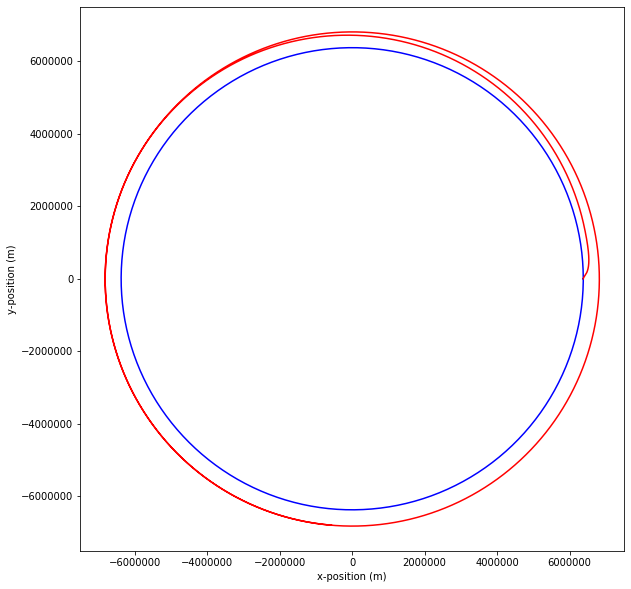

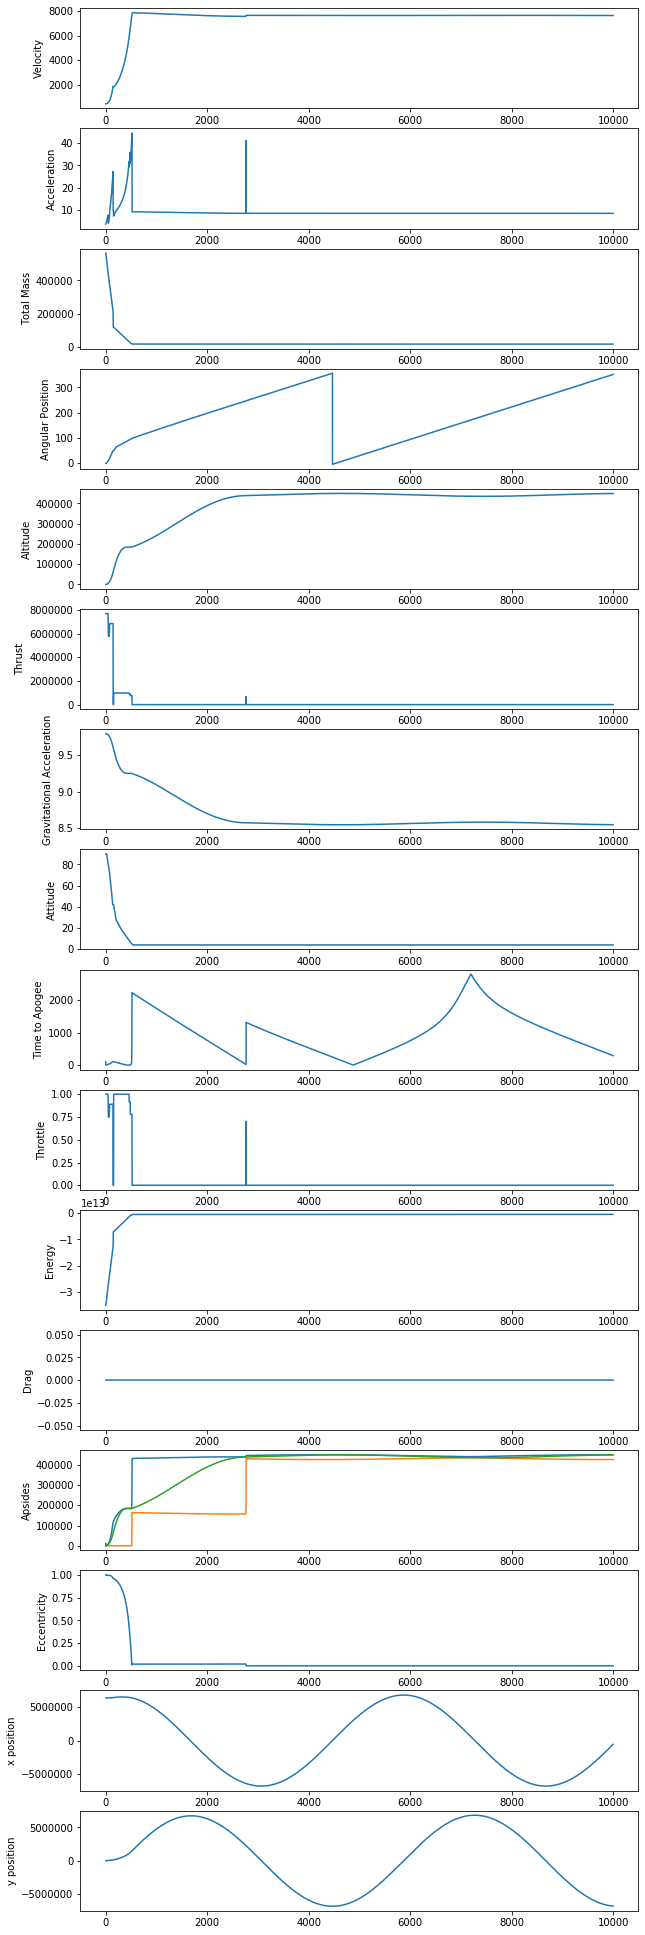

It took 530200.0 kg of fuel to reach orbit.


In [164]:
"""
Aliases: BOHR,
Instructor: Kitchen
Class: 2020 Tri 3 PH412
Date Due: 18 May 2020
"""
import numpy as np
import matplotlib.pyplot as plt

#Physical Constants
G=6.67430e-11 #m^3/k/s^2
m_earth=5.97237e24 #kg
r_earth=6378137. #m
omega_earth=360/(24*60*60) #Earth angular velocity in deg/s
mu=m_earth*G

#simulation parameters
t=0 #s The initial time
dt=0.5 #s The time step for the simulation

#Functions
#These are functions for various physics calculations that will be needed for the simulation.
def altitude(position):
    r_earth=6378137 #m
    r_rocket=np.linalg.norm(position)
    return r_rocket-r_earth

def speed(velocity):
    return np.linalg.norm(velocity)

def air_density(altitude):
    alt_USSA = [-2000.0, 0.0, 2000.0, 4000.0, 6000.0, 8000.0, 10000.0, 12000.0, 14000.0, 16000.0, 18000.0, 20000.0, 22000.0, 24000.0, 26000.0, 28000.0, 30000.0, 32000.0, 34000.0, 36000.0, 38000.0, 40000.0, 42000.0, 44000.0, 46000.0, 48000.0, 50000.0, 52000.0, 54000.0, 56000.0, 58000.0, 60000.0, 62000.0, 64000.0, 66000.0, 68000.0, 70000.0, 72000.0, 74000.0, 76000.0, 78000.0, 80000.0, 82000.0, 84000.0, 86000.0] #m
    density_USSA = [1.478, 1.225, 1.007, 0.8193, 0.6601, 0.5258, 0.4135, 0.3119, 0.2279, 0.1665, 0.1216, 0.08891, 0.06451, 0.04694, 0.03426, 0.02508, 0.01841, 0.01355, 0.009887, 0.007257, 0.005366, 0.003995, 0.002995, 0.002259, 0.001714, 0.001317, 0.001027, 0.0008055, 0.0006389, 0.0005044, 0.0003962, 0.0003096, 0.0002407, 0.000186, 0.0001429, 0.0001091, 8.281e-05, 6.236e-05, 4.637e-05, 3.43e-05, 2.523e-05, 1.845e-05, 1.341e-05, 9.69e-06, 6.955e-06] #kg/m^3
    return np.interp(altitude,alt_USSA,density_USSA,right=0)
    
def mach(velocity,position, altitude):
    omega_earth=360/(24*60*60)
    r_earth=6378137. #m
    tangential_speed=(omega_earth*np.pi/180)*r_earth
    airspeed=velocity+(np.array([position[1],-position[0]])*tangential_speed/np.linalg.norm(position)) #airspeed accounting for the rotation of the earth
    
    alt_USSA = [-2000.0, 0.0, 2000.0, 4000.0, 6000.0, 8000.0, 10000.0, 12000.0, 14000.0, 16000.0, 18000.0, 20000.0, 22000.0, 24000.0, 26000.0, 28000.0, 30000.0, 32000.0, 34000.0, 36000.0, 38000.0, 40000.0, 42000.0, 44000.0, 46000.0, 48000.0, 50000.0, 52000.0, 54000.0, 56000.0, 58000.0, 60000.0, 62000.0, 64000.0, 66000.0, 68000.0, 70000.0, 72000.0, 74000.0, 76000.0, 78000.0, 80000.0, 82000.0, 84000.0, 86000.0] #m
    temp_USSA = [28.19999999999999, 15.100000000000023, 2.1999999999999886, -10.800000000000011, -23.80000000000001, -36.80000000000001, -49.69999999999999, -56.400000000000006, -56.400000000000006, -56.400000000000006, -56.400000000000006, -56.400000000000006, -54.400000000000006, -52.400000000000006, -50.5, -48.5, -46.5, -44.5, -39.30000000000001, -33.69999999999999, -28.19999999999999, -22.599999999999994, -17.099999999999994, -11.600000000000023, -6.100000000000023, -2.3999999999999773, -2.3999999999999773, -4.0, -9.5, -15.0, -20.5, -26.0, -31.5, -37.0, -42.5, -47.900000000000006, -53.400000000000006, -58.69999999999999, -62.69999999999999, -66.6, -70.5, -74.4, -78.30000000000001, -82.19999999999999, -86.1] #degrees C
    temp=np.interp(altitude, alt_USSA, temp_USSA,right=0)
    c=20.05*(temp+273)**0.5
    return np.linalg.norm(airspeed/c)
    
def C_D(mach):
    mach_SV = [0.008442947521733135, 0.057780710937143986, 0.1092121432797779, 0.18310955350234392, 0.26372491010877974, 0.34434026671521556, 0.4249556233216514, 0.505570979928087, 0.5861863365345228, 0.6533658003732192, 0.7119079045755119, 0.7487606390241681, 0.7863811387738384, 0.8159401028628648, 0.8414682991215696, 0.8683400846570479, 0.8965554594693006, 0.922083655728005, 0.9489554412634837, 0.9758272267989625, 1.0026990123344408, 1.0295707978699196, 1.0564425834053979, 1.0833143689408766, 1.1101861544763554, 1.1370579400118337, 1.1639297255473124, 1.1908015110827912, 1.2163297073414956, 1.2445450821537483, 1.2727604569660005, 1.3117245459924445, 1.3789040098311411, 1.459519366437577, 1.5401347230440128, 1.6140321332665786, 1.6812115971052752, 1.7416731145601019, 1.7954166856310594, 1.8491602567020164, 1.8827499886213648, 1.9230576669245827, 1.9633653452278006, 2.0137499431068226, 2.043980701834236, 2.078914023030358, 2.122676645188138, 2.1649037367438897, 2.199837057940012, 2.238801146966456, 2.283907358401009, 2.3261344499567613, 2.3664421282599792, 2.4168267261390017, 2.447057484866415, 2.5075190023212417, 2.5511856538163946, 2.581416412543808, 2.6418779299986346, 2.695621501069592, 2.749365072140549, 2.8031086432115067, 2.8635701606663333, 2.92403167812116, 2.9844931955759866, 3.0583906057985533, 3.139005962404988, 3.219621319011424, 3.30023667561786, 3.3808520322242956, 3.4614673888307315, 3.5420827454371673, 3.622698102043603, 3.703313458650039, 3.7839288152564747, 3.8645441718629105, 3.9451595284693464, 4.025774885075782, 4.1063902416822184, 4.187005598288653, 4.26762095489509, 4.348236311501525, 4.42885166810796, 4.509467024714397, 4.590082381320832, 4.670697737927268, 4.751313094533703, 4.83192845114014, 4.912543807746575, 4.9931591643530115, 5.0737745209594465, 5.154389877565883, 5.235005234172318, 5.315620590778755, 5.39623594738519, 5.4768513039916265, 5.557466660598061, 5.638082017204498, 5.718697373810933, 5.799312730417368, 5.879928087023805, 5.96054344363024, 6.041158800236676, 6.121774156843111, 6.202389513449548, 6.283004870055983, 6.3636202266624196, 6.4442355832688545, 6.524850939875291, 6.605466296481726, 6.686081653088163, 6.766697009694598, 6.847312366301033, 6.927927722907469, 7.008543079513904, 7.089158436120341, 7.169773792726776, 7.250389149333213, 7.331004505939648, 7.411619862546084, 7.492235219152519, 7.572850575758956, 7.653465932365391, 7.734081288971826, 7.8146966455782625, 7.895312002184697, 7.975927358791134, 8.056542715397569, 8.137158072004006, 8.21777342861044, 8.298388785216877, 8.379004141823312, 8.459619498429749, 8.540234855036184, 8.62085021164262, 8.701465568249056, 8.782080924855492, 8.862696281461927, 8.943311638068362, 9.023926994674799, 9.104542351281234, 9.18515770788767, 9.265773064494105, 9.346388421100542, 9.427003777706977, 9.507619134313414, 9.588234490919849, 9.668849847526285, 9.74946520413272, 9.830080560739157, 9.910695917345592, 9.977875381184289, 0.008442947521733135, 0.057780710937143986, 0.1092121432797779, 0.18310955350234392, 0.26372491010877974, 0.34434026671521556, 0.4249556233216514, 0.505570979928087, 0.5861863365345228, 0.6533658003732192, 0.7119079045755119, 0.7487606390241681, 0.7863811387738384, 0.8159401028628648, 0.8414682991215696, 0.8683400846570479, 0.8965554594693006, 0.922083655728005, 0.9489554412634837, 0.9758272267989625, 1.0026990123344408, 1.0295707978699196, 1.0564425834053979, 1.0833143689408766, 1.1101861544763554, 1.1370579400118337, 1.1639297255473124, 1.1908015110827912, 1.2163297073414956, 1.2445450821537483, 1.2727604569660005, 1.3117245459924445, 1.3789040098311411, 1.459519366437577, 1.5401347230440128, 1.6140321332665786, 1.6812115971052752, 1.7416731145601019, 1.7954166856310594, 1.8491602567020164, 1.8827499886213648, 1.9230576669245827, 1.9633653452278006, 2.0137499431068226, 2.043980701834236, 2.078914023030358, 2.122676645188138, 2.1649037367438897, 2.199837057940012, 2.238801146966456, 2.283907358401009, 2.3261344499567613, 2.3664421282599792, 2.4168267261390017, 2.447057484866415, 2.5075190023212417, 2.5511856538163946, 2.581416412543808, 2.6418779299986346, 2.695621501069592, 2.749365072140549, 2.8031086432115067, 2.8635701606663333, 2.92403167812116, 2.9844931955759866, 3.0583906057985533, 3.139005962404988, 3.219621319011424, 3.30023667561786, 3.3808520322242956, 3.4614673888307315, 3.5420827454371673, 3.622698102043603, 3.703313458650039, 3.7839288152564747, 3.8645441718629105, 3.9451595284693464, 4.025774885075782, 4.1063902416822184, 4.187005598288653, 4.26762095489509, 4.348236311501525, 4.42885166810796, 4.509467024714397, 4.590082381320832, 4.670697737927268, 4.751313094533703, 4.83192845114014, 4.912543807746575, 4.9931591643530115, 5.0737745209594465, 5.154389877565883, 5.235005234172318, 5.315620590778755, 5.39623594738519, 5.4768513039916265, 5.557466660598061, 5.638082017204498, 5.718697373810933, 5.799312730417368, 5.879928087023805, 5.96054344363024, 6.041158800236676, 6.121774156843111, 6.202389513449548, 6.283004870055983, 6.3636202266624196, 6.4442355832688545, 6.524850939875291, 6.605466296481726, 6.686081653088163, 6.766697009694598, 6.847312366301033, 6.927927722907469, 7.008543079513904, 7.089158436120341, 7.169773792726776, 7.250389149333213, 7.331004505939648, 7.411619862546084, 7.492235219152519, 7.572850575758956, 7.653465932365391, 7.734081288971826, 7.8146966455782625, 7.895312002184697, 7.975927358791134, 8.056542715397569, 8.137158072004006, 8.21777342861044, 8.298388785216877, 8.379004141823312, 8.459619498429749, 8.540234855036184, 8.62085021164262, 8.701465568249056, 8.782080924855492, 8.862696281461927, 8.943311638068362, 9.023926994674799, 9.104542351281234, 9.18515770788767, 9.265773064494105, 9.346388421100542, 9.427003777706977, 9.507619134313414, 9.588234490919849, 9.668849847526285, 9.74946520413272, 9.830080560739157, 9.910695917345592, 9.977875381184289, 0.008442947521733135, 0.057780710937143986, 0.1092121432797779, 0.18310955350234392, 0.26372491010877974, 0.34434026671521556, 0.4249556233216514, 0.505570979928087, 0.5861863365345228, 0.6533658003732192, 0.7119079045755119, 0.7487606390241681, 0.7863811387738384, 0.8159401028628648, 0.8414682991215696, 0.8683400846570479, 0.8965554594693006, 0.922083655728005, 0.9489554412634837, 0.9758272267989625, 1.0026990123344408, 1.0295707978699196, 1.0564425834053979, 1.0833143689408766, 1.1101861544763554, 1.1370579400118337, 1.1639297255473124, 1.1908015110827912, 1.2163297073414956, 1.2445450821537483, 1.2727604569660005, 1.3117245459924445, 1.3789040098311411, 1.459519366437577, 1.5401347230440128, 1.6140321332665786, 1.6812115971052752, 1.7416731145601019, 1.7954166856310594, 1.8491602567020164, 1.8827499886213648, 1.9230576669245827, 1.9633653452278006, 2.0137499431068226, 2.043980701834236, 2.078914023030358, 2.122676645188138, 2.1649037367438897, 2.199837057940012, 2.238801146966456, 2.283907358401009, 2.3261344499567613, 2.3664421282599792, 2.4168267261390017, 2.447057484866415, 2.5075190023212417, 2.5511856538163946, 2.581416412543808, 2.6418779299986346, 2.695621501069592, 2.749365072140549, 2.8031086432115067, 2.8635701606663333, 2.92403167812116, 2.9844931955759866, 3.0583906057985533, 3.139005962404988, 3.219621319011424, 3.30023667561786, 3.3808520322242956, 3.4614673888307315, 3.5420827454371673, 3.622698102043603, 3.703313458650039, 3.7839288152564747, 3.8645441718629105, 3.9451595284693464, 4.025774885075782, 4.1063902416822184, 4.187005598288653, 4.26762095489509, 4.348236311501525, 4.42885166810796, 4.509467024714397, 4.590082381320832, 4.670697737927268, 4.751313094533703, 4.83192845114014, 4.912543807746575, 4.9931591643530115, 5.0737745209594465, 5.154389877565883, 5.235005234172318, 5.315620590778755, 5.39623594738519, 5.4768513039916265, 5.557466660598061, 5.638082017204498, 5.718697373810933, 5.799312730417368, 5.879928087023805, 5.96054344363024, 6.041158800236676, 6.121774156843111, 6.202389513449548, 6.283004870055983, 6.3636202266624196, 6.4442355832688545, 6.524850939875291, 6.605466296481726, 6.686081653088163, 6.766697009694598, 6.847312366301033, 6.927927722907469, 7.008543079513904, 7.089158436120341, 7.169773792726776, 7.250389149333213, 7.331004505939648, 7.411619862546084, 7.492235219152519, 7.572850575758956, 7.653465932365391, 7.734081288971826, 7.8146966455782625, 7.895312002184697, 7.975927358791134, 8.056542715397569, 8.137158072004006, 8.21777342861044, 8.298388785216877, 8.379004141823312, 8.459619498429749, 8.540234855036184, 8.62085021164262, 8.701465568249056, 8.782080924855492, 8.862696281461927, 8.943311638068362, 9.023926994674799, 9.104542351281234, 9.18515770788767, 9.265773064494105, 9.346388421100542, 9.427003777706977, 9.507619134313414, 9.588234490919849, 9.668849847526285, 9.74946520413272, 9.830080560739157, 9.910695917345592, 9.977875381184289, 0.008442947521733135, 0.057780710937143986, 0.1092121432797779, 0.18310955350234392, 0.26372491010877974, 0.34434026671521556, 0.4249556233216514, 0.505570979928087, 0.5861863365345228, 0.6533658003732192, 0.7119079045755119, 0.7487606390241681, 0.7863811387738384, 0.8159401028628648, 0.8414682991215696, 0.8683400846570479, 0.8965554594693006, 0.922083655728005, 0.9489554412634837, 0.9758272267989625, 1.0026990123344408, 1.0295707978699196, 1.0564425834053979, 1.0833143689408766, 1.1101861544763554, 1.1370579400118337, 1.1639297255473124, 1.1908015110827912, 1.2163297073414956, 1.2445450821537483, 1.2727604569660005, 1.3117245459924445, 1.3789040098311411, 1.459519366437577, 1.5401347230440128, 1.6140321332665786, 1.6812115971052752, 1.7416731145601019, 1.7954166856310594, 1.8491602567020164, 1.8827499886213648, 1.9230576669245827, 1.9633653452278006, 2.0137499431068226, 2.043980701834236, 2.078914023030358, 2.122676645188138, 2.1649037367438897, 2.199837057940012, 2.238801146966456, 2.283907358401009, 2.3261344499567613, 2.3664421282599792, 2.4168267261390017, 2.447057484866415, 2.5075190023212417, 2.5511856538163946, 2.581416412543808, 2.6418779299986346, 2.695621501069592, 2.749365072140549, 2.8031086432115067, 2.8635701606663333, 2.92403167812116, 2.9844931955759866, 3.0583906057985533, 3.139005962404988, 3.219621319011424, 3.30023667561786, 3.3808520322242956, 3.4614673888307315, 3.5420827454371673, 3.622698102043603, 3.703313458650039, 3.7839288152564747, 3.8645441718629105, 3.9451595284693464, 4.025774885075782, 4.1063902416822184, 4.187005598288653, 4.26762095489509, 4.348236311501525, 4.42885166810796, 4.509467024714397, 4.590082381320832, 4.670697737927268, 4.751313094533703, 4.83192845114014, 4.912543807746575, 4.9931591643530115, 5.0737745209594465, 5.154389877565883, 5.235005234172318, 5.315620590778755, 5.39623594738519, 5.4768513039916265, 5.557466660598061, 5.638082017204498, 5.718697373810933, 5.799312730417368, 5.879928087023805, 5.96054344363024, 6.041158800236676, 6.121774156843111, 6.202389513449548, 6.283004870055983, 6.3636202266624196, 6.4442355832688545, 6.524850939875291, 6.605466296481726, 6.686081653088163, 6.766697009694598, 6.847312366301033, 6.927927722907469, 7.008543079513904, 7.089158436120341, 7.169773792726776, 7.250389149333213, 7.331004505939648, 7.411619862546084, 7.492235219152519, 7.572850575758956, 7.653465932365391, 7.734081288971826, 7.8146966455782625, 7.895312002184697, 7.975927358791134, 8.056542715397569, 8.137158072004006, 8.21777342861044, 8.298388785216877, 8.379004141823312, 8.459619498429749, 8.540234855036184, 8.62085021164262, 8.701465568249056, 8.782080924855492, 8.862696281461927, 8.943311638068362, 9.023926994674799, 9.104542351281234, 9.18515770788767, 9.265773064494105, 9.346388421100542, 9.427003777706977, 9.507619134313414, 9.588234490919849, 9.668849847526285, 9.74946520413272, 9.830080560739157, 9.910695917345592, 9.977875381184289, 0.008442947521733135, 0.057780710937143986, 0.1092121432797779, 0.18310955350234392, 0.26372491010877974, 0.34434026671521556, 0.4249556233216514, 0.505570979928087, 0.5861863365345228, 0.6533658003732192, 0.7119079045755119, 0.7487606390241681, 0.7863811387738384, 0.8159401028628648, 0.8414682991215696, 0.8683400846570479, 0.8965554594693006, 0.922083655728005, 0.9489554412634837, 0.9758272267989625, 1.0026990123344408, 1.0295707978699196, 1.0564425834053979, 1.0833143689408766, 1.1101861544763554, 1.1370579400118337, 1.1639297255473124, 1.1908015110827912, 1.2163297073414956, 1.2445450821537483, 1.2727604569660005, 1.3117245459924445, 1.3789040098311411, 1.459519366437577, 1.5401347230440128, 1.6140321332665786, 1.6812115971052752, 1.7416731145601019, 1.7954166856310594, 1.8491602567020164, 1.8827499886213648, 1.9230576669245827, 1.9633653452278006, 2.0137499431068226, 2.043980701834236, 2.078914023030358, 2.122676645188138, 2.1649037367438897, 2.199837057940012, 2.238801146966456, 2.283907358401009, 2.3261344499567613, 2.3664421282599792, 2.4168267261390017, 2.447057484866415, 2.5075190023212417, 2.5511856538163946, 2.581416412543808, 2.6418779299986346, 2.695621501069592, 2.749365072140549, 2.8031086432115067, 2.8635701606663333, 2.92403167812116, 2.9844931955759866, 3.0583906057985533, 3.139005962404988, 3.219621319011424, 3.30023667561786, 3.3808520322242956, 3.4614673888307315, 3.5420827454371673, 3.622698102043603, 3.703313458650039, 3.7839288152564747, 3.8645441718629105, 3.9451595284693464, 4.025774885075782, 4.1063902416822184, 4.187005598288653, 4.26762095489509, 4.348236311501525, 4.42885166810796, 4.509467024714397, 4.590082381320832, 4.670697737927268, 4.751313094533703, 4.83192845114014, 4.912543807746575, 4.9931591643530115, 5.0737745209594465, 5.154389877565883, 5.235005234172318, 5.315620590778755, 5.39623594738519, 5.4768513039916265, 5.557466660598061, 5.638082017204498, 5.718697373810933, 5.799312730417368, 5.879928087023805, 5.96054344363024, 6.041158800236676, 6.121774156843111, 6.202389513449548, 6.283004870055983, 6.3636202266624196, 6.4442355832688545, 6.524850939875291, 6.605466296481726, 6.686081653088163, 6.766697009694598, 6.847312366301033, 6.927927722907469, 7.008543079513904, 7.089158436120341, 7.169773792726776, 7.250389149333213, 7.331004505939648, 7.411619862546084, 7.492235219152519, 7.572850575758956, 7.653465932365391, 7.734081288971826, 7.8146966455782625, 7.895312002184697, 7.975927358791134, 8.056542715397569, 8.137158072004006, 8.21777342861044, 8.298388785216877, 8.379004141823312, 8.459619498429749, 8.540234855036184, 8.62085021164262, 8.701465568249056, 8.782080924855492, 8.862696281461927, 8.943311638068362, 9.023926994674799, 9.104542351281234, 9.18515770788767, 9.265773064494105, 9.346388421100542, 9.427003777706977, 9.507619134313414, 9.588234490919849, 9.668849847526285, 9.74946520413272, 9.830080560739157, 9.910695917345592, 9.977875381184289, 0.008442947521733135, 0.057780710937143986, 0.1092121432797779, 0.18310955350234392, 0.26372491010877974, 0.34434026671521556, 0.4249556233216514, 0.505570979928087, 0.5861863365345228, 0.6533658003732192, 0.7119079045755119, 0.7487606390241681, 0.7863811387738384, 0.8159401028628648, 0.8414682991215696, 0.8683400846570479, 0.8965554594693006, 0.922083655728005, 0.9489554412634837, 0.9758272267989625, 1.0026990123344408, 1.0295707978699196, 1.0564425834053979, 1.0833143689408766, 1.1101861544763554, 1.1370579400118337, 1.1639297255473124, 1.1908015110827912, 1.2163297073414956, 1.2445450821537483, 1.2727604569660005, 1.3117245459924445, 1.3789040098311411, 1.459519366437577, 1.5401347230440128, 1.6140321332665786, 1.6812115971052752, 1.7416731145601019, 1.7954166856310594, 1.8491602567020164, 1.8827499886213648, 1.9230576669245827, 1.9633653452278006, 2.0137499431068226, 2.043980701834236, 2.078914023030358, 2.122676645188138, 2.1649037367438897, 2.199837057940012, 2.238801146966456, 2.283907358401009, 2.3261344499567613, 2.3664421282599792, 2.4168267261390017, 2.447057484866415, 2.5075190023212417, 2.5511856538163946, 2.581416412543808, 2.6418779299986346, 2.695621501069592, 2.749365072140549, 2.8031086432115067, 2.8635701606663333, 2.92403167812116, 2.9844931955759866, 3.0583906057985533, 3.139005962404988, 3.219621319011424, 3.30023667561786, 3.3808520322242956, 3.4614673888307315, 3.5420827454371673, 3.622698102043603, 3.703313458650039, 3.7839288152564747, 3.8645441718629105, 3.9451595284693464, 4.025774885075782, 4.1063902416822184, 4.187005598288653, 4.26762095489509, 4.348236311501525, 4.42885166810796, 4.509467024714397, 4.590082381320832, 4.670697737927268, 4.751313094533703, 4.83192845114014, 4.912543807746575, 4.9931591643530115, 5.0737745209594465, 5.154389877565883, 5.235005234172318, 5.315620590778755, 5.39623594738519, 5.4768513039916265, 5.557466660598061, 5.638082017204498, 5.718697373810933, 5.799312730417368, 5.879928087023805, 5.96054344363024, 6.041158800236676, 6.121774156843111, 6.202389513449548, 6.283004870055983, 6.3636202266624196, 6.4442355832688545, 6.524850939875291, 6.605466296481726, 6.686081653088163, 6.766697009694598, 6.847312366301033, 6.927927722907469, 7.008543079513904, 7.089158436120341, 7.169773792726776, 7.250389149333213, 7.331004505939648, 7.411619862546084, 7.492235219152519, 7.572850575758956, 7.653465932365391, 7.734081288971826, 7.8146966455782625, 7.895312002184697, 7.975927358791134, 8.056542715397569, 8.137158072004006, 8.21777342861044, 8.298388785216877, 8.379004141823312, 8.459619498429749, 8.540234855036184, 8.62085021164262, 8.701465568249056, 8.782080924855492, 8.862696281461927, 8.943311638068362, 9.023926994674799, 9.104542351281234, 9.18515770788767, 9.265773064494105, 9.346388421100542, 9.427003777706977, 9.507619134313414, 9.588234490919849, 9.668849847526285, 9.74946520413272, 9.830080560739157, 9.910695917345592, 9.977875381184289, 0.008442947521733135, 0.057780710937143986, 0.1092121432797779, 0.18310955350234392, 0.26372491010877974, 0.34434026671521556, 0.4249556233216514, 0.505570979928087, 0.5861863365345228, 0.6533658003732192, 0.7119079045755119, 0.7487606390241681, 0.7863811387738384, 0.8159401028628648, 0.8414682991215696, 0.8683400846570479, 0.8965554594693006, 0.922083655728005, 0.9489554412634837, 0.9758272267989625, 1.0026990123344408, 1.0295707978699196, 1.0564425834053979, 1.0833143689408766, 1.1101861544763554, 1.1370579400118337, 1.1639297255473124, 1.1908015110827912, 1.2163297073414956, 1.2445450821537483, 1.2727604569660005, 1.3117245459924445, 1.3789040098311411, 1.459519366437577, 1.5401347230440128, 1.6140321332665786, 1.6812115971052752, 1.7416731145601019, 1.7954166856310594, 1.8491602567020164, 1.8827499886213648, 1.9230576669245827, 1.9633653452278006, 2.0137499431068226, 2.043980701834236, 2.078914023030358, 2.122676645188138, 2.1649037367438897, 2.199837057940012, 2.238801146966456, 2.283907358401009, 2.3261344499567613, 2.3664421282599792, 2.4168267261390017, 2.447057484866415, 2.5075190023212417, 2.5511856538163946, 2.581416412543808, 2.6418779299986346, 2.695621501069592, 2.749365072140549, 2.8031086432115067, 2.8635701606663333, 2.92403167812116, 2.9844931955759866, 3.0583906057985533, 3.139005962404988, 3.219621319011424, 3.30023667561786, 3.3808520322242956, 3.4614673888307315, 3.5420827454371673, 3.622698102043603, 3.703313458650039, 3.7839288152564747, 3.8645441718629105, 3.9451595284693464, 4.025774885075782, 4.1063902416822184, 4.187005598288653, 4.26762095489509, 4.348236311501525, 4.42885166810796, 4.509467024714397, 4.590082381320832, 4.670697737927268, 4.751313094533703, 4.83192845114014, 4.912543807746575, 4.9931591643530115, 5.0737745209594465, 5.154389877565883, 5.235005234172318, 5.315620590778755, 5.39623594738519, 5.4768513039916265, 5.557466660598061, 5.638082017204498, 5.718697373810933, 5.799312730417368, 5.879928087023805, 5.96054344363024, 6.041158800236676, 6.121774156843111, 6.202389513449548, 6.283004870055983, 6.3636202266624196, 6.4442355832688545, 6.524850939875291, 6.605466296481726, 6.686081653088163, 6.766697009694598, 6.847312366301033, 6.927927722907469, 7.008543079513904, 7.089158436120341, 7.169773792726776, 7.250389149333213, 7.331004505939648, 7.411619862546084, 7.492235219152519, 7.572850575758956, 7.653465932365391, 7.734081288971826, 7.8146966455782625, 7.895312002184697, 7.975927358791134, 8.056542715397569, 8.137158072004006, 8.21777342861044, 8.298388785216877, 8.379004141823312, 8.459619498429749, 8.540234855036184, 8.62085021164262, 8.701465568249056, 8.782080924855492, 8.862696281461927, 8.943311638068362, 9.023926994674799, 9.104542351281234, 9.18515770788767, 9.265773064494105, 9.346388421100542, 9.427003777706977, 9.507619134313414, 9.588234490919849, 9.668849847526285, 9.74946520413272, 9.830080560739157, 9.910695917345592, 9.977875381184289, 0.008442947521733135, 0.057780710937143986, 0.1092121432797779, 0.18310955350234392, 0.26372491010877974, 0.34434026671521556, 0.4249556233216514, 0.505570979928087, 0.5861863365345228, 0.6533658003732192, 0.7119079045755119, 0.7487606390241681, 0.7863811387738384, 0.8159401028628648, 0.8414682991215696, 0.8683400846570479, 0.8965554594693006, 0.922083655728005, 0.9489554412634837, 0.9758272267989625, 1.0026990123344408, 1.0295707978699196, 1.0564425834053979, 1.0833143689408766, 1.1101861544763554, 1.1370579400118337, 1.1639297255473124, 1.1908015110827912, 1.2163297073414956, 1.2445450821537483, 1.2727604569660005, 1.3117245459924445, 1.3789040098311411, 1.459519366437577, 1.5401347230440128, 1.6140321332665786, 1.6812115971052752, 1.7416731145601019, 1.7954166856310594, 1.8491602567020164, 1.8827499886213648, 1.9230576669245827, 1.9633653452278006, 2.0137499431068226, 2.043980701834236, 2.078914023030358, 2.122676645188138, 2.1649037367438897, 2.199837057940012, 2.238801146966456, 2.283907358401009, 2.3261344499567613, 2.3664421282599792, 2.4168267261390017, 2.447057484866415, 2.5075190023212417, 2.5511856538163946, 2.581416412543808, 2.6418779299986346, 2.695621501069592, 2.749365072140549, 2.8031086432115067, 2.8635701606663333, 2.92403167812116, 2.9844931955759866, 3.0583906057985533, 3.139005962404988, 3.219621319011424, 3.30023667561786, 3.3808520322242956, 3.4614673888307315, 3.5420827454371673, 3.622698102043603, 3.703313458650039, 3.7839288152564747, 3.8645441718629105, 3.9451595284693464, 4.025774885075782, 4.1063902416822184, 4.187005598288653, 4.26762095489509, 4.348236311501525, 4.42885166810796, 4.509467024714397, 4.590082381320832, 4.670697737927268, 4.751313094533703, 4.83192845114014, 4.912543807746575, 4.9931591643530115, 5.0737745209594465, 5.154389877565883, 5.235005234172318, 5.315620590778755, 5.39623594738519, 5.4768513039916265, 5.557466660598061, 5.638082017204498, 5.718697373810933, 5.799312730417368, 5.879928087023805, 5.96054344363024, 6.041158800236676, 6.121774156843111, 6.202389513449548, 6.283004870055983, 6.3636202266624196, 6.4442355832688545, 6.524850939875291, 6.605466296481726, 6.686081653088163, 6.766697009694598, 6.847312366301033, 6.927927722907469, 7.008543079513904, 7.089158436120341, 7.169773792726776, 7.250389149333213, 7.331004505939648, 7.411619862546084, 7.492235219152519, 7.572850575758956, 7.653465932365391, 7.734081288971826, 7.8146966455782625, 7.895312002184697, 7.975927358791134, 8.056542715397569, 8.137158072004006, 8.21777342861044, 8.298388785216877, 8.379004141823312, 8.459619498429749, 8.540234855036184, 8.62085021164262, 8.701465568249056, 8.782080924855492, 8.862696281461927, 8.943311638068362, 9.023926994674799, 9.104542351281234, 9.18515770788767, 9.265773064494105, 9.346388421100542, 9.427003777706977, 9.507619134313414, 9.588234490919849, 9.668849847526285, 9.74946520413272, 9.830080560739157, 9.910695917345592, 9.977875381184289, 0.008442947521733135, 0.057780710937143986, 0.1092121432797779, 0.18310955350234392, 0.26372491010877974, 0.34434026671521556, 0.4249556233216514, 0.505570979928087, 0.5861863365345228, 0.6533658003732192, 0.7119079045755119, 0.7487606390241681, 0.7863811387738384, 0.8159401028628648, 0.8414682991215696, 0.8683400846570479, 0.8965554594693006, 0.922083655728005, 0.9489554412634837, 0.9758272267989625, 1.0026990123344408, 1.0295707978699196, 1.0564425834053979, 1.0833143689408766, 1.1101861544763554, 1.1370579400118337, 1.1639297255473124, 1.1908015110827912, 1.2163297073414956, 1.2445450821537483, 1.2727604569660005, 1.3117245459924445, 1.3789040098311411, 1.459519366437577, 1.5401347230440128, 1.6140321332665786, 1.6812115971052752, 1.7416731145601019, 1.7954166856310594, 1.8491602567020164, 1.8827499886213648, 1.9230576669245827, 1.9633653452278006, 2.0137499431068226, 2.043980701834236, 2.078914023030358, 2.122676645188138, 2.1649037367438897, 2.199837057940012, 2.238801146966456, 2.283907358401009, 2.3261344499567613, 2.3664421282599792, 2.4168267261390017, 2.447057484866415, 2.5075190023212417, 2.5511856538163946, 2.581416412543808, 2.6418779299986346, 2.695621501069592, 2.749365072140549, 2.8031086432115067, 2.8635701606663333, 2.92403167812116, 2.9844931955759866, 3.0583906057985533, 3.139005962404988, 3.219621319011424, 3.30023667561786, 3.3808520322242956, 3.4614673888307315, 3.5420827454371673, 3.622698102043603, 3.703313458650039, 3.7839288152564747, 3.8645441718629105, 3.9451595284693464, 4.025774885075782, 4.1063902416822184, 4.187005598288653, 4.26762095489509, 4.348236311501525, 4.42885166810796, 4.509467024714397, 4.590082381320832, 4.670697737927268, 4.751313094533703, 4.83192845114014, 4.912543807746575, 4.9931591643530115, 5.0737745209594465, 5.154389877565883, 5.235005234172318, 5.315620590778755, 5.39623594738519, 5.4768513039916265, 5.557466660598061, 5.638082017204498, 5.718697373810933, 5.799312730417368, 5.879928087023805, 5.96054344363024, 6.041158800236676, 6.121774156843111, 6.202389513449548, 6.283004870055983, 6.3636202266624196, 6.4442355832688545, 6.524850939875291, 6.605466296481726, 6.686081653088163, 6.766697009694598, 6.847312366301033, 6.927927722907469, 7.008543079513904, 7.089158436120341, 7.169773792726776, 7.250389149333213, 7.331004505939648, 7.411619862546084, 7.492235219152519, 7.572850575758956, 7.653465932365391, 7.734081288971826, 7.8146966455782625, 7.895312002184697, 7.975927358791134, 8.056542715397569, 8.137158072004006, 8.21777342861044, 8.298388785216877, 8.379004141823312, 8.459619498429749, 8.540234855036184, 8.62085021164262, 8.701465568249056, 8.782080924855492, 8.862696281461927, 8.943311638068362, 9.023926994674799, 9.104542351281234, 9.18515770788767, 9.265773064494105, 9.346388421100542, 9.427003777706977, 9.507619134313414, 9.588234490919849, 9.668849847526285, 9.74946520413272, 9.830080560739157, 9.910695917345592, 9.977875381184289, 0.008442947521733135, 0.057780710937143986, 0.1092121432797779, 0.18310955350234392, 0.26372491010877974, 0.34434026671521556, 0.4249556233216514, 0.505570979928087, 0.5861863365345228, 0.6533658003732192, 0.7119079045755119, 0.7487606390241681, 0.7863811387738384, 0.8159401028628648, 0.8414682991215696, 0.8683400846570479, 0.8965554594693006, 0.922083655728005, 0.9489554412634837, 0.9758272267989625, 1.0026990123344408, 1.0295707978699196, 1.0564425834053979, 1.0833143689408766, 1.1101861544763554, 1.1370579400118337, 1.1639297255473124, 1.1908015110827912, 1.2163297073414956, 1.2445450821537483, 1.2727604569660005, 1.3117245459924445, 1.3789040098311411, 1.459519366437577, 1.5401347230440128, 1.6140321332665786, 1.6812115971052752, 1.7416731145601019, 1.7954166856310594, 1.8491602567020164, 1.8827499886213648, 1.9230576669245827, 1.9633653452278006, 2.0137499431068226, 2.043980701834236, 2.078914023030358, 2.122676645188138, 2.1649037367438897, 2.199837057940012, 2.238801146966456, 2.283907358401009, 2.3261344499567613, 2.3664421282599792, 2.4168267261390017, 2.447057484866415, 2.5075190023212417, 2.5511856538163946, 2.581416412543808, 2.6418779299986346, 2.695621501069592, 2.749365072140549, 2.8031086432115067, 2.8635701606663333, 2.92403167812116, 2.9844931955759866, 3.0583906057985533, 3.139005962404988, 3.219621319011424, 3.30023667561786, 3.3808520322242956, 3.4614673888307315, 3.5420827454371673, 3.622698102043603, 3.703313458650039, 3.7839288152564747, 3.8645441718629105, 3.9451595284693464, 4.025774885075782, 4.1063902416822184, 4.187005598288653, 4.26762095489509, 4.348236311501525, 4.42885166810796, 4.509467024714397, 4.590082381320832, 4.670697737927268, 4.751313094533703, 4.83192845114014, 4.912543807746575, 4.9931591643530115, 5.0737745209594465, 5.154389877565883, 5.235005234172318, 5.315620590778755, 5.39623594738519, 5.4768513039916265, 5.557466660598061, 5.638082017204498, 5.718697373810933, 5.799312730417368, 5.879928087023805, 5.96054344363024, 6.041158800236676, 6.121774156843111, 6.202389513449548, 6.283004870055983, 6.3636202266624196, 6.4442355832688545, 6.524850939875291, 6.605466296481726, 6.686081653088163, 6.766697009694598, 6.847312366301033, 6.927927722907469, 7.008543079513904, 7.089158436120341, 7.169773792726776, 7.250389149333213, 7.331004505939648, 7.411619862546084, 7.492235219152519, 7.572850575758956, 7.653465932365391, 7.734081288971826, 7.8146966455782625, 7.895312002184697, 7.975927358791134, 8.056542715397569, 8.137158072004006, 8.21777342861044, 8.298388785216877, 8.379004141823312, 8.459619498429749, 8.540234855036184, 8.62085021164262, 8.701465568249056, 8.782080924855492, 8.862696281461927, 8.943311638068362, 9.023926994674799, 9.104542351281234, 9.18515770788767, 9.265773064494105, 9.346388421100542, 9.427003777706977, 9.507619134313414, 9.588234490919849, 9.668849847526285, 9.74946520413272, 9.830080560739157, 9.910695917345592, 9.977875381184289, 0.008442947521733135, 0.057780710937143986, 0.1092121432797779, 0.18310955350234392, 0.26372491010877974, 0.34434026671521556, 0.4249556233216514, 0.505570979928087, 0.5861863365345228, 0.6533658003732192, 0.7119079045755119, 0.7487606390241681, 0.7863811387738384, 0.8159401028628648, 0.8414682991215696, 0.8683400846570479, 0.8965554594693006, 0.922083655728005, 0.9489554412634837, 0.9758272267989625, 1.0026990123344408, 1.0295707978699196, 1.0564425834053979, 1.0833143689408766, 1.1101861544763554, 1.1370579400118337, 1.1639297255473124, 1.1908015110827912, 1.2163297073414956, 1.2445450821537483, 1.2727604569660005, 1.3117245459924445, 1.3789040098311411, 1.459519366437577, 1.5401347230440128, 1.6140321332665786, 1.6812115971052752, 1.7416731145601019, 1.7954166856310594, 1.8491602567020164, 1.8827499886213648, 1.9230576669245827, 1.9633653452278006, 2.0137499431068226, 2.043980701834236, 2.078914023030358, 2.122676645188138, 2.1649037367438897, 2.199837057940012, 2.238801146966456, 2.283907358401009, 2.3261344499567613, 2.3664421282599792, 2.4168267261390017, 2.447057484866415, 2.5075190023212417, 2.5511856538163946, 2.581416412543808, 2.6418779299986346, 2.695621501069592, 2.749365072140549, 2.8031086432115067, 2.8635701606663333, 2.92403167812116, 2.9844931955759866, 3.0583906057985533, 3.139005962404988, 3.219621319011424, 3.30023667561786, 3.3808520322242956, 3.4614673888307315, 3.5420827454371673, 3.622698102043603, 3.703313458650039, 3.7839288152564747, 3.8645441718629105, 3.9451595284693464, 4.025774885075782, 4.1063902416822184, 4.187005598288653, 4.26762095489509, 4.348236311501525, 4.42885166810796, 4.509467024714397, 4.590082381320832, 4.670697737927268, 4.751313094533703, 4.83192845114014, 4.912543807746575, 4.9931591643530115, 5.0737745209594465, 5.154389877565883, 5.235005234172318, 5.315620590778755, 5.39623594738519, 5.4768513039916265, 5.557466660598061, 5.638082017204498, 5.718697373810933, 5.799312730417368, 5.879928087023805, 5.96054344363024, 6.041158800236676, 6.121774156843111, 6.202389513449548, 6.283004870055983, 6.3636202266624196, 6.4442355832688545, 6.524850939875291, 6.605466296481726, 6.686081653088163, 6.766697009694598, 6.847312366301033, 6.927927722907469, 7.008543079513904, 7.089158436120341, 7.169773792726776, 7.250389149333213, 7.331004505939648, 7.411619862546084, 7.492235219152519, 7.572850575758956, 7.653465932365391, 7.734081288971826, 7.8146966455782625, 7.895312002184697, 7.975927358791134, 8.056542715397569, 8.137158072004006, 8.21777342861044, 8.298388785216877, 8.379004141823312, 8.459619498429749, 8.540234855036184, 8.62085021164262, 8.701465568249056, 8.782080924855492, 8.862696281461927, 8.943311638068362, 9.023926994674799, 9.104542351281234, 9.18515770788767, 9.265773064494105, 9.346388421100542, 9.427003777706977, 9.507619134313414, 9.588234490919849, 9.668849847526285, 9.74946520413272, 9.830080560739157, 9.910695917345592, 9.977875381184289, 0.008442947521733135, 0.057780710937143986, 0.1092121432797779, 0.18310955350234392, 0.26372491010877974, 0.34434026671521556, 0.4249556233216514, 0.505570979928087, 0.5861863365345228, 0.6533658003732192, 0.7119079045755119, 0.7487606390241681, 0.7863811387738384, 0.8159401028628648, 0.8414682991215696, 0.8683400846570479, 0.8965554594693006, 0.922083655728005, 0.9489554412634837, 0.9758272267989625, 1.0026990123344408, 1.0295707978699196, 1.0564425834053979, 1.0833143689408766, 1.1101861544763554, 1.1370579400118337, 1.1639297255473124, 1.1908015110827912, 1.2163297073414956, 1.2445450821537483, 1.2727604569660005, 1.3117245459924445, 1.3789040098311411, 1.459519366437577, 1.5401347230440128, 1.6140321332665786, 1.6812115971052752, 1.7416731145601019, 1.7954166856310594, 1.8491602567020164, 1.8827499886213648, 1.9230576669245827, 1.9633653452278006, 2.0137499431068226, 2.043980701834236, 2.078914023030358, 2.122676645188138, 2.1649037367438897, 2.199837057940012, 2.238801146966456, 2.283907358401009, 2.3261344499567613, 2.3664421282599792, 2.4168267261390017, 2.447057484866415, 2.5075190023212417, 2.5511856538163946, 2.581416412543808, 2.6418779299986346, 2.695621501069592, 2.749365072140549, 2.8031086432115067, 2.8635701606663333, 2.92403167812116, 2.9844931955759866, 3.0583906057985533, 3.139005962404988, 3.219621319011424, 3.30023667561786, 3.3808520322242956, 3.4614673888307315, 3.5420827454371673, 3.622698102043603, 3.703313458650039, 3.7839288152564747, 3.8645441718629105, 3.9451595284693464, 4.025774885075782, 4.1063902416822184, 4.187005598288653, 4.26762095489509, 4.348236311501525, 4.42885166810796, 4.509467024714397, 4.590082381320832, 4.670697737927268, 4.751313094533703, 4.83192845114014, 4.912543807746575, 4.9931591643530115, 5.0737745209594465, 5.154389877565883, 5.235005234172318, 5.315620590778755, 5.39623594738519, 5.4768513039916265, 5.557466660598061, 5.638082017204498, 5.718697373810933, 5.799312730417368, 5.879928087023805, 5.96054344363024, 6.041158800236676, 6.121774156843111, 6.202389513449548, 6.283004870055983, 6.3636202266624196, 6.4442355832688545, 6.524850939875291, 6.605466296481726, 6.686081653088163, 6.766697009694598, 6.847312366301033, 6.927927722907469, 7.008543079513904, 7.089158436120341, 7.169773792726776, 7.250389149333213, 7.331004505939648, 7.411619862546084, 7.492235219152519, 7.572850575758956, 7.653465932365391, 7.734081288971826, 7.8146966455782625, 7.895312002184697, 7.975927358791134, 8.056542715397569, 8.137158072004006, 8.21777342861044, 8.298388785216877, 8.379004141823312, 8.459619498429749, 8.540234855036184, 8.62085021164262, 8.701465568249056, 8.782080924855492, 8.862696281461927, 8.943311638068362, 9.023926994674799, 9.104542351281234, 9.18515770788767, 9.265773064494105, 9.346388421100542, 9.427003777706977, 9.507619134313414, 9.588234490919849, 9.668849847526285, 9.74946520413272, 9.830080560739157, 9.910695917345592, 9.977875381184289, 0.008442947521733135, 0.057780710937143986, 0.1092121432797779, 0.18310955350234392, 0.26372491010877974, 0.34434026671521556, 0.4249556233216514, 0.505570979928087, 0.5861863365345228, 0.6533658003732192, 0.7119079045755119, 0.7487606390241681, 0.7863811387738384, 0.8159401028628648, 0.8414682991215696, 0.8683400846570479, 0.8965554594693006, 0.922083655728005, 0.9489554412634837, 0.9758272267989625, 1.0026990123344408, 1.0295707978699196, 1.0564425834053979, 1.0833143689408766, 1.1101861544763554, 1.1370579400118337, 1.1639297255473124, 1.1908015110827912, 1.2163297073414956, 1.2445450821537483, 1.2727604569660005, 1.3117245459924445, 1.3789040098311411, 1.459519366437577, 1.5401347230440128, 1.6140321332665786, 1.6812115971052752, 1.7416731145601019, 1.7954166856310594, 1.8491602567020164, 1.8827499886213648, 1.9230576669245827, 1.9633653452278006, 2.0137499431068226, 2.043980701834236, 2.078914023030358, 2.122676645188138, 2.1649037367438897, 2.199837057940012, 2.238801146966456, 2.283907358401009, 2.3261344499567613, 2.3664421282599792, 2.4168267261390017, 2.447057484866415, 2.5075190023212417, 2.5511856538163946, 2.581416412543808, 2.6418779299986346, 2.695621501069592, 2.749365072140549, 2.8031086432115067, 2.8635701606663333, 2.92403167812116, 2.9844931955759866, 3.0583906057985533, 3.139005962404988, 3.219621319011424, 3.30023667561786, 3.3808520322242956, 3.4614673888307315, 3.5420827454371673, 3.622698102043603, 3.703313458650039, 3.7839288152564747, 3.8645441718629105, 3.9451595284693464, 4.025774885075782, 4.1063902416822184, 4.187005598288653, 4.26762095489509, 4.348236311501525, 4.42885166810796, 4.509467024714397, 4.590082381320832, 4.670697737927268, 4.751313094533703, 4.83192845114014, 4.912543807746575, 4.9931591643530115, 5.0737745209594465, 5.154389877565883, 5.235005234172318, 5.315620590778755, 5.39623594738519, 5.4768513039916265, 5.557466660598061, 5.638082017204498, 5.718697373810933, 5.799312730417368, 5.879928087023805, 5.96054344363024, 6.041158800236676, 6.121774156843111, 6.202389513449548, 6.283004870055983, 6.3636202266624196, 6.4442355832688545, 6.524850939875291, 6.605466296481726, 6.686081653088163, 6.766697009694598, 6.847312366301033, 6.927927722907469, 7.008543079513904, 7.089158436120341, 7.169773792726776, 7.250389149333213, 7.331004505939648, 7.411619862546084, 7.492235219152519, 7.572850575758956, 7.653465932365391, 7.734081288971826, 7.8146966455782625, 7.895312002184697, 7.975927358791134, 8.056542715397569, 8.137158072004006, 8.21777342861044, 8.298388785216877, 8.379004141823312, 8.459619498429749, 8.540234855036184, 8.62085021164262, 8.701465568249056, 8.782080924855492, 8.862696281461927, 8.943311638068362, 9.023926994674799, 9.104542351281234, 9.18515770788767, 9.265773064494105, 9.346388421100542, 9.427003777706977, 9.507619134313414, 9.588234490919849, 9.668849847526285, 9.74946520413272, 9.830080560739157, 9.910695917345592, 9.977875381184289, 0.008442947521733135, 0.057780710937143986, 0.1092121432797779, 0.18310955350234392, 0.26372491010877974, 0.34434026671521556, 0.4249556233216514, 0.505570979928087, 0.5861863365345228, 0.6533658003732192, 0.7119079045755119, 0.7487606390241681, 0.7863811387738384, 0.8159401028628648, 0.8414682991215696, 0.8683400846570479, 0.8965554594693006, 0.922083655728005, 0.9489554412634837, 0.9758272267989625, 1.0026990123344408, 1.0295707978699196, 1.0564425834053979, 1.0833143689408766, 1.1101861544763554, 1.1370579400118337, 1.1639297255473124, 1.1908015110827912, 1.2163297073414956, 1.2445450821537483, 1.2727604569660005, 1.3117245459924445, 1.3789040098311411, 1.459519366437577, 1.5401347230440128, 1.6140321332665786, 1.6812115971052752, 1.7416731145601019, 1.7954166856310594, 1.8491602567020164, 1.8827499886213648, 1.9230576669245827, 1.9633653452278006, 2.0137499431068226, 2.043980701834236, 2.078914023030358, 2.122676645188138, 2.1649037367438897, 2.199837057940012, 2.238801146966456, 2.283907358401009, 2.3261344499567613, 2.3664421282599792, 2.4168267261390017, 2.447057484866415, 2.5075190023212417, 2.5511856538163946, 2.581416412543808, 2.6418779299986346, 2.695621501069592, 2.749365072140549, 2.8031086432115067, 2.8635701606663333, 2.92403167812116, 2.9844931955759866, 3.0583906057985533, 3.139005962404988, 3.219621319011424, 3.30023667561786, 3.3808520322242956, 3.4614673888307315, 3.5420827454371673, 3.622698102043603, 3.703313458650039, 3.7839288152564747, 3.8645441718629105, 3.9451595284693464, 4.025774885075782, 4.1063902416822184, 4.187005598288653, 4.26762095489509, 4.348236311501525, 4.42885166810796, 4.509467024714397, 4.590082381320832, 4.670697737927268, 4.751313094533703, 4.83192845114014, 4.912543807746575, 4.9931591643530115, 5.0737745209594465, 5.154389877565883, 5.235005234172318, 5.315620590778755, 5.39623594738519, 5.4768513039916265, 5.557466660598061, 5.638082017204498, 5.718697373810933, 5.799312730417368, 5.879928087023805, 5.96054344363024, 6.041158800236676, 6.121774156843111, 6.202389513449548, 6.283004870055983, 6.3636202266624196, 6.4442355832688545, 6.524850939875291, 6.605466296481726, 6.686081653088163, 6.766697009694598, 6.847312366301033, 6.927927722907469, 7.008543079513904, 7.089158436120341, 7.169773792726776, 7.250389149333213, 7.331004505939648, 7.411619862546084, 7.492235219152519, 7.572850575758956, 7.653465932365391, 7.734081288971826, 7.8146966455782625, 7.895312002184697, 7.975927358791134, 8.056542715397569, 8.137158072004006, 8.21777342861044, 8.298388785216877, 8.379004141823312, 8.459619498429749, 8.540234855036184, 8.62085021164262, 8.701465568249056, 8.782080924855492, 8.862696281461927, 8.943311638068362, 9.023926994674799, 9.104542351281234, 9.18515770788767, 9.265773064494105, 9.346388421100542, 9.427003777706977, 9.507619134313414, 9.588234490919849, 9.668849847526285, 9.74946520413272, 9.830080560739157, 9.910695917345592, 9.977875381184289, 0.008442947521733135, 0.057780710937143986, 0.1092121432797779, 0.18310955350234392, 0.26372491010877974, 0.34434026671521556, 0.4249556233216514, 0.505570979928087, 0.5861863365345228, 0.6533658003732192, 0.7119079045755119, 0.7487606390241681, 0.7863811387738384, 0.8159401028628648, 0.8414682991215696, 0.8683400846570479, 0.8965554594693006, 0.922083655728005, 0.9489554412634837, 0.9758272267989625, 1.0026990123344408, 1.0295707978699196, 1.0564425834053979, 1.0833143689408766, 1.1101861544763554, 1.1370579400118337, 1.1639297255473124, 1.1908015110827912, 1.2163297073414956, 1.2445450821537483, 1.2727604569660005, 1.3117245459924445, 1.3789040098311411, 1.459519366437577, 1.5401347230440128, 1.6140321332665786, 1.6812115971052752, 1.7416731145601019, 1.7954166856310594, 1.8491602567020164, 1.8827499886213648, 1.9230576669245827, 1.9633653452278006, 2.0137499431068226, 2.043980701834236, 2.078914023030358, 2.122676645188138, 2.1649037367438897, 2.199837057940012, 2.238801146966456, 2.283907358401009, 2.3261344499567613, 2.3664421282599792, 2.4168267261390017, 2.447057484866415, 2.5075190023212417, 2.5511856538163946, 2.581416412543808, 2.6418779299986346, 2.695621501069592, 2.749365072140549, 2.8031086432115067, 2.8635701606663333, 2.92403167812116, 2.9844931955759866, 3.0583906057985533, 3.139005962404988, 3.219621319011424, 3.30023667561786, 3.3808520322242956, 3.4614673888307315, 3.5420827454371673, 3.622698102043603, 3.703313458650039, 3.7839288152564747, 3.8645441718629105, 3.9451595284693464, 4.025774885075782, 4.1063902416822184, 4.187005598288653, 4.26762095489509, 4.348236311501525, 4.42885166810796, 4.509467024714397, 4.590082381320832, 4.670697737927268, 4.751313094533703, 4.83192845114014, 4.912543807746575, 4.9931591643530115, 5.0737745209594465, 5.154389877565883, 5.235005234172318, 5.315620590778755, 5.39623594738519, 5.4768513039916265, 5.557466660598061, 5.638082017204498, 5.718697373810933, 5.799312730417368, 5.879928087023805, 5.96054344363024, 6.041158800236676, 6.121774156843111, 6.202389513449548, 6.283004870055983, 6.3636202266624196, 6.4442355832688545, 6.524850939875291, 6.605466296481726, 6.686081653088163, 6.766697009694598, 6.847312366301033, 6.927927722907469, 7.008543079513904, 7.089158436120341, 7.169773792726776, 7.250389149333213, 7.331004505939648, 7.411619862546084, 7.492235219152519, 7.572850575758956, 7.653465932365391, 7.734081288971826, 7.8146966455782625, 7.895312002184697, 7.975927358791134, 8.056542715397569, 8.137158072004006, 8.21777342861044, 8.298388785216877, 8.379004141823312, 8.459619498429749, 8.540234855036184, 8.62085021164262, 8.701465568249056, 8.782080924855492, 8.862696281461927, 8.943311638068362, 9.023926994674799, 9.104542351281234, 9.18515770788767, 9.265773064494105, 9.346388421100542, 9.427003777706977, 9.507619134313414, 9.588234490919849, 9.668849847526285, 9.74946520413272, 9.830080560739157, 9.910695917345592, 9.977875381184289, 0.008442947521733135, 0.057780710937143986, 0.1092121432797779, 0.18310955350234392, 0.26372491010877974, 0.34434026671521556, 0.4249556233216514, 0.505570979928087, 0.5861863365345228, 0.6533658003732192, 0.7119079045755119, 0.7487606390241681, 0.7863811387738384, 0.8159401028628648, 0.8414682991215696, 0.8683400846570479, 0.8965554594693006, 0.922083655728005, 0.9489554412634837, 0.9758272267989625, 1.0026990123344408, 1.0295707978699196, 1.0564425834053979, 1.0833143689408766, 1.1101861544763554, 1.1370579400118337, 1.1639297255473124, 1.1908015110827912, 1.2163297073414956, 1.2445450821537483, 1.2727604569660005, 1.3117245459924445, 1.3789040098311411, 1.459519366437577, 1.5401347230440128, 1.6140321332665786, 1.6812115971052752, 1.7416731145601019, 1.7954166856310594, 1.8491602567020164, 1.8827499886213648, 1.9230576669245827, 1.9633653452278006, 2.0137499431068226, 2.043980701834236, 2.078914023030358, 2.122676645188138, 2.1649037367438897, 2.199837057940012, 2.238801146966456, 2.283907358401009, 2.3261344499567613, 2.3664421282599792, 2.4168267261390017, 2.447057484866415, 2.5075190023212417, 2.5511856538163946, 2.581416412543808, 2.6418779299986346, 2.695621501069592, 2.749365072140549, 2.8031086432115067, 2.8635701606663333, 2.92403167812116, 2.9844931955759866, 3.0583906057985533, 3.139005962404988, 3.219621319011424, 3.30023667561786, 3.3808520322242956, 3.4614673888307315, 3.5420827454371673, 3.622698102043603, 3.703313458650039, 3.7839288152564747, 3.8645441718629105, 3.9451595284693464, 4.025774885075782, 4.1063902416822184, 4.187005598288653, 4.26762095489509, 4.348236311501525, 4.42885166810796, 4.509467024714397, 4.590082381320832, 4.670697737927268, 4.751313094533703, 4.83192845114014, 4.912543807746575, 4.9931591643530115, 5.0737745209594465, 5.154389877565883, 5.235005234172318, 5.315620590778755, 5.39623594738519, 5.4768513039916265, 5.557466660598061, 5.638082017204498, 5.718697373810933, 5.799312730417368, 5.879928087023805, 5.96054344363024, 6.041158800236676, 6.121774156843111, 6.202389513449548, 6.283004870055983, 6.3636202266624196, 6.4442355832688545, 6.524850939875291, 6.605466296481726, 6.686081653088163, 6.766697009694598, 6.847312366301033, 6.927927722907469, 7.008543079513904, 7.089158436120341, 7.169773792726776, 7.250389149333213, 7.331004505939648, 7.411619862546084, 7.492235219152519, 7.572850575758956, 7.653465932365391, 7.734081288971826, 7.8146966455782625, 7.895312002184697, 7.975927358791134, 8.056542715397569, 8.137158072004006, 8.21777342861044, 8.298388785216877, 8.379004141823312, 8.459619498429749, 8.540234855036184, 8.62085021164262, 8.701465568249056, 8.782080924855492, 8.862696281461927, 8.943311638068362, 9.023926994674799, 9.104542351281234, 9.18515770788767, 9.265773064494105, 9.346388421100542, 9.427003777706977, 9.507619134313414, 9.588234490919849, 9.668849847526285, 9.74946520413272, 9.830080560739157, 9.910695917345592, 9.977875381184289] #mach number
    C_D_SV = [0.2978792919421688, 0.29107636434205236, 0.2840108676064928, 0.2760383138575844, 0.26839993900833087, 0.26386465394158654, 0.2605228649450382, 0.2601648161239794, 0.2644614019766845, 0.27412872014527107, 0.28354028915595847, 0.2938930150677146, 0.3040616015857834, 0.3136573099901581, 0.32532970155667373, 0.33821945911478907, 0.3470274601128346, 0.35827019309407965, 0.37247279632941044, 0.38763019642089797, 0.40159410044218957, 0.41460320760732455, 0.4274929651654399, 0.44026337311653563, 0.45267573224657265, 0.46556548980468804, 0.47941004421896005, 0.49313524902621253, 0.506287575719771, 0.5174228940546984, 0.5271976268696026, 0.5378913516585575, 0.5489908651113791, 0.5491102147183987, 0.544694279258674, 0.5369365548024009, 0.5286298221538376, 0.5201082602126391, 0.5115150885072289, 0.5027428923912893, 0.4933739482402517, 0.48430337810676316, 0.47621147475083514, 0.4676541079275308, 0.4598367086677479, 0.4498590815209104, 0.43934267614809885, 0.4298799573058316, 0.42150161489305665, 0.41126141861077614, 0.40057110381059313, 0.39121068463148556, 0.38311878127555754, 0.37438239004172386, 0.36566986872929397, 0.35630092457825646, 0.3477077528728462, 0.3397710040060437, 0.33123750710414324, 0.3235394574513799, 0.3151253101564991, 0.3063531140405594, 0.2980463813919962, 0.2889877462192096, 0.2807168184527522, 0.272696524861036, 0.2641033531556258, 0.2557488806642547, 0.24846855463605988, 0.24142692782190434, 0.23557879707794455, 0.2300887151550436, 0.22579212930233844, 0.2208987954145354, 0.2173183072039478, 0.21349911977932107, 0.21135082685296847, 0.20884448510555714, 0.20657684257218495, 0.20430920003881287, 0.2035931023966953, 0.2023996063264995, 0.201086760649284, 0.201086760649284, 0.20025131340014696, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.20001261418610772, 0.201086760649284, 0.201086760649284, 0.20216090711246026, 0.203115703968617, 0.2039511512177541, 0.20478659846689118, 0.2059800945370871, 0.2068155417862242, 0.20872513549853755, 0.210037981175753, 0.21111212763892928, 0.21278302213720351, 0.21409586781441892, 0.2160054615267324, 0.21791505523904575, 0.21910855130924156, 0.22137619384261376, 0.22268903951982916, 0.22459863323214263, 0.226508226944456, 0.2277017230146518, 0.229969365548024, 0.23223700808139613, 0.23319180493755287, 0.2356981466849642, 0.23689164275516, 0.23880123646747337, 0.24083017978680638, 0.24202367585700219, 0.24429131839037438, 0.24560416406758978, 0.24751375777990325, 0.2489459530641383, 0.2497814003132754, 0.2514522948115496, 0.2530038397028042, 0.2540779861659805, 0.25539083184319594, 0.25562953105723507, 0.2569423767344506, 0.25825522241166604, 0.2583745720186856, 0.25897132005378354, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2978792919421688, 0.29107636434205236, 0.2840108676064928, 0.2760383138575844, 0.26839993900833087, 0.26386465394158654, 0.2605228649450382, 0.2601648161239794, 0.2644614019766845, 0.27412872014527107, 0.28354028915595847, 0.2938930150677146, 0.3040616015857834, 0.3136573099901581, 0.32532970155667373, 0.33821945911478907, 0.3470274601128346, 0.35827019309407965, 0.37247279632941044, 0.38763019642089797, 0.40159410044218957, 0.41460320760732455, 0.4274929651654399, 0.44026337311653563, 0.45267573224657265, 0.46556548980468804, 0.47941004421896005, 0.49313524902621253, 0.506287575719771, 0.5174228940546984, 0.5271976268696026, 0.5378913516585575, 0.5489908651113791, 0.5491102147183987, 0.544694279258674, 0.5369365548024009, 0.5286298221538376, 0.5201082602126391, 0.5115150885072289, 0.5027428923912893, 0.4933739482402517, 0.48430337810676316, 0.47621147475083514, 0.4676541079275308, 0.4598367086677479, 0.4498590815209104, 0.43934267614809885, 0.4298799573058316, 0.42150161489305665, 0.41126141861077614, 0.40057110381059313, 0.39121068463148556, 0.38311878127555754, 0.37438239004172386, 0.36566986872929397, 0.35630092457825646, 0.3477077528728462, 0.3397710040060437, 0.33123750710414324, 0.3235394574513799, 0.3151253101564991, 0.3063531140405594, 0.2980463813919962, 0.2889877462192096, 0.2807168184527522, 0.272696524861036, 0.2641033531556258, 0.2557488806642547, 0.24846855463605988, 0.24142692782190434, 0.23557879707794455, 0.2300887151550436, 0.22579212930233844, 0.2208987954145354, 0.2173183072039478, 0.21349911977932107, 0.21135082685296847, 0.20884448510555714, 0.20657684257218495, 0.20430920003881287, 0.2035931023966953, 0.2023996063264995, 0.201086760649284, 0.201086760649284, 0.20025131340014696, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.20001261418610772, 0.201086760649284, 0.201086760649284, 0.20216090711246026, 0.203115703968617, 0.2039511512177541, 0.20478659846689118, 0.2059800945370871, 0.2068155417862242, 0.20872513549853755, 0.210037981175753, 0.21111212763892928, 0.21278302213720351, 0.21409586781441892, 0.2160054615267324, 0.21791505523904575, 0.21910855130924156, 0.22137619384261376, 0.22268903951982916, 0.22459863323214263, 0.226508226944456, 0.2277017230146518, 0.229969365548024, 0.23223700808139613, 0.23319180493755287, 0.2356981466849642, 0.23689164275516, 0.23880123646747337, 0.24083017978680638, 0.24202367585700219, 0.24429131839037438, 0.24560416406758978, 0.24751375777990325, 0.2489459530641383, 0.2497814003132754, 0.2514522948115496, 0.2530038397028042, 0.2540779861659805, 0.25539083184319594, 0.25562953105723507, 0.2569423767344506, 0.25825522241166604, 0.2583745720186856, 0.25897132005378354, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2978792919421688, 0.29107636434205236, 0.2840108676064928, 0.2760383138575844, 0.26839993900833087, 0.26386465394158654, 0.2605228649450382, 0.2601648161239794, 0.2644614019766845, 0.27412872014527107, 0.28354028915595847, 0.2938930150677146, 0.3040616015857834, 0.3136573099901581, 0.32532970155667373, 0.33821945911478907, 0.3470274601128346, 0.35827019309407965, 0.37247279632941044, 0.38763019642089797, 0.40159410044218957, 0.41460320760732455, 0.4274929651654399, 0.44026337311653563, 0.45267573224657265, 0.46556548980468804, 0.47941004421896005, 0.49313524902621253, 0.506287575719771, 0.5174228940546984, 0.5271976268696026, 0.5378913516585575, 0.5489908651113791, 0.5491102147183987, 0.544694279258674, 0.5369365548024009, 0.5286298221538376, 0.5201082602126391, 0.5115150885072289, 0.5027428923912893, 0.4933739482402517, 0.48430337810676316, 0.47621147475083514, 0.4676541079275308, 0.4598367086677479, 0.4498590815209104, 0.43934267614809885, 0.4298799573058316, 0.42150161489305665, 0.41126141861077614, 0.40057110381059313, 0.39121068463148556, 0.38311878127555754, 0.37438239004172386, 0.36566986872929397, 0.35630092457825646, 0.3477077528728462, 0.3397710040060437, 0.33123750710414324, 0.3235394574513799, 0.3151253101564991, 0.3063531140405594, 0.2980463813919962, 0.2889877462192096, 0.2807168184527522, 0.272696524861036, 0.2641033531556258, 0.2557488806642547, 0.24846855463605988, 0.24142692782190434, 0.23557879707794455, 0.2300887151550436, 0.22579212930233844, 0.2208987954145354, 0.2173183072039478, 0.21349911977932107, 0.21135082685296847, 0.20884448510555714, 0.20657684257218495, 0.20430920003881287, 0.2035931023966953, 0.2023996063264995, 0.201086760649284, 0.201086760649284, 0.20025131340014696, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.20001261418610772, 0.201086760649284, 0.201086760649284, 0.20216090711246026, 0.203115703968617, 0.2039511512177541, 0.20478659846689118, 0.2059800945370871, 0.2068155417862242, 0.20872513549853755, 0.210037981175753, 0.21111212763892928, 0.21278302213720351, 0.21409586781441892, 0.2160054615267324, 0.21791505523904575, 0.21910855130924156, 0.22137619384261376, 0.22268903951982916, 0.22459863323214263, 0.226508226944456, 0.2277017230146518, 0.229969365548024, 0.23223700808139613, 0.23319180493755287, 0.2356981466849642, 0.23689164275516, 0.23880123646747337, 0.24083017978680638, 0.24202367585700219, 0.24429131839037438, 0.24560416406758978, 0.24751375777990325, 0.2489459530641383, 0.2497814003132754, 0.2514522948115496, 0.2530038397028042, 0.2540779861659805, 0.25539083184319594, 0.25562953105723507, 0.2569423767344506, 0.25825522241166604, 0.2583745720186856, 0.25897132005378354, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2978792919421688, 0.29107636434205236, 0.2840108676064928, 0.2760383138575844, 0.26839993900833087, 0.26386465394158654, 0.2605228649450382, 0.2601648161239794, 0.2644614019766845, 0.27412872014527107, 0.28354028915595847, 0.2938930150677146, 0.3040616015857834, 0.3136573099901581, 0.32532970155667373, 0.33821945911478907, 0.3470274601128346, 0.35827019309407965, 0.37247279632941044, 0.38763019642089797, 0.40159410044218957, 0.41460320760732455, 0.4274929651654399, 0.44026337311653563, 0.45267573224657265, 0.46556548980468804, 0.47941004421896005, 0.49313524902621253, 0.506287575719771, 0.5174228940546984, 0.5271976268696026, 0.5378913516585575, 0.5489908651113791, 0.5491102147183987, 0.544694279258674, 0.5369365548024009, 0.5286298221538376, 0.5201082602126391, 0.5115150885072289, 0.5027428923912893, 0.4933739482402517, 0.48430337810676316, 0.47621147475083514, 0.4676541079275308, 0.4598367086677479, 0.4498590815209104, 0.43934267614809885, 0.4298799573058316, 0.42150161489305665, 0.41126141861077614, 0.40057110381059313, 0.39121068463148556, 0.38311878127555754, 0.37438239004172386, 0.36566986872929397, 0.35630092457825646, 0.3477077528728462, 0.3397710040060437, 0.33123750710414324, 0.3235394574513799, 0.3151253101564991, 0.3063531140405594, 0.2980463813919962, 0.2889877462192096, 0.2807168184527522, 0.272696524861036, 0.2641033531556258, 0.2557488806642547, 0.24846855463605988, 0.24142692782190434, 0.23557879707794455, 0.2300887151550436, 0.22579212930233844, 0.2208987954145354, 0.2173183072039478, 0.21349911977932107, 0.21135082685296847, 0.20884448510555714, 0.20657684257218495, 0.20430920003881287, 0.2035931023966953, 0.2023996063264995, 0.201086760649284, 0.201086760649284, 0.20025131340014696, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.20001261418610772, 0.201086760649284, 0.201086760649284, 0.20216090711246026, 0.203115703968617, 0.2039511512177541, 0.20478659846689118, 0.2059800945370871, 0.2068155417862242, 0.20872513549853755, 0.210037981175753, 0.21111212763892928, 0.21278302213720351, 0.21409586781441892, 0.2160054615267324, 0.21791505523904575, 0.21910855130924156, 0.22137619384261376, 0.22268903951982916, 0.22459863323214263, 0.226508226944456, 0.2277017230146518, 0.229969365548024, 0.23223700808139613, 0.23319180493755287, 0.2356981466849642, 0.23689164275516, 0.23880123646747337, 0.24083017978680638, 0.24202367585700219, 0.24429131839037438, 0.24560416406758978, 0.24751375777990325, 0.2489459530641383, 0.2497814003132754, 0.2514522948115496, 0.2530038397028042, 0.2540779861659805, 0.25539083184319594, 0.25562953105723507, 0.2569423767344506, 0.25825522241166604, 0.2583745720186856, 0.25897132005378354, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2978792919421688, 0.29107636434205236, 0.2840108676064928, 0.2760383138575844, 0.26839993900833087, 0.26386465394158654, 0.2605228649450382, 0.2601648161239794, 0.2644614019766845, 0.27412872014527107, 0.28354028915595847, 0.2938930150677146, 0.3040616015857834, 0.3136573099901581, 0.32532970155667373, 0.33821945911478907, 0.3470274601128346, 0.35827019309407965, 0.37247279632941044, 0.38763019642089797, 0.40159410044218957, 0.41460320760732455, 0.4274929651654399, 0.44026337311653563, 0.45267573224657265, 0.46556548980468804, 0.47941004421896005, 0.49313524902621253, 0.506287575719771, 0.5174228940546984, 0.5271976268696026, 0.5378913516585575, 0.5489908651113791, 0.5491102147183987, 0.544694279258674, 0.5369365548024009, 0.5286298221538376, 0.5201082602126391, 0.5115150885072289, 0.5027428923912893, 0.4933739482402517, 0.48430337810676316, 0.47621147475083514, 0.4676541079275308, 0.4598367086677479, 0.4498590815209104, 0.43934267614809885, 0.4298799573058316, 0.42150161489305665, 0.41126141861077614, 0.40057110381059313, 0.39121068463148556, 0.38311878127555754, 0.37438239004172386, 0.36566986872929397, 0.35630092457825646, 0.3477077528728462, 0.3397710040060437, 0.33123750710414324, 0.3235394574513799, 0.3151253101564991, 0.3063531140405594, 0.2980463813919962, 0.2889877462192096, 0.2807168184527522, 0.272696524861036, 0.2641033531556258, 0.2557488806642547, 0.24846855463605988, 0.24142692782190434, 0.23557879707794455, 0.2300887151550436, 0.22579212930233844, 0.2208987954145354, 0.2173183072039478, 0.21349911977932107, 0.21135082685296847, 0.20884448510555714, 0.20657684257218495, 0.20430920003881287, 0.2035931023966953, 0.2023996063264995, 0.201086760649284, 0.201086760649284, 0.20025131340014696, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.20001261418610772, 0.201086760649284, 0.201086760649284, 0.20216090711246026, 0.203115703968617, 0.2039511512177541, 0.20478659846689118, 0.2059800945370871, 0.2068155417862242, 0.20872513549853755, 0.210037981175753, 0.21111212763892928, 0.21278302213720351, 0.21409586781441892, 0.2160054615267324, 0.21791505523904575, 0.21910855130924156, 0.22137619384261376, 0.22268903951982916, 0.22459863323214263, 0.226508226944456, 0.2277017230146518, 0.229969365548024, 0.23223700808139613, 0.23319180493755287, 0.2356981466849642, 0.23689164275516, 0.23880123646747337, 0.24083017978680638, 0.24202367585700219, 0.24429131839037438, 0.24560416406758978, 0.24751375777990325, 0.2489459530641383, 0.2497814003132754, 0.2514522948115496, 0.2530038397028042, 0.2540779861659805, 0.25539083184319594, 0.25562953105723507, 0.2569423767344506, 0.25825522241166604, 0.2583745720186856, 0.25897132005378354, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2978792919421688, 0.29107636434205236, 0.2840108676064928, 0.2760383138575844, 0.26839993900833087, 0.26386465394158654, 0.2605228649450382, 0.2601648161239794, 0.2644614019766845, 0.27412872014527107, 0.28354028915595847, 0.2938930150677146, 0.3040616015857834, 0.3136573099901581, 0.32532970155667373, 0.33821945911478907, 0.3470274601128346, 0.35827019309407965, 0.37247279632941044, 0.38763019642089797, 0.40159410044218957, 0.41460320760732455, 0.4274929651654399, 0.44026337311653563, 0.45267573224657265, 0.46556548980468804, 0.47941004421896005, 0.49313524902621253, 0.506287575719771, 0.5174228940546984, 0.5271976268696026, 0.5378913516585575, 0.5489908651113791, 0.5491102147183987, 0.544694279258674, 0.5369365548024009, 0.5286298221538376, 0.5201082602126391, 0.5115150885072289, 0.5027428923912893, 0.4933739482402517, 0.48430337810676316, 0.47621147475083514, 0.4676541079275308, 0.4598367086677479, 0.4498590815209104, 0.43934267614809885, 0.4298799573058316, 0.42150161489305665, 0.41126141861077614, 0.40057110381059313, 0.39121068463148556, 0.38311878127555754, 0.37438239004172386, 0.36566986872929397, 0.35630092457825646, 0.3477077528728462, 0.3397710040060437, 0.33123750710414324, 0.3235394574513799, 0.3151253101564991, 0.3063531140405594, 0.2980463813919962, 0.2889877462192096, 0.2807168184527522, 0.272696524861036, 0.2641033531556258, 0.2557488806642547, 0.24846855463605988, 0.24142692782190434, 0.23557879707794455, 0.2300887151550436, 0.22579212930233844, 0.2208987954145354, 0.2173183072039478, 0.21349911977932107, 0.21135082685296847, 0.20884448510555714, 0.20657684257218495, 0.20430920003881287, 0.2035931023966953, 0.2023996063264995, 0.201086760649284, 0.201086760649284, 0.20025131340014696, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.20001261418610772, 0.201086760649284, 0.201086760649284, 0.20216090711246026, 0.203115703968617, 0.2039511512177541, 0.20478659846689118, 0.2059800945370871, 0.2068155417862242, 0.20872513549853755, 0.210037981175753, 0.21111212763892928, 0.21278302213720351, 0.21409586781441892, 0.2160054615267324, 0.21791505523904575, 0.21910855130924156, 0.22137619384261376, 0.22268903951982916, 0.22459863323214263, 0.226508226944456, 0.2277017230146518, 0.229969365548024, 0.23223700808139613, 0.23319180493755287, 0.2356981466849642, 0.23689164275516, 0.23880123646747337, 0.24083017978680638, 0.24202367585700219, 0.24429131839037438, 0.24560416406758978, 0.24751375777990325, 0.2489459530641383, 0.2497814003132754, 0.2514522948115496, 0.2530038397028042, 0.2540779861659805, 0.25539083184319594, 0.25562953105723507, 0.2569423767344506, 0.25825522241166604, 0.2583745720186856, 0.25897132005378354, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2978792919421688, 0.29107636434205236, 0.2840108676064928, 0.2760383138575844, 0.26839993900833087, 0.26386465394158654, 0.2605228649450382, 0.2601648161239794, 0.2644614019766845, 0.27412872014527107, 0.28354028915595847, 0.2938930150677146, 0.3040616015857834, 0.3136573099901581, 0.32532970155667373, 0.33821945911478907, 0.3470274601128346, 0.35827019309407965, 0.37247279632941044, 0.38763019642089797, 0.40159410044218957, 0.41460320760732455, 0.4274929651654399, 0.44026337311653563, 0.45267573224657265, 0.46556548980468804, 0.47941004421896005, 0.49313524902621253, 0.506287575719771, 0.5174228940546984, 0.5271976268696026, 0.5378913516585575, 0.5489908651113791, 0.5491102147183987, 0.544694279258674, 0.5369365548024009, 0.5286298221538376, 0.5201082602126391, 0.5115150885072289, 0.5027428923912893, 0.4933739482402517, 0.48430337810676316, 0.47621147475083514, 0.4676541079275308, 0.4598367086677479, 0.4498590815209104, 0.43934267614809885, 0.4298799573058316, 0.42150161489305665, 0.41126141861077614, 0.40057110381059313, 0.39121068463148556, 0.38311878127555754, 0.37438239004172386, 0.36566986872929397, 0.35630092457825646, 0.3477077528728462, 0.3397710040060437, 0.33123750710414324, 0.3235394574513799, 0.3151253101564991, 0.3063531140405594, 0.2980463813919962, 0.2889877462192096, 0.2807168184527522, 0.272696524861036, 0.2641033531556258, 0.2557488806642547, 0.24846855463605988, 0.24142692782190434, 0.23557879707794455, 0.2300887151550436, 0.22579212930233844, 0.2208987954145354, 0.2173183072039478, 0.21349911977932107, 0.21135082685296847, 0.20884448510555714, 0.20657684257218495, 0.20430920003881287, 0.2035931023966953, 0.2023996063264995, 0.201086760649284, 0.201086760649284, 0.20025131340014696, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.20001261418610772, 0.201086760649284, 0.201086760649284, 0.20216090711246026, 0.203115703968617, 0.2039511512177541, 0.20478659846689118, 0.2059800945370871, 0.2068155417862242, 0.20872513549853755, 0.210037981175753, 0.21111212763892928, 0.21278302213720351, 0.21409586781441892, 0.2160054615267324, 0.21791505523904575, 0.21910855130924156, 0.22137619384261376, 0.22268903951982916, 0.22459863323214263, 0.226508226944456, 0.2277017230146518, 0.229969365548024, 0.23223700808139613, 0.23319180493755287, 0.2356981466849642, 0.23689164275516, 0.23880123646747337, 0.24083017978680638, 0.24202367585700219, 0.24429131839037438, 0.24560416406758978, 0.24751375777990325, 0.2489459530641383, 0.2497814003132754, 0.2514522948115496, 0.2530038397028042, 0.2540779861659805, 0.25539083184319594, 0.25562953105723507, 0.2569423767344506, 0.25825522241166604, 0.2583745720186856, 0.25897132005378354, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2978792919421688, 0.29107636434205236, 0.2840108676064928, 0.2760383138575844, 0.26839993900833087, 0.26386465394158654, 0.2605228649450382, 0.2601648161239794, 0.2644614019766845, 0.27412872014527107, 0.28354028915595847, 0.2938930150677146, 0.3040616015857834, 0.3136573099901581, 0.32532970155667373, 0.33821945911478907, 0.3470274601128346, 0.35827019309407965, 0.37247279632941044, 0.38763019642089797, 0.40159410044218957, 0.41460320760732455, 0.4274929651654399, 0.44026337311653563, 0.45267573224657265, 0.46556548980468804, 0.47941004421896005, 0.49313524902621253, 0.506287575719771, 0.5174228940546984, 0.5271976268696026, 0.5378913516585575, 0.5489908651113791, 0.5491102147183987, 0.544694279258674, 0.5369365548024009, 0.5286298221538376, 0.5201082602126391, 0.5115150885072289, 0.5027428923912893, 0.4933739482402517, 0.48430337810676316, 0.47621147475083514, 0.4676541079275308, 0.4598367086677479, 0.4498590815209104, 0.43934267614809885, 0.4298799573058316, 0.42150161489305665, 0.41126141861077614, 0.40057110381059313, 0.39121068463148556, 0.38311878127555754, 0.37438239004172386, 0.36566986872929397, 0.35630092457825646, 0.3477077528728462, 0.3397710040060437, 0.33123750710414324, 0.3235394574513799, 0.3151253101564991, 0.3063531140405594, 0.2980463813919962, 0.2889877462192096, 0.2807168184527522, 0.272696524861036, 0.2641033531556258, 0.2557488806642547, 0.24846855463605988, 0.24142692782190434, 0.23557879707794455, 0.2300887151550436, 0.22579212930233844, 0.2208987954145354, 0.2173183072039478, 0.21349911977932107, 0.21135082685296847, 0.20884448510555714, 0.20657684257218495, 0.20430920003881287, 0.2035931023966953, 0.2023996063264995, 0.201086760649284, 0.201086760649284, 0.20025131340014696, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.20001261418610772, 0.201086760649284, 0.201086760649284, 0.20216090711246026, 0.203115703968617, 0.2039511512177541, 0.20478659846689118, 0.2059800945370871, 0.2068155417862242, 0.20872513549853755, 0.210037981175753, 0.21111212763892928, 0.21278302213720351, 0.21409586781441892, 0.2160054615267324, 0.21791505523904575, 0.21910855130924156, 0.22137619384261376, 0.22268903951982916, 0.22459863323214263, 0.226508226944456, 0.2277017230146518, 0.229969365548024, 0.23223700808139613, 0.23319180493755287, 0.2356981466849642, 0.23689164275516, 0.23880123646747337, 0.24083017978680638, 0.24202367585700219, 0.24429131839037438, 0.24560416406758978, 0.24751375777990325, 0.2489459530641383, 0.2497814003132754, 0.2514522948115496, 0.2530038397028042, 0.2540779861659805, 0.25539083184319594, 0.25562953105723507, 0.2569423767344506, 0.25825522241166604, 0.2583745720186856, 0.25897132005378354, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2978792919421688, 0.29107636434205236, 0.2840108676064928, 0.2760383138575844, 0.26839993900833087, 0.26386465394158654, 0.2605228649450382, 0.2601648161239794, 0.2644614019766845, 0.27412872014527107, 0.28354028915595847, 0.2938930150677146, 0.3040616015857834, 0.3136573099901581, 0.32532970155667373, 0.33821945911478907, 0.3470274601128346, 0.35827019309407965, 0.37247279632941044, 0.38763019642089797, 0.40159410044218957, 0.41460320760732455, 0.4274929651654399, 0.44026337311653563, 0.45267573224657265, 0.46556548980468804, 0.47941004421896005, 0.49313524902621253, 0.506287575719771, 0.5174228940546984, 0.5271976268696026, 0.5378913516585575, 0.5489908651113791, 0.5491102147183987, 0.544694279258674, 0.5369365548024009, 0.5286298221538376, 0.5201082602126391, 0.5115150885072289, 0.5027428923912893, 0.4933739482402517, 0.48430337810676316, 0.47621147475083514, 0.4676541079275308, 0.4598367086677479, 0.4498590815209104, 0.43934267614809885, 0.4298799573058316, 0.42150161489305665, 0.41126141861077614, 0.40057110381059313, 0.39121068463148556, 0.38311878127555754, 0.37438239004172386, 0.36566986872929397, 0.35630092457825646, 0.3477077528728462, 0.3397710040060437, 0.33123750710414324, 0.3235394574513799, 0.3151253101564991, 0.3063531140405594, 0.2980463813919962, 0.2889877462192096, 0.2807168184527522, 0.272696524861036, 0.2641033531556258, 0.2557488806642547, 0.24846855463605988, 0.24142692782190434, 0.23557879707794455, 0.2300887151550436, 0.22579212930233844, 0.2208987954145354, 0.2173183072039478, 0.21349911977932107, 0.21135082685296847, 0.20884448510555714, 0.20657684257218495, 0.20430920003881287, 0.2035931023966953, 0.2023996063264995, 0.201086760649284, 0.201086760649284, 0.20025131340014696, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.20001261418610772, 0.201086760649284, 0.201086760649284, 0.20216090711246026, 0.203115703968617, 0.2039511512177541, 0.20478659846689118, 0.2059800945370871, 0.2068155417862242, 0.20872513549853755, 0.210037981175753, 0.21111212763892928, 0.21278302213720351, 0.21409586781441892, 0.2160054615267324, 0.21791505523904575, 0.21910855130924156, 0.22137619384261376, 0.22268903951982916, 0.22459863323214263, 0.226508226944456, 0.2277017230146518, 0.229969365548024, 0.23223700808139613, 0.23319180493755287, 0.2356981466849642, 0.23689164275516, 0.23880123646747337, 0.24083017978680638, 0.24202367585700219, 0.24429131839037438, 0.24560416406758978, 0.24751375777990325, 0.2489459530641383, 0.2497814003132754, 0.2514522948115496, 0.2530038397028042, 0.2540779861659805, 0.25539083184319594, 0.25562953105723507, 0.2569423767344506, 0.25825522241166604, 0.2583745720186856, 0.25897132005378354, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2978792919421688, 0.29107636434205236, 0.2840108676064928, 0.2760383138575844, 0.26839993900833087, 0.26386465394158654, 0.2605228649450382, 0.2601648161239794, 0.2644614019766845, 0.27412872014527107, 0.28354028915595847, 0.2938930150677146, 0.3040616015857834, 0.3136573099901581, 0.32532970155667373, 0.33821945911478907, 0.3470274601128346, 0.35827019309407965, 0.37247279632941044, 0.38763019642089797, 0.40159410044218957, 0.41460320760732455, 0.4274929651654399, 0.44026337311653563, 0.45267573224657265, 0.46556548980468804, 0.47941004421896005, 0.49313524902621253, 0.506287575719771, 0.5174228940546984, 0.5271976268696026, 0.5378913516585575, 0.5489908651113791, 0.5491102147183987, 0.544694279258674, 0.5369365548024009, 0.5286298221538376, 0.5201082602126391, 0.5115150885072289, 0.5027428923912893, 0.4933739482402517, 0.48430337810676316, 0.47621147475083514, 0.4676541079275308, 0.4598367086677479, 0.4498590815209104, 0.43934267614809885, 0.4298799573058316, 0.42150161489305665, 0.41126141861077614, 0.40057110381059313, 0.39121068463148556, 0.38311878127555754, 0.37438239004172386, 0.36566986872929397, 0.35630092457825646, 0.3477077528728462, 0.3397710040060437, 0.33123750710414324, 0.3235394574513799, 0.3151253101564991, 0.3063531140405594, 0.2980463813919962, 0.2889877462192096, 0.2807168184527522, 0.272696524861036, 0.2641033531556258, 0.2557488806642547, 0.24846855463605988, 0.24142692782190434, 0.23557879707794455, 0.2300887151550436, 0.22579212930233844, 0.2208987954145354, 0.2173183072039478, 0.21349911977932107, 0.21135082685296847, 0.20884448510555714, 0.20657684257218495, 0.20430920003881287, 0.2035931023966953, 0.2023996063264995, 0.201086760649284, 0.201086760649284, 0.20025131340014696, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.20001261418610772, 0.201086760649284, 0.201086760649284, 0.20216090711246026, 0.203115703968617, 0.2039511512177541, 0.20478659846689118, 0.2059800945370871, 0.2068155417862242, 0.20872513549853755, 0.210037981175753, 0.21111212763892928, 0.21278302213720351, 0.21409586781441892, 0.2160054615267324, 0.21791505523904575, 0.21910855130924156, 0.22137619384261376, 0.22268903951982916, 0.22459863323214263, 0.226508226944456, 0.2277017230146518, 0.229969365548024, 0.23223700808139613, 0.23319180493755287, 0.2356981466849642, 0.23689164275516, 0.23880123646747337, 0.24083017978680638, 0.24202367585700219, 0.24429131839037438, 0.24560416406758978, 0.24751375777990325, 0.2489459530641383, 0.2497814003132754, 0.2514522948115496, 0.2530038397028042, 0.2540779861659805, 0.25539083184319594, 0.25562953105723507, 0.2569423767344506, 0.25825522241166604, 0.2583745720186856, 0.25897132005378354, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2978792919421688, 0.29107636434205236, 0.2840108676064928, 0.2760383138575844, 0.26839993900833087, 0.26386465394158654, 0.2605228649450382, 0.2601648161239794, 0.2644614019766845, 0.27412872014527107, 0.28354028915595847, 0.2938930150677146, 0.3040616015857834, 0.3136573099901581, 0.32532970155667373, 0.33821945911478907, 0.3470274601128346, 0.35827019309407965, 0.37247279632941044, 0.38763019642089797, 0.40159410044218957, 0.41460320760732455, 0.4274929651654399, 0.44026337311653563, 0.45267573224657265, 0.46556548980468804, 0.47941004421896005, 0.49313524902621253, 0.506287575719771, 0.5174228940546984, 0.5271976268696026, 0.5378913516585575, 0.5489908651113791, 0.5491102147183987, 0.544694279258674, 0.5369365548024009, 0.5286298221538376, 0.5201082602126391, 0.5115150885072289, 0.5027428923912893, 0.4933739482402517, 0.48430337810676316, 0.47621147475083514, 0.4676541079275308, 0.4598367086677479, 0.4498590815209104, 0.43934267614809885, 0.4298799573058316, 0.42150161489305665, 0.41126141861077614, 0.40057110381059313, 0.39121068463148556, 0.38311878127555754, 0.37438239004172386, 0.36566986872929397, 0.35630092457825646, 0.3477077528728462, 0.3397710040060437, 0.33123750710414324, 0.3235394574513799, 0.3151253101564991, 0.3063531140405594, 0.2980463813919962, 0.2889877462192096, 0.2807168184527522, 0.272696524861036, 0.2641033531556258, 0.2557488806642547, 0.24846855463605988, 0.24142692782190434, 0.23557879707794455, 0.2300887151550436, 0.22579212930233844, 0.2208987954145354, 0.2173183072039478, 0.21349911977932107, 0.21135082685296847, 0.20884448510555714, 0.20657684257218495, 0.20430920003881287, 0.2035931023966953, 0.2023996063264995, 0.201086760649284, 0.201086760649284, 0.20025131340014696, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.20001261418610772, 0.201086760649284, 0.201086760649284, 0.20216090711246026, 0.203115703968617, 0.2039511512177541, 0.20478659846689118, 0.2059800945370871, 0.2068155417862242, 0.20872513549853755, 0.210037981175753, 0.21111212763892928, 0.21278302213720351, 0.21409586781441892, 0.2160054615267324, 0.21791505523904575, 0.21910855130924156, 0.22137619384261376, 0.22268903951982916, 0.22459863323214263, 0.226508226944456, 0.2277017230146518, 0.229969365548024, 0.23223700808139613, 0.23319180493755287, 0.2356981466849642, 0.23689164275516, 0.23880123646747337, 0.24083017978680638, 0.24202367585700219, 0.24429131839037438, 0.24560416406758978, 0.24751375777990325, 0.2489459530641383, 0.2497814003132754, 0.2514522948115496, 0.2530038397028042, 0.2540779861659805, 0.25539083184319594, 0.25562953105723507, 0.2569423767344506, 0.25825522241166604, 0.2583745720186856, 0.25897132005378354, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2978792919421688, 0.29107636434205236, 0.2840108676064928, 0.2760383138575844, 0.26839993900833087, 0.26386465394158654, 0.2605228649450382, 0.2601648161239794, 0.2644614019766845, 0.27412872014527107, 0.28354028915595847, 0.2938930150677146, 0.3040616015857834, 0.3136573099901581, 0.32532970155667373, 0.33821945911478907, 0.3470274601128346, 0.35827019309407965, 0.37247279632941044, 0.38763019642089797, 0.40159410044218957, 0.41460320760732455, 0.4274929651654399, 0.44026337311653563, 0.45267573224657265, 0.46556548980468804, 0.47941004421896005, 0.49313524902621253, 0.506287575719771, 0.5174228940546984, 0.5271976268696026, 0.5378913516585575, 0.5489908651113791, 0.5491102147183987, 0.544694279258674, 0.5369365548024009, 0.5286298221538376, 0.5201082602126391, 0.5115150885072289, 0.5027428923912893, 0.4933739482402517, 0.48430337810676316, 0.47621147475083514, 0.4676541079275308, 0.4598367086677479, 0.4498590815209104, 0.43934267614809885, 0.4298799573058316, 0.42150161489305665, 0.41126141861077614, 0.40057110381059313, 0.39121068463148556, 0.38311878127555754, 0.37438239004172386, 0.36566986872929397, 0.35630092457825646, 0.3477077528728462, 0.3397710040060437, 0.33123750710414324, 0.3235394574513799, 0.3151253101564991, 0.3063531140405594, 0.2980463813919962, 0.2889877462192096, 0.2807168184527522, 0.272696524861036, 0.2641033531556258, 0.2557488806642547, 0.24846855463605988, 0.24142692782190434, 0.23557879707794455, 0.2300887151550436, 0.22579212930233844, 0.2208987954145354, 0.2173183072039478, 0.21349911977932107, 0.21135082685296847, 0.20884448510555714, 0.20657684257218495, 0.20430920003881287, 0.2035931023966953, 0.2023996063264995, 0.201086760649284, 0.201086760649284, 0.20025131340014696, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.20001261418610772, 0.201086760649284, 0.201086760649284, 0.20216090711246026, 0.203115703968617, 0.2039511512177541, 0.20478659846689118, 0.2059800945370871, 0.2068155417862242, 0.20872513549853755, 0.210037981175753, 0.21111212763892928, 0.21278302213720351, 0.21409586781441892, 0.2160054615267324, 0.21791505523904575, 0.21910855130924156, 0.22137619384261376, 0.22268903951982916, 0.22459863323214263, 0.226508226944456, 0.2277017230146518, 0.229969365548024, 0.23223700808139613, 0.23319180493755287, 0.2356981466849642, 0.23689164275516, 0.23880123646747337, 0.24083017978680638, 0.24202367585700219, 0.24429131839037438, 0.24560416406758978, 0.24751375777990325, 0.2489459530641383, 0.2497814003132754, 0.2514522948115496, 0.2530038397028042, 0.2540779861659805, 0.25539083184319594, 0.25562953105723507, 0.2569423767344506, 0.25825522241166604, 0.2583745720186856, 0.25897132005378354, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2978792919421688, 0.29107636434205236, 0.2840108676064928, 0.2760383138575844, 0.26839993900833087, 0.26386465394158654, 0.2605228649450382, 0.2601648161239794, 0.2644614019766845, 0.27412872014527107, 0.28354028915595847, 0.2938930150677146, 0.3040616015857834, 0.3136573099901581, 0.32532970155667373, 0.33821945911478907, 0.3470274601128346, 0.35827019309407965, 0.37247279632941044, 0.38763019642089797, 0.40159410044218957, 0.41460320760732455, 0.4274929651654399, 0.44026337311653563, 0.45267573224657265, 0.46556548980468804, 0.47941004421896005, 0.49313524902621253, 0.506287575719771, 0.5174228940546984, 0.5271976268696026, 0.5378913516585575, 0.5489908651113791, 0.5491102147183987, 0.544694279258674, 0.5369365548024009, 0.5286298221538376, 0.5201082602126391, 0.5115150885072289, 0.5027428923912893, 0.4933739482402517, 0.48430337810676316, 0.47621147475083514, 0.4676541079275308, 0.4598367086677479, 0.4498590815209104, 0.43934267614809885, 0.4298799573058316, 0.42150161489305665, 0.41126141861077614, 0.40057110381059313, 0.39121068463148556, 0.38311878127555754, 0.37438239004172386, 0.36566986872929397, 0.35630092457825646, 0.3477077528728462, 0.3397710040060437, 0.33123750710414324, 0.3235394574513799, 0.3151253101564991, 0.3063531140405594, 0.2980463813919962, 0.2889877462192096, 0.2807168184527522, 0.272696524861036, 0.2641033531556258, 0.2557488806642547, 0.24846855463605988, 0.24142692782190434, 0.23557879707794455, 0.2300887151550436, 0.22579212930233844, 0.2208987954145354, 0.2173183072039478, 0.21349911977932107, 0.21135082685296847, 0.20884448510555714, 0.20657684257218495, 0.20430920003881287, 0.2035931023966953, 0.2023996063264995, 0.201086760649284, 0.201086760649284, 0.20025131340014696, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.20001261418610772, 0.201086760649284, 0.201086760649284, 0.20216090711246026, 0.203115703968617, 0.2039511512177541, 0.20478659846689118, 0.2059800945370871, 0.2068155417862242, 0.20872513549853755, 0.210037981175753, 0.21111212763892928, 0.21278302213720351, 0.21409586781441892, 0.2160054615267324, 0.21791505523904575, 0.21910855130924156, 0.22137619384261376, 0.22268903951982916, 0.22459863323214263, 0.226508226944456, 0.2277017230146518, 0.229969365548024, 0.23223700808139613, 0.23319180493755287, 0.2356981466849642, 0.23689164275516, 0.23880123646747337, 0.24083017978680638, 0.24202367585700219, 0.24429131839037438, 0.24560416406758978, 0.24751375777990325, 0.2489459530641383, 0.2497814003132754, 0.2514522948115496, 0.2530038397028042, 0.2540779861659805, 0.25539083184319594, 0.25562953105723507, 0.2569423767344506, 0.25825522241166604, 0.2583745720186856, 0.25897132005378354, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2978792919421688, 0.29107636434205236, 0.2840108676064928, 0.2760383138575844, 0.26839993900833087, 0.26386465394158654, 0.2605228649450382, 0.2601648161239794, 0.2644614019766845, 0.27412872014527107, 0.28354028915595847, 0.2938930150677146, 0.3040616015857834, 0.3136573099901581, 0.32532970155667373, 0.33821945911478907, 0.3470274601128346, 0.35827019309407965, 0.37247279632941044, 0.38763019642089797, 0.40159410044218957, 0.41460320760732455, 0.4274929651654399, 0.44026337311653563, 0.45267573224657265, 0.46556548980468804, 0.47941004421896005, 0.49313524902621253, 0.506287575719771, 0.5174228940546984, 0.5271976268696026, 0.5378913516585575, 0.5489908651113791, 0.5491102147183987, 0.544694279258674, 0.5369365548024009, 0.5286298221538376, 0.5201082602126391, 0.5115150885072289, 0.5027428923912893, 0.4933739482402517, 0.48430337810676316, 0.47621147475083514, 0.4676541079275308, 0.4598367086677479, 0.4498590815209104, 0.43934267614809885, 0.4298799573058316, 0.42150161489305665, 0.41126141861077614, 0.40057110381059313, 0.39121068463148556, 0.38311878127555754, 0.37438239004172386, 0.36566986872929397, 0.35630092457825646, 0.3477077528728462, 0.3397710040060437, 0.33123750710414324, 0.3235394574513799, 0.3151253101564991, 0.3063531140405594, 0.2980463813919962, 0.2889877462192096, 0.2807168184527522, 0.272696524861036, 0.2641033531556258, 0.2557488806642547, 0.24846855463605988, 0.24142692782190434, 0.23557879707794455, 0.2300887151550436, 0.22579212930233844, 0.2208987954145354, 0.2173183072039478, 0.21349911977932107, 0.21135082685296847, 0.20884448510555714, 0.20657684257218495, 0.20430920003881287, 0.2035931023966953, 0.2023996063264995, 0.201086760649284, 0.201086760649284, 0.20025131340014696, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.20001261418610772, 0.201086760649284, 0.201086760649284, 0.20216090711246026, 0.203115703968617, 0.2039511512177541, 0.20478659846689118, 0.2059800945370871, 0.2068155417862242, 0.20872513549853755, 0.210037981175753, 0.21111212763892928, 0.21278302213720351, 0.21409586781441892, 0.2160054615267324, 0.21791505523904575, 0.21910855130924156, 0.22137619384261376, 0.22268903951982916, 0.22459863323214263, 0.226508226944456, 0.2277017230146518, 0.229969365548024, 0.23223700808139613, 0.23319180493755287, 0.2356981466849642, 0.23689164275516, 0.23880123646747337, 0.24083017978680638, 0.24202367585700219, 0.24429131839037438, 0.24560416406758978, 0.24751375777990325, 0.2489459530641383, 0.2497814003132754, 0.2514522948115496, 0.2530038397028042, 0.2540779861659805, 0.25539083184319594, 0.25562953105723507, 0.2569423767344506, 0.25825522241166604, 0.2583745720186856, 0.25897132005378354, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2978792919421688, 0.29107636434205236, 0.2840108676064928, 0.2760383138575844, 0.26839993900833087, 0.26386465394158654, 0.2605228649450382, 0.2601648161239794, 0.2644614019766845, 0.27412872014527107, 0.28354028915595847, 0.2938930150677146, 0.3040616015857834, 0.3136573099901581, 0.32532970155667373, 0.33821945911478907, 0.3470274601128346, 0.35827019309407965, 0.37247279632941044, 0.38763019642089797, 0.40159410044218957, 0.41460320760732455, 0.4274929651654399, 0.44026337311653563, 0.45267573224657265, 0.46556548980468804, 0.47941004421896005, 0.49313524902621253, 0.506287575719771, 0.5174228940546984, 0.5271976268696026, 0.5378913516585575, 0.5489908651113791, 0.5491102147183987, 0.544694279258674, 0.5369365548024009, 0.5286298221538376, 0.5201082602126391, 0.5115150885072289, 0.5027428923912893, 0.4933739482402517, 0.48430337810676316, 0.47621147475083514, 0.4676541079275308, 0.4598367086677479, 0.4498590815209104, 0.43934267614809885, 0.4298799573058316, 0.42150161489305665, 0.41126141861077614, 0.40057110381059313, 0.39121068463148556, 0.38311878127555754, 0.37438239004172386, 0.36566986872929397, 0.35630092457825646, 0.3477077528728462, 0.3397710040060437, 0.33123750710414324, 0.3235394574513799, 0.3151253101564991, 0.3063531140405594, 0.2980463813919962, 0.2889877462192096, 0.2807168184527522, 0.272696524861036, 0.2641033531556258, 0.2557488806642547, 0.24846855463605988, 0.24142692782190434, 0.23557879707794455, 0.2300887151550436, 0.22579212930233844, 0.2208987954145354, 0.2173183072039478, 0.21349911977932107, 0.21135082685296847, 0.20884448510555714, 0.20657684257218495, 0.20430920003881287, 0.2035931023966953, 0.2023996063264995, 0.201086760649284, 0.201086760649284, 0.20025131340014696, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.20001261418610772, 0.201086760649284, 0.201086760649284, 0.20216090711246026, 0.203115703968617, 0.2039511512177541, 0.20478659846689118, 0.2059800945370871, 0.2068155417862242, 0.20872513549853755, 0.210037981175753, 0.21111212763892928, 0.21278302213720351, 0.21409586781441892, 0.2160054615267324, 0.21791505523904575, 0.21910855130924156, 0.22137619384261376, 0.22268903951982916, 0.22459863323214263, 0.226508226944456, 0.2277017230146518, 0.229969365548024, 0.23223700808139613, 0.23319180493755287, 0.2356981466849642, 0.23689164275516, 0.23880123646747337, 0.24083017978680638, 0.24202367585700219, 0.24429131839037438, 0.24560416406758978, 0.24751375777990325, 0.2489459530641383, 0.2497814003132754, 0.2514522948115496, 0.2530038397028042, 0.2540779861659805, 0.25539083184319594, 0.25562953105723507, 0.2569423767344506, 0.25825522241166604, 0.2583745720186856, 0.25897132005378354, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2978792919421688, 0.29107636434205236, 0.2840108676064928, 0.2760383138575844, 0.26839993900833087, 0.26386465394158654, 0.2605228649450382, 0.2601648161239794, 0.2644614019766845, 0.27412872014527107, 0.28354028915595847, 0.2938930150677146, 0.3040616015857834, 0.3136573099901581, 0.32532970155667373, 0.33821945911478907, 0.3470274601128346, 0.35827019309407965, 0.37247279632941044, 0.38763019642089797, 0.40159410044218957, 0.41460320760732455, 0.4274929651654399, 0.44026337311653563, 0.45267573224657265, 0.46556548980468804, 0.47941004421896005, 0.49313524902621253, 0.506287575719771, 0.5174228940546984, 0.5271976268696026, 0.5378913516585575, 0.5489908651113791, 0.5491102147183987, 0.544694279258674, 0.5369365548024009, 0.5286298221538376, 0.5201082602126391, 0.5115150885072289, 0.5027428923912893, 0.4933739482402517, 0.48430337810676316, 0.47621147475083514, 0.4676541079275308, 0.4598367086677479, 0.4498590815209104, 0.43934267614809885, 0.4298799573058316, 0.42150161489305665, 0.41126141861077614, 0.40057110381059313, 0.39121068463148556, 0.38311878127555754, 0.37438239004172386, 0.36566986872929397, 0.35630092457825646, 0.3477077528728462, 0.3397710040060437, 0.33123750710414324, 0.3235394574513799, 0.3151253101564991, 0.3063531140405594, 0.2980463813919962, 0.2889877462192096, 0.2807168184527522, 0.272696524861036, 0.2641033531556258, 0.2557488806642547, 0.24846855463605988, 0.24142692782190434, 0.23557879707794455, 0.2300887151550436, 0.22579212930233844, 0.2208987954145354, 0.2173183072039478, 0.21349911977932107, 0.21135082685296847, 0.20884448510555714, 0.20657684257218495, 0.20430920003881287, 0.2035931023966953, 0.2023996063264995, 0.201086760649284, 0.201086760649284, 0.20025131340014696, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.20001261418610772, 0.201086760649284, 0.201086760649284, 0.20216090711246026, 0.203115703968617, 0.2039511512177541, 0.20478659846689118, 0.2059800945370871, 0.2068155417862242, 0.20872513549853755, 0.210037981175753, 0.21111212763892928, 0.21278302213720351, 0.21409586781441892, 0.2160054615267324, 0.21791505523904575, 0.21910855130924156, 0.22137619384261376, 0.22268903951982916, 0.22459863323214263, 0.226508226944456, 0.2277017230146518, 0.229969365548024, 0.23223700808139613, 0.23319180493755287, 0.2356981466849642, 0.23689164275516, 0.23880123646747337, 0.24083017978680638, 0.24202367585700219, 0.24429131839037438, 0.24560416406758978, 0.24751375777990325, 0.2489459530641383, 0.2497814003132754, 0.2514522948115496, 0.2530038397028042, 0.2540779861659805, 0.25539083184319594, 0.25562953105723507, 0.2569423767344506, 0.25825522241166604, 0.2583745720186856, 0.25897132005378354, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206]
    return 0.1*np.interp(mach,mach_SV,C_D_SV)#based on some data by Braeunig reconstructing the drag profile of a Saturn V, close enough
    
def drag(altitude,velocity,C_D,area,position):
    omega_earth=360/(24*60*60)
    r_earth=6378137. #m
    tangential_speed=(omega_earth*np.pi/180)*(r_earth+altitude)
    airspeed=velocity+(np.array([position[1],-position[0]])*tangential_speed/np.linalg.norm(position)) #airspeed accounting for the rotation of the earth
    return np.array([0,0]) #-0.5*air_density(altitude)*airspeed**2*C_D*area

def gravity(m1,m2,position):
    G=6.67*10**-11 #m^3/k/s^2
    return -G*m1*m2*position/np.linalg.norm(position)**3

def heading(pos,attitude):
    transverse=90+(np.arctan(pos[1]/pos[0]))/np.pi*180
    if(pos[0]<0)&(pos[1]>0):
        transverse=270+(np.arctan(pos[1]/pos[0]))/np.pi*180
    if(pos[0]<0)&(pos[1]<0):
        transverse=270+(np.arctan(pos[1]/pos[0]))/np.pi*180        
    return transverse-attitude

#This function calculates the thrust vector based on the rocket's orientation.
def thrust(rocket_stage,rocket_throttle,angle_rocket):
    engines={ #dictionary of the thrust of the engines of each stage
        1:854e3*9, #N
        2:981e3, #N
        3:981e3 #N
    }
    thrust=rocket_throttle*engines[rocket_stage] #N
    theta=angle_rocket/180*np.pi
    return np.array([thrust*np.cos(theta),thrust*np.sin(theta)]) #N

#This function calculates the fuel consumption based on throttle and stage
def fuelrate(stage,throttle,dt): #only for one stage/booster
    engines={ #dictionary of the thrust of the engines of each stage
        1:854e3*9, #N
        2:981e3, #N
        3:981e3
    }
    Isp={
        1:283, #s
        2:348, #s
        3:348
    }
    return engines[stage]*throttle*dt/Isp[stage]/9.81 #kg/s
    
def U_g(position,mass):
    G=6.67*10**-11 #m^3/k/s^2
    m_earth=5.97237e24 #kg
    return -G*m_earth*mass/np.linalg.norm(position)

def KE(mass,velocity):
    return 0.5*mass*np.linalg.norm(velocity)**2

def energy(position,mass,velocity):
    return U_g(position,mass)+KE(mass,velocity)

def pctdiff(value1,value2):
    return abs(value1-value2)/((value1+value2)/2)*100

#Rocket state
stage=1
MECO=False
SECO_1=False
SECO_2=False
flag=True
throttle=1.0

#Position
position=np.array([r_earth,1.0]) #m from center of earth
r_rocket=np.linalg.norm(position)
altitude=r_rocket-r_earth #m above surface, not to be confused with attitude

#Masses
m_p=3000 #kg
m_d2=4500 #kg
m_f2=111500 #kg
m_d1=27200 #kg
m_f1=418700 #kg
m_total=m_p+m_d2+m_f2+m_d1+m_f1
m_f=m_f1+m_f2
m_f_total=m_f

#Fromtal Area
area=21.24 #m^2

#Angles
attitude_rocket=90 #degrees from horizon, not to be confused with altitude
ang_pos=heading(position, attitude_rocket)

#velocity
tangential_speed=(omega_earth*np.pi/180)*r_earth
velocity=np.array([0,tangential_speed]) #m/s
speed=np.linalg.norm(velocity)

#Forces
F_T=thrust(stage,throttle,ang_pos)
F_G=gravity(m_earth,m_total,position)

mach_num=mach(velocity,position,altitude) #dimensionless
rho=air_density(altitude) #kg/m^3
drag_coefficient=C_D(mach_num) #dimensionless
F_D=drag(rho,velocity,drag_coefficient,area,position) #N

#Using Newton's 2nd Law to calculate acceleration
F_net=F_G+F_D+F_T
accel=F_net/m_total #m/s^2

#energy
E_total=energy(position,m_total,velocity) #J Sum of kinetic and gravitational potential energy. Used for orbital parameter calculations.
    

#orbital parameters
#Parameters like Apogee and Perigee will be important for circularizing the orbit and calculating how circular the orbit is.
mu=G*(m_earth+m_total) #m^3/s^2 standard gravitational parameter
#some sources say that mu=G*m_earth, but the difference between m_earth+m_rocket and m_earth exceeds the precision of python floats
E_specific_orbital=np.linalg.norm(velocity)**2/2-mu/np.linalg.norm(position) #J/kg specific orbital energy
semi_major_axis=-mu/2/E_specific_orbital #m length of the semi-major axis
eccentricity=velocity*np.cross(position,velocity)/mu-position/np.linalg.norm(position) #eccentricity of the orbit
r_a=semi_major_axis*(1+np.linalg.norm(eccentricity)) #m apogee radius
r_p=semi_major_axis*(1-np.linalg.norm(eccentricity)) #m perigee radius
time_to_apogee=1e2

apogee=r_a-r_earth #m apogee altitude
perigee=0 #m perigee altitude

#data lists
#These lists will be filled with data to be plotted on graphs
t_list=[] #time
x_list=[] #x position
y_list=[] #y position
speed_list=[] #velocity magnitude
v_x_list=[] #x velocity
v_y_list=[] #y velocity
a_list=[] #acceleration magnitude
g_force_list=[] #acceleration in Gs
g_list=[] #gravitational acceleration
g_x_list=[]
g_y_list=[]
a_x_list=[] #x acceleration
a_y_list=[] #y_acceleration
ang_pos_list=[] #rocket angular position
attitude_list=[] #rocket attitude
mass_list=[] #total mass of the rocket
m_f_list=[] #propellant mass
F_T_list=[] #thrust magnitude
F_T_x_list=[] #x thrust
F_T_Y_list=[] #y thrust
F_G_list=[] #gravitational force
F_G_x_list=[]
F_G_y_list=[]
altitude_list=[] #altitude above sealevel
energy_list=[] #total energy of rocket
drag_list=[] #drag force
drag_x_list=[]
drag_y_list=[]
apogee_list=[] #apogee altitude
perigee_list=[] #perigee altitude
e_list=[] #eccentricity
throttle_list=[] #throttle
apogee_time_list=[]

while (flag):
    #data recording
    t_list.append(t)
    x_list.append(position[0])
    y_list.append(position[1])
    speed_list.append(speed)
    v_x_list.append(velocity[0])
    v_y_list.append(velocity[1])
    a_list.append(np.linalg.norm(accel))
    g_force_list.append(np.linalg.norm(accel)/9.81)
    g_list.append(np.linalg.norm(F_G/m_total))
    g_x_list.append(F_G[0]/m_total)
    g_y_list.append(F_G[1]/m_total)
    a_x_list.append(accel[0])
    a_y_list.append(accel[1])
    ang_pos_list.append(ang_pos)
    attitude_list.append(attitude_rocket)
    mass_list.append(m_total)
    m_f_list.append(m_f)
    F_T_list.append(np.linalg.norm(F_T))
    F_T_x_list.append(F_T[0])
    F_T_Y_list.append(F_T[1])
    F_G_list.append(np.linalg.norm(F_G))
    F_G_x_list.append(F_G[0])
    F_G_y_list.append(F_G[1])
    altitude_list.append(altitude)
    energy_list.append(E_total)
    drag_list.append(np.linalg.norm(F_D))
    drag_x_list.append(F_D[0])
    drag_y_list.append(F_D[1])
    apogee_list.append(apogee)
    perigee_list.append(perigee)
    e_list.append(np.linalg.norm(eccentricity))
    throttle_list.append(throttle)
    apogee_time_list.append(time_to_apogee)
    
    #Rocket State
    if (t>=143):
        MECO=True
    if (t>=145)&(stage==1):
        stage=2
    if (apogee>400000):
        SECO_1=True
    if (time_to_apogee<20)&(SECO_1):
        stage=3
    if ((pctdiff(apogee,perigee)<5)|(m_f2<100))&(SECO_1):
        SECO_2=True
    
    #Throttle
    if (t<143):
        throttle=np.interp(t,[0,43,49,66,74,143],[1.0,1.0,0.75,0.75,0.89,0.89])
    elif (t<152):
        throttle=0
    elif (t<=458)&(SECO_1==False):
        throttle=1.0
    elif (t<=480)&(SECO_1==False):
        throttle=(0.92)
    elif (SECO_1==False):
        throttle=0.78
    elif (SECO_1)&(stage==2):
        throttle=0
    elif (SECO_2):
        throttle=0
    elif (stage==3):
        throttle=0.70
    
    else:
        throttle=0
    
    #Attitude
    attitude_rocket=np.interp(t,[0,15,40,70,135,146,153,200,300,460,530],[90,90,82,74,42,42,42,28,19,8,4])
    
    #masses    
    #masses change as fuel burns and stages are jettisoned
    
    if (stage==1)&(MECO):
        m_total=m_p+m_d2+m_f2+m_d1+m_f1
        m_f=m_f1+m_f2
    elif (stage==1)&(MECO==False):
        m_total=m_p+m_d2+m_f2+m_d1+m_f1
        m_f=m_f1+m_f2
        m_f1-=fuelrate(stage,throttle,dt)
    elif (SECO_1&(stage==2))|((stage==3)&SECO_2):
        m_total=m_p+m_d2+m_f2
        m_f=m_f2
    elif (stage==2)&(SECO_1==False):
        m_total=m_p+m_d2+m_f2
        m_f=m_f2
        m_f2-=fuelrate(stage,throttle,dt)
    elif (stage==3):
        m_total=m_p+m_d2+m_f2
        m_f=m_f2
        m_f2-=fuelrate(stage,throttle,dt)
    elif (stage==3):
        m_total=m_p+m_d2+m_f2
        m_f=m_f2
        m_f2-=fuelrate(stage,throttle,dt)
    else:
        m_total=m_p+m_d2+m_f2
        m_f=m_f2
    
    #angular position
    ang_pos=heading(position, attitude_rocket)
    
    #linear forces and acceleration
    
    #drag
    #drag force vector based on altitude, frontal area, and velocity. Frontal area only changes with booster separation.
    mach_num=mach(velocity,position,altitude) #dimensionless
    rho=air_density(altitude) #kg/m^3
    drag_coefficient=C_D(mach_num) #dimensionless
    F_D=drag(rho,velocity,drag_coefficient,area,position) #N
    
    #thrust
    F_T=thrust(stage,throttle,ang_pos)
        
    #gravity
    #Pretty basic, using Newton's Law of Universal Gravitation
    F_G=gravity(m_earth,m_total,position)
    
    #Using Newton's 2nd Law to calculate acceleration
    F_net=F_G+F_D+F_T
    accel=F_net/m_total #m/s^2
    
    #linear velocity
    velocity+=accel*dt #m/s Euler's Method
    speed=np.linalg.norm(velocity) #m/s Speed is the magnitude of velocity
    
    #linear position
    position+=velocity*dt #m Euler's Method again
    r_rocket=np.linalg.norm(position) #m Distance from the center of the earth
    altitude=r_rocket-r_earth #m Distance from the earth's surface
    
    #energy
    E_total=energy(position,m_total,velocity) #J Sum of kinetic and gravitational potential energy. Used for orbital parameter calculations.
    
    #orbital parameters
    E_specific_orbital=np.linalg.norm(velocity)**2/2-mu/np.linalg.norm(position) #J/kg specific orbital energy
    semi_major_axis=-mu/2/E_specific_orbital #m length of the semi-major axis
    eccentricity=(np.linalg.norm(velocity)**2/mu-1/np.linalg.norm(position))*position-(np.vdot(position,velocity)*velocity/mu) #eccentricity of the orbit
    
    r_a=semi_major_axis*(1+np.linalg.norm(eccentricity)) #m apogee radius
    r_p=semi_major_axis*(1-np.linalg.norm(eccentricity)) #m perigee radius
    
    apogee=r_a-r_earth #m apogee altitude
    perigee=r_p-r_earth #m perigee altitude
    
    eccentric_anomaly=np.arccos(1/np.linalg.norm(eccentricity)-np.linalg.norm(position)/semi_major_axis/np.linalg.norm(eccentricity)) #eccentric anomaly
    mean_anomaly=eccentric_anomaly-np.linalg.norm(eccentricity)*np.sin(eccentric_anomaly)
    dM=np.pi-mean_anomaly #difference between current mean anomaly and the mean anomaly at apogee.
    mean_motion=(mu/semi_major_axis**3)**0.5 #mean motion
    time_to_apogee=dM/mean_motion #s Time before/after the rocket reaches apogee.
    
    #calculating orbital period
    t_orbit=2*np.pi*(semi_major_axis**3/mu)**0.5 #s
    
    
    #setting perigee to 0 for suborbital trajectories to make the graphs pretty
    if (perigee<0):
        perigee=0
    
    t+=dt
    if (altitude<-10):
        print("Rocket recontacted the earth.")
    if (np.linalg.norm(accel)>150):
        print("Rocket exceeded safe acceleration and broke up")
    if ((t>10000)|(altitude<-10)|(np.linalg.norm(accel)>150)):
        flag=0

#average altitude
#Calculated by averaging all recorded altitude values from the circularization burn to the end of one orbit.
"""avg_alt=sum(altitude_list[int(t_MECO_4/dt):int((t_MECO_4+t_orbit)/dt)])*dt/t_orbit
print('The average altitude is {alt:.2f}km'.format(alt=avg_alt/1000))
print('Apogee deviates from the average altitude by {a:.2f}% and perigee deviates by {p:.2f}%'.format(a=pctdiff(apogee,avg_alt),p=pctdiff(perigee,avg_alt)))
"""
#plotting trajectory

#This part makes a circle representing earth
earth_x=[]
earth_y=[]
for theta in np.linspace(0.,2*np.pi,500): #generating earth surface
    earth_x.append(r_earth*np.cos(theta))
    earth_y.append(r_earth*np.sin(theta))

#creates a map of the Earth from the North Pole to view the rocket
fig1=plt.figure(figsize=(10,10))
ax=fig1.add_subplot(111)
ax.plot(earth_x,earth_y,'b-') #plotting earth surface
ax.set_aspect('equal')
ax.set_ylabel('y-position (m)')
ax.set_xlabel('x-position (m)')
ax.plot(x_list,y_list,'r-') #plotting rocket trajectory

fig2,axs=plt.subplots(16,1)
fig2.set_size_inches(10,35)

#plot for velocity
axs[0].plot(t_list,speed_list)
axs[0].set_ylabel('Velocity')

#plot for acceleration
axs[1].plot(t_list,a_list)
axs[1].set_ylabel('Acceleration')

#plot for the mass of the rocket as it progresses
axs[2].plot(t_list,mass_list)
axs[2].set_ylabel('Total Mass')

#plot for
axs[3].plot(t_list,ang_pos_list)
axs[3].set_ylabel('Angular Position')

#plot for the rocket's altitude
axs[4].plot(t_list,altitude_list)
axs[4].set_ylabel('Altitude')

#plot for thrust
axs[5].plot(t_list,F_T_list)
axs[5].set_ylabel('Thrust')

#plot for gravitational acceleration
axs[6].plot(t_list,g_list)
axs[6].set_ylabel('Gravitational Acceleration')

#plot for attitude, not to be confused with altitude
axs[7].plot(t_list,attitude_list)
axs[7].set_ylabel('Attitude')

#plot for 
axs[8].plot(t_list,apogee_time_list)
axs[8].set_ylabel('Time to Apogee')

#plot for 
axs[9].plot(t_list,throttle_list)
axs[9].set_ylabel('Throttle')

#energy plot
axs[10].plot(t_list,energy_list)
axs[10].set_ylabel('Energy')

#drag force plot
axs[11].plot(t_list,drag_list)
axs[11].set_ylabel('Drag')

#plot for the apogee and perigee altitudes
axs[12].plot(t_list,apogee_list)
axs[12].plot(t_list,perigee_list)
axs[12].plot(t_list,altitude_list)
axs[12].set_ylabel('Apsides')

#plot for orbital eccentricity
axs[13].plot(t_list,e_list)
axs[13].set_ylabel('Eccentricity')

#plot for x position
axs[14].plot(t_list,x_list)
axs[14].set_ylabel('x position')

#plot for y position
axs[15].plot(t_list,y_list)
axs[15].set_ylabel('y position')

#displaying plots
plt.show()

#calculating fuel consumption
m_f_prograde=m_f_total-m_f
print('It took {0:.1f} kg of fuel to reach orbit.'.format(m_f_total))



In [150]:
t=516*2
print(altitude_list[t])
print(mass_list[t])
print(apogee_time_list[t])
print(throttle_list[t])
print(SECO_1)
print(stage)
print(perigee)

185112.34716219734
17264.36781609067
2227.8209999378614
0.78
True
3
180204.40447759815


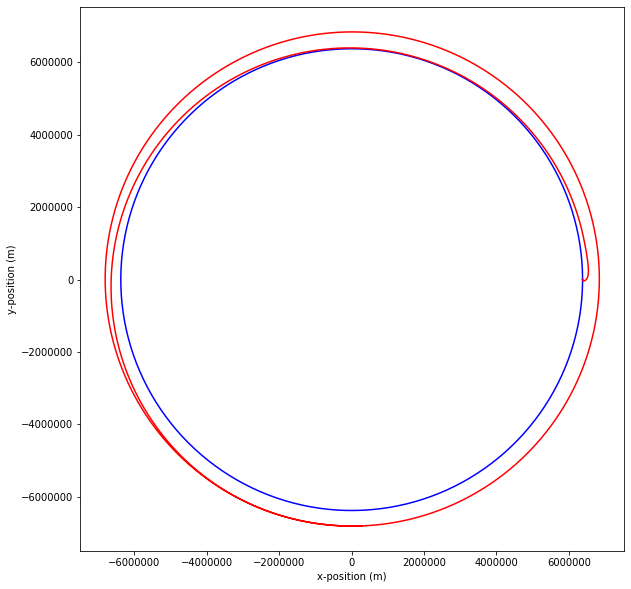

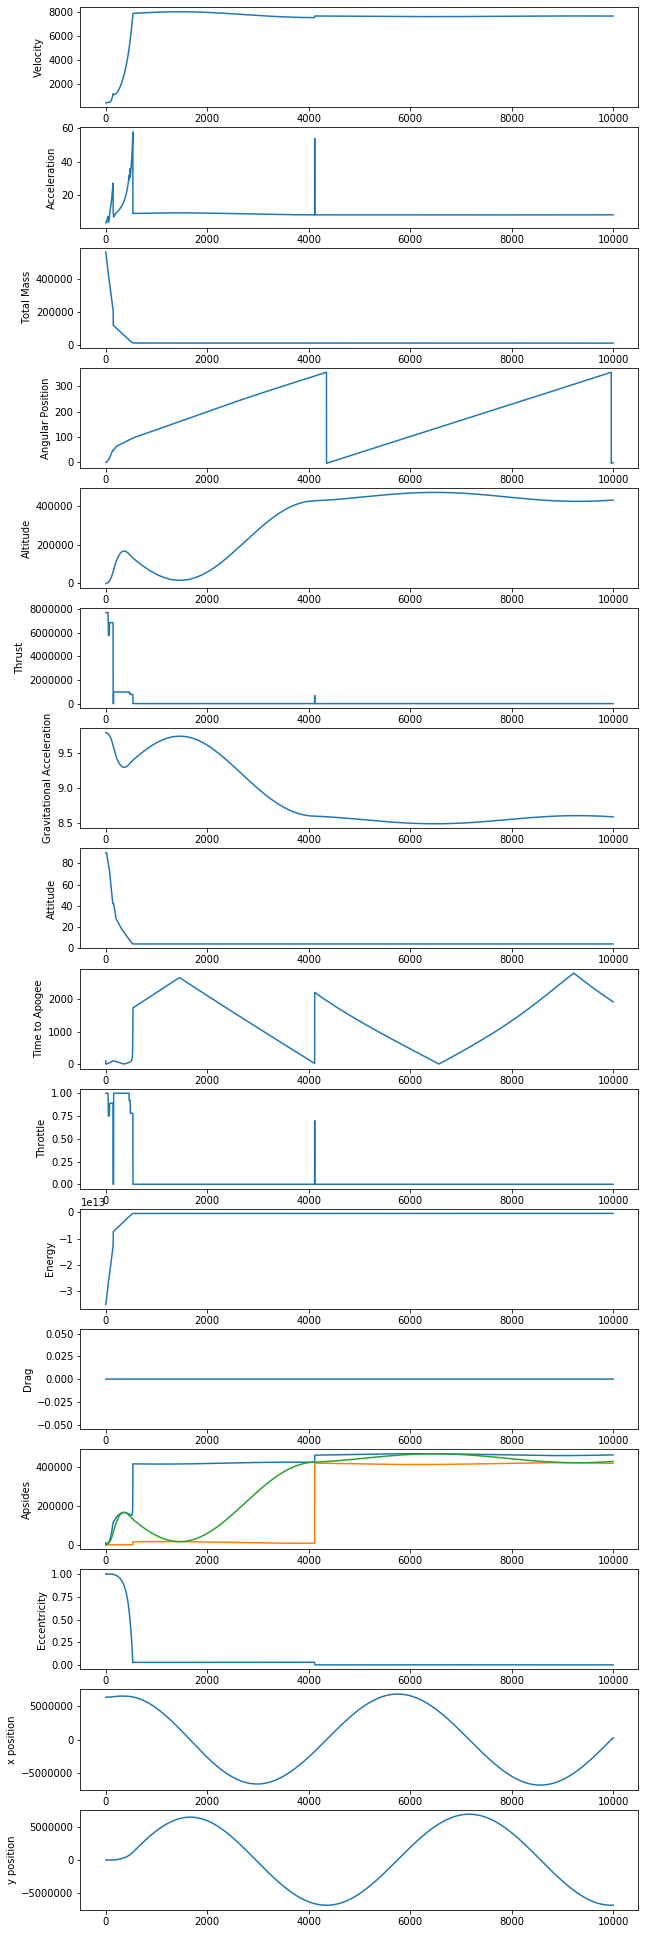

It took 530200.0 kg of fuel to reach orbit.


In [166]:
"""
Aliases: BOHR,
Instructor: Kitchen
Class: 2020 Tri 3 PH412
Date Due: 18 May 2020
"""
import numpy as np
import matplotlib.pyplot as plt

#Physical Constants
G=6.67430e-11 #m^3/k/s^2
m_earth=5.97237e24 #kg
r_earth=6378137. #m
omega_earth=-360/(24*60*60) #Earth angular velocity in deg/s
mu=m_earth*G

#simulation parameters
t=0 #s The initial time
dt=0.5 #s The time step for the simulation

#Functions
#These are functions for various physics calculations that will be needed for the simulation.
def altitude(position):
    r_earth=6378137 #m
    r_rocket=np.linalg.norm(position)
    return r_rocket-r_earth

def speed(velocity):
    return np.linalg.norm(velocity)

def air_density(altitude):
    alt_USSA = [-2000.0, 0.0, 2000.0, 4000.0, 6000.0, 8000.0, 10000.0, 12000.0, 14000.0, 16000.0, 18000.0, 20000.0, 22000.0, 24000.0, 26000.0, 28000.0, 30000.0, 32000.0, 34000.0, 36000.0, 38000.0, 40000.0, 42000.0, 44000.0, 46000.0, 48000.0, 50000.0, 52000.0, 54000.0, 56000.0, 58000.0, 60000.0, 62000.0, 64000.0, 66000.0, 68000.0, 70000.0, 72000.0, 74000.0, 76000.0, 78000.0, 80000.0, 82000.0, 84000.0, 86000.0] #m
    density_USSA = [1.478, 1.225, 1.007, 0.8193, 0.6601, 0.5258, 0.4135, 0.3119, 0.2279, 0.1665, 0.1216, 0.08891, 0.06451, 0.04694, 0.03426, 0.02508, 0.01841, 0.01355, 0.009887, 0.007257, 0.005366, 0.003995, 0.002995, 0.002259, 0.001714, 0.001317, 0.001027, 0.0008055, 0.0006389, 0.0005044, 0.0003962, 0.0003096, 0.0002407, 0.000186, 0.0001429, 0.0001091, 8.281e-05, 6.236e-05, 4.637e-05, 3.43e-05, 2.523e-05, 1.845e-05, 1.341e-05, 9.69e-06, 6.955e-06] #kg/m^3
    return np.interp(altitude,alt_USSA,density_USSA,right=0)
    
def mach(velocity,position, altitude):
    omega_earth=360/(24*60*60)
    r_earth=6378137. #m
    tangential_speed=(omega_earth*np.pi/180)*r_earth
    airspeed=velocity+(np.array([position[1],-position[0]])*tangential_speed/np.linalg.norm(position)) #airspeed accounting for the rotation of the earth
    
    alt_USSA = [-2000.0, 0.0, 2000.0, 4000.0, 6000.0, 8000.0, 10000.0, 12000.0, 14000.0, 16000.0, 18000.0, 20000.0, 22000.0, 24000.0, 26000.0, 28000.0, 30000.0, 32000.0, 34000.0, 36000.0, 38000.0, 40000.0, 42000.0, 44000.0, 46000.0, 48000.0, 50000.0, 52000.0, 54000.0, 56000.0, 58000.0, 60000.0, 62000.0, 64000.0, 66000.0, 68000.0, 70000.0, 72000.0, 74000.0, 76000.0, 78000.0, 80000.0, 82000.0, 84000.0, 86000.0] #m
    temp_USSA = [28.19999999999999, 15.100000000000023, 2.1999999999999886, -10.800000000000011, -23.80000000000001, -36.80000000000001, -49.69999999999999, -56.400000000000006, -56.400000000000006, -56.400000000000006, -56.400000000000006, -56.400000000000006, -54.400000000000006, -52.400000000000006, -50.5, -48.5, -46.5, -44.5, -39.30000000000001, -33.69999999999999, -28.19999999999999, -22.599999999999994, -17.099999999999994, -11.600000000000023, -6.100000000000023, -2.3999999999999773, -2.3999999999999773, -4.0, -9.5, -15.0, -20.5, -26.0, -31.5, -37.0, -42.5, -47.900000000000006, -53.400000000000006, -58.69999999999999, -62.69999999999999, -66.6, -70.5, -74.4, -78.30000000000001, -82.19999999999999, -86.1] #degrees C
    temp=np.interp(altitude, alt_USSA, temp_USSA,right=0)
    c=20.05*(temp+273)**0.5
    return np.linalg.norm(airspeed/c)
    
def C_D(mach):
    mach_SV = [0.008442947521733135, 0.057780710937143986, 0.1092121432797779, 0.18310955350234392, 0.26372491010877974, 0.34434026671521556, 0.4249556233216514, 0.505570979928087, 0.5861863365345228, 0.6533658003732192, 0.7119079045755119, 0.7487606390241681, 0.7863811387738384, 0.8159401028628648, 0.8414682991215696, 0.8683400846570479, 0.8965554594693006, 0.922083655728005, 0.9489554412634837, 0.9758272267989625, 1.0026990123344408, 1.0295707978699196, 1.0564425834053979, 1.0833143689408766, 1.1101861544763554, 1.1370579400118337, 1.1639297255473124, 1.1908015110827912, 1.2163297073414956, 1.2445450821537483, 1.2727604569660005, 1.3117245459924445, 1.3789040098311411, 1.459519366437577, 1.5401347230440128, 1.6140321332665786, 1.6812115971052752, 1.7416731145601019, 1.7954166856310594, 1.8491602567020164, 1.8827499886213648, 1.9230576669245827, 1.9633653452278006, 2.0137499431068226, 2.043980701834236, 2.078914023030358, 2.122676645188138, 2.1649037367438897, 2.199837057940012, 2.238801146966456, 2.283907358401009, 2.3261344499567613, 2.3664421282599792, 2.4168267261390017, 2.447057484866415, 2.5075190023212417, 2.5511856538163946, 2.581416412543808, 2.6418779299986346, 2.695621501069592, 2.749365072140549, 2.8031086432115067, 2.8635701606663333, 2.92403167812116, 2.9844931955759866, 3.0583906057985533, 3.139005962404988, 3.219621319011424, 3.30023667561786, 3.3808520322242956, 3.4614673888307315, 3.5420827454371673, 3.622698102043603, 3.703313458650039, 3.7839288152564747, 3.8645441718629105, 3.9451595284693464, 4.025774885075782, 4.1063902416822184, 4.187005598288653, 4.26762095489509, 4.348236311501525, 4.42885166810796, 4.509467024714397, 4.590082381320832, 4.670697737927268, 4.751313094533703, 4.83192845114014, 4.912543807746575, 4.9931591643530115, 5.0737745209594465, 5.154389877565883, 5.235005234172318, 5.315620590778755, 5.39623594738519, 5.4768513039916265, 5.557466660598061, 5.638082017204498, 5.718697373810933, 5.799312730417368, 5.879928087023805, 5.96054344363024, 6.041158800236676, 6.121774156843111, 6.202389513449548, 6.283004870055983, 6.3636202266624196, 6.4442355832688545, 6.524850939875291, 6.605466296481726, 6.686081653088163, 6.766697009694598, 6.847312366301033, 6.927927722907469, 7.008543079513904, 7.089158436120341, 7.169773792726776, 7.250389149333213, 7.331004505939648, 7.411619862546084, 7.492235219152519, 7.572850575758956, 7.653465932365391, 7.734081288971826, 7.8146966455782625, 7.895312002184697, 7.975927358791134, 8.056542715397569, 8.137158072004006, 8.21777342861044, 8.298388785216877, 8.379004141823312, 8.459619498429749, 8.540234855036184, 8.62085021164262, 8.701465568249056, 8.782080924855492, 8.862696281461927, 8.943311638068362, 9.023926994674799, 9.104542351281234, 9.18515770788767, 9.265773064494105, 9.346388421100542, 9.427003777706977, 9.507619134313414, 9.588234490919849, 9.668849847526285, 9.74946520413272, 9.830080560739157, 9.910695917345592, 9.977875381184289, 0.008442947521733135, 0.057780710937143986, 0.1092121432797779, 0.18310955350234392, 0.26372491010877974, 0.34434026671521556, 0.4249556233216514, 0.505570979928087, 0.5861863365345228, 0.6533658003732192, 0.7119079045755119, 0.7487606390241681, 0.7863811387738384, 0.8159401028628648, 0.8414682991215696, 0.8683400846570479, 0.8965554594693006, 0.922083655728005, 0.9489554412634837, 0.9758272267989625, 1.0026990123344408, 1.0295707978699196, 1.0564425834053979, 1.0833143689408766, 1.1101861544763554, 1.1370579400118337, 1.1639297255473124, 1.1908015110827912, 1.2163297073414956, 1.2445450821537483, 1.2727604569660005, 1.3117245459924445, 1.3789040098311411, 1.459519366437577, 1.5401347230440128, 1.6140321332665786, 1.6812115971052752, 1.7416731145601019, 1.7954166856310594, 1.8491602567020164, 1.8827499886213648, 1.9230576669245827, 1.9633653452278006, 2.0137499431068226, 2.043980701834236, 2.078914023030358, 2.122676645188138, 2.1649037367438897, 2.199837057940012, 2.238801146966456, 2.283907358401009, 2.3261344499567613, 2.3664421282599792, 2.4168267261390017, 2.447057484866415, 2.5075190023212417, 2.5511856538163946, 2.581416412543808, 2.6418779299986346, 2.695621501069592, 2.749365072140549, 2.8031086432115067, 2.8635701606663333, 2.92403167812116, 2.9844931955759866, 3.0583906057985533, 3.139005962404988, 3.219621319011424, 3.30023667561786, 3.3808520322242956, 3.4614673888307315, 3.5420827454371673, 3.622698102043603, 3.703313458650039, 3.7839288152564747, 3.8645441718629105, 3.9451595284693464, 4.025774885075782, 4.1063902416822184, 4.187005598288653, 4.26762095489509, 4.348236311501525, 4.42885166810796, 4.509467024714397, 4.590082381320832, 4.670697737927268, 4.751313094533703, 4.83192845114014, 4.912543807746575, 4.9931591643530115, 5.0737745209594465, 5.154389877565883, 5.235005234172318, 5.315620590778755, 5.39623594738519, 5.4768513039916265, 5.557466660598061, 5.638082017204498, 5.718697373810933, 5.799312730417368, 5.879928087023805, 5.96054344363024, 6.041158800236676, 6.121774156843111, 6.202389513449548, 6.283004870055983, 6.3636202266624196, 6.4442355832688545, 6.524850939875291, 6.605466296481726, 6.686081653088163, 6.766697009694598, 6.847312366301033, 6.927927722907469, 7.008543079513904, 7.089158436120341, 7.169773792726776, 7.250389149333213, 7.331004505939648, 7.411619862546084, 7.492235219152519, 7.572850575758956, 7.653465932365391, 7.734081288971826, 7.8146966455782625, 7.895312002184697, 7.975927358791134, 8.056542715397569, 8.137158072004006, 8.21777342861044, 8.298388785216877, 8.379004141823312, 8.459619498429749, 8.540234855036184, 8.62085021164262, 8.701465568249056, 8.782080924855492, 8.862696281461927, 8.943311638068362, 9.023926994674799, 9.104542351281234, 9.18515770788767, 9.265773064494105, 9.346388421100542, 9.427003777706977, 9.507619134313414, 9.588234490919849, 9.668849847526285, 9.74946520413272, 9.830080560739157, 9.910695917345592, 9.977875381184289, 0.008442947521733135, 0.057780710937143986, 0.1092121432797779, 0.18310955350234392, 0.26372491010877974, 0.34434026671521556, 0.4249556233216514, 0.505570979928087, 0.5861863365345228, 0.6533658003732192, 0.7119079045755119, 0.7487606390241681, 0.7863811387738384, 0.8159401028628648, 0.8414682991215696, 0.8683400846570479, 0.8965554594693006, 0.922083655728005, 0.9489554412634837, 0.9758272267989625, 1.0026990123344408, 1.0295707978699196, 1.0564425834053979, 1.0833143689408766, 1.1101861544763554, 1.1370579400118337, 1.1639297255473124, 1.1908015110827912, 1.2163297073414956, 1.2445450821537483, 1.2727604569660005, 1.3117245459924445, 1.3789040098311411, 1.459519366437577, 1.5401347230440128, 1.6140321332665786, 1.6812115971052752, 1.7416731145601019, 1.7954166856310594, 1.8491602567020164, 1.8827499886213648, 1.9230576669245827, 1.9633653452278006, 2.0137499431068226, 2.043980701834236, 2.078914023030358, 2.122676645188138, 2.1649037367438897, 2.199837057940012, 2.238801146966456, 2.283907358401009, 2.3261344499567613, 2.3664421282599792, 2.4168267261390017, 2.447057484866415, 2.5075190023212417, 2.5511856538163946, 2.581416412543808, 2.6418779299986346, 2.695621501069592, 2.749365072140549, 2.8031086432115067, 2.8635701606663333, 2.92403167812116, 2.9844931955759866, 3.0583906057985533, 3.139005962404988, 3.219621319011424, 3.30023667561786, 3.3808520322242956, 3.4614673888307315, 3.5420827454371673, 3.622698102043603, 3.703313458650039, 3.7839288152564747, 3.8645441718629105, 3.9451595284693464, 4.025774885075782, 4.1063902416822184, 4.187005598288653, 4.26762095489509, 4.348236311501525, 4.42885166810796, 4.509467024714397, 4.590082381320832, 4.670697737927268, 4.751313094533703, 4.83192845114014, 4.912543807746575, 4.9931591643530115, 5.0737745209594465, 5.154389877565883, 5.235005234172318, 5.315620590778755, 5.39623594738519, 5.4768513039916265, 5.557466660598061, 5.638082017204498, 5.718697373810933, 5.799312730417368, 5.879928087023805, 5.96054344363024, 6.041158800236676, 6.121774156843111, 6.202389513449548, 6.283004870055983, 6.3636202266624196, 6.4442355832688545, 6.524850939875291, 6.605466296481726, 6.686081653088163, 6.766697009694598, 6.847312366301033, 6.927927722907469, 7.008543079513904, 7.089158436120341, 7.169773792726776, 7.250389149333213, 7.331004505939648, 7.411619862546084, 7.492235219152519, 7.572850575758956, 7.653465932365391, 7.734081288971826, 7.8146966455782625, 7.895312002184697, 7.975927358791134, 8.056542715397569, 8.137158072004006, 8.21777342861044, 8.298388785216877, 8.379004141823312, 8.459619498429749, 8.540234855036184, 8.62085021164262, 8.701465568249056, 8.782080924855492, 8.862696281461927, 8.943311638068362, 9.023926994674799, 9.104542351281234, 9.18515770788767, 9.265773064494105, 9.346388421100542, 9.427003777706977, 9.507619134313414, 9.588234490919849, 9.668849847526285, 9.74946520413272, 9.830080560739157, 9.910695917345592, 9.977875381184289, 0.008442947521733135, 0.057780710937143986, 0.1092121432797779, 0.18310955350234392, 0.26372491010877974, 0.34434026671521556, 0.4249556233216514, 0.505570979928087, 0.5861863365345228, 0.6533658003732192, 0.7119079045755119, 0.7487606390241681, 0.7863811387738384, 0.8159401028628648, 0.8414682991215696, 0.8683400846570479, 0.8965554594693006, 0.922083655728005, 0.9489554412634837, 0.9758272267989625, 1.0026990123344408, 1.0295707978699196, 1.0564425834053979, 1.0833143689408766, 1.1101861544763554, 1.1370579400118337, 1.1639297255473124, 1.1908015110827912, 1.2163297073414956, 1.2445450821537483, 1.2727604569660005, 1.3117245459924445, 1.3789040098311411, 1.459519366437577, 1.5401347230440128, 1.6140321332665786, 1.6812115971052752, 1.7416731145601019, 1.7954166856310594, 1.8491602567020164, 1.8827499886213648, 1.9230576669245827, 1.9633653452278006, 2.0137499431068226, 2.043980701834236, 2.078914023030358, 2.122676645188138, 2.1649037367438897, 2.199837057940012, 2.238801146966456, 2.283907358401009, 2.3261344499567613, 2.3664421282599792, 2.4168267261390017, 2.447057484866415, 2.5075190023212417, 2.5511856538163946, 2.581416412543808, 2.6418779299986346, 2.695621501069592, 2.749365072140549, 2.8031086432115067, 2.8635701606663333, 2.92403167812116, 2.9844931955759866, 3.0583906057985533, 3.139005962404988, 3.219621319011424, 3.30023667561786, 3.3808520322242956, 3.4614673888307315, 3.5420827454371673, 3.622698102043603, 3.703313458650039, 3.7839288152564747, 3.8645441718629105, 3.9451595284693464, 4.025774885075782, 4.1063902416822184, 4.187005598288653, 4.26762095489509, 4.348236311501525, 4.42885166810796, 4.509467024714397, 4.590082381320832, 4.670697737927268, 4.751313094533703, 4.83192845114014, 4.912543807746575, 4.9931591643530115, 5.0737745209594465, 5.154389877565883, 5.235005234172318, 5.315620590778755, 5.39623594738519, 5.4768513039916265, 5.557466660598061, 5.638082017204498, 5.718697373810933, 5.799312730417368, 5.879928087023805, 5.96054344363024, 6.041158800236676, 6.121774156843111, 6.202389513449548, 6.283004870055983, 6.3636202266624196, 6.4442355832688545, 6.524850939875291, 6.605466296481726, 6.686081653088163, 6.766697009694598, 6.847312366301033, 6.927927722907469, 7.008543079513904, 7.089158436120341, 7.169773792726776, 7.250389149333213, 7.331004505939648, 7.411619862546084, 7.492235219152519, 7.572850575758956, 7.653465932365391, 7.734081288971826, 7.8146966455782625, 7.895312002184697, 7.975927358791134, 8.056542715397569, 8.137158072004006, 8.21777342861044, 8.298388785216877, 8.379004141823312, 8.459619498429749, 8.540234855036184, 8.62085021164262, 8.701465568249056, 8.782080924855492, 8.862696281461927, 8.943311638068362, 9.023926994674799, 9.104542351281234, 9.18515770788767, 9.265773064494105, 9.346388421100542, 9.427003777706977, 9.507619134313414, 9.588234490919849, 9.668849847526285, 9.74946520413272, 9.830080560739157, 9.910695917345592, 9.977875381184289, 0.008442947521733135, 0.057780710937143986, 0.1092121432797779, 0.18310955350234392, 0.26372491010877974, 0.34434026671521556, 0.4249556233216514, 0.505570979928087, 0.5861863365345228, 0.6533658003732192, 0.7119079045755119, 0.7487606390241681, 0.7863811387738384, 0.8159401028628648, 0.8414682991215696, 0.8683400846570479, 0.8965554594693006, 0.922083655728005, 0.9489554412634837, 0.9758272267989625, 1.0026990123344408, 1.0295707978699196, 1.0564425834053979, 1.0833143689408766, 1.1101861544763554, 1.1370579400118337, 1.1639297255473124, 1.1908015110827912, 1.2163297073414956, 1.2445450821537483, 1.2727604569660005, 1.3117245459924445, 1.3789040098311411, 1.459519366437577, 1.5401347230440128, 1.6140321332665786, 1.6812115971052752, 1.7416731145601019, 1.7954166856310594, 1.8491602567020164, 1.8827499886213648, 1.9230576669245827, 1.9633653452278006, 2.0137499431068226, 2.043980701834236, 2.078914023030358, 2.122676645188138, 2.1649037367438897, 2.199837057940012, 2.238801146966456, 2.283907358401009, 2.3261344499567613, 2.3664421282599792, 2.4168267261390017, 2.447057484866415, 2.5075190023212417, 2.5511856538163946, 2.581416412543808, 2.6418779299986346, 2.695621501069592, 2.749365072140549, 2.8031086432115067, 2.8635701606663333, 2.92403167812116, 2.9844931955759866, 3.0583906057985533, 3.139005962404988, 3.219621319011424, 3.30023667561786, 3.3808520322242956, 3.4614673888307315, 3.5420827454371673, 3.622698102043603, 3.703313458650039, 3.7839288152564747, 3.8645441718629105, 3.9451595284693464, 4.025774885075782, 4.1063902416822184, 4.187005598288653, 4.26762095489509, 4.348236311501525, 4.42885166810796, 4.509467024714397, 4.590082381320832, 4.670697737927268, 4.751313094533703, 4.83192845114014, 4.912543807746575, 4.9931591643530115, 5.0737745209594465, 5.154389877565883, 5.235005234172318, 5.315620590778755, 5.39623594738519, 5.4768513039916265, 5.557466660598061, 5.638082017204498, 5.718697373810933, 5.799312730417368, 5.879928087023805, 5.96054344363024, 6.041158800236676, 6.121774156843111, 6.202389513449548, 6.283004870055983, 6.3636202266624196, 6.4442355832688545, 6.524850939875291, 6.605466296481726, 6.686081653088163, 6.766697009694598, 6.847312366301033, 6.927927722907469, 7.008543079513904, 7.089158436120341, 7.169773792726776, 7.250389149333213, 7.331004505939648, 7.411619862546084, 7.492235219152519, 7.572850575758956, 7.653465932365391, 7.734081288971826, 7.8146966455782625, 7.895312002184697, 7.975927358791134, 8.056542715397569, 8.137158072004006, 8.21777342861044, 8.298388785216877, 8.379004141823312, 8.459619498429749, 8.540234855036184, 8.62085021164262, 8.701465568249056, 8.782080924855492, 8.862696281461927, 8.943311638068362, 9.023926994674799, 9.104542351281234, 9.18515770788767, 9.265773064494105, 9.346388421100542, 9.427003777706977, 9.507619134313414, 9.588234490919849, 9.668849847526285, 9.74946520413272, 9.830080560739157, 9.910695917345592, 9.977875381184289, 0.008442947521733135, 0.057780710937143986, 0.1092121432797779, 0.18310955350234392, 0.26372491010877974, 0.34434026671521556, 0.4249556233216514, 0.505570979928087, 0.5861863365345228, 0.6533658003732192, 0.7119079045755119, 0.7487606390241681, 0.7863811387738384, 0.8159401028628648, 0.8414682991215696, 0.8683400846570479, 0.8965554594693006, 0.922083655728005, 0.9489554412634837, 0.9758272267989625, 1.0026990123344408, 1.0295707978699196, 1.0564425834053979, 1.0833143689408766, 1.1101861544763554, 1.1370579400118337, 1.1639297255473124, 1.1908015110827912, 1.2163297073414956, 1.2445450821537483, 1.2727604569660005, 1.3117245459924445, 1.3789040098311411, 1.459519366437577, 1.5401347230440128, 1.6140321332665786, 1.6812115971052752, 1.7416731145601019, 1.7954166856310594, 1.8491602567020164, 1.8827499886213648, 1.9230576669245827, 1.9633653452278006, 2.0137499431068226, 2.043980701834236, 2.078914023030358, 2.122676645188138, 2.1649037367438897, 2.199837057940012, 2.238801146966456, 2.283907358401009, 2.3261344499567613, 2.3664421282599792, 2.4168267261390017, 2.447057484866415, 2.5075190023212417, 2.5511856538163946, 2.581416412543808, 2.6418779299986346, 2.695621501069592, 2.749365072140549, 2.8031086432115067, 2.8635701606663333, 2.92403167812116, 2.9844931955759866, 3.0583906057985533, 3.139005962404988, 3.219621319011424, 3.30023667561786, 3.3808520322242956, 3.4614673888307315, 3.5420827454371673, 3.622698102043603, 3.703313458650039, 3.7839288152564747, 3.8645441718629105, 3.9451595284693464, 4.025774885075782, 4.1063902416822184, 4.187005598288653, 4.26762095489509, 4.348236311501525, 4.42885166810796, 4.509467024714397, 4.590082381320832, 4.670697737927268, 4.751313094533703, 4.83192845114014, 4.912543807746575, 4.9931591643530115, 5.0737745209594465, 5.154389877565883, 5.235005234172318, 5.315620590778755, 5.39623594738519, 5.4768513039916265, 5.557466660598061, 5.638082017204498, 5.718697373810933, 5.799312730417368, 5.879928087023805, 5.96054344363024, 6.041158800236676, 6.121774156843111, 6.202389513449548, 6.283004870055983, 6.3636202266624196, 6.4442355832688545, 6.524850939875291, 6.605466296481726, 6.686081653088163, 6.766697009694598, 6.847312366301033, 6.927927722907469, 7.008543079513904, 7.089158436120341, 7.169773792726776, 7.250389149333213, 7.331004505939648, 7.411619862546084, 7.492235219152519, 7.572850575758956, 7.653465932365391, 7.734081288971826, 7.8146966455782625, 7.895312002184697, 7.975927358791134, 8.056542715397569, 8.137158072004006, 8.21777342861044, 8.298388785216877, 8.379004141823312, 8.459619498429749, 8.540234855036184, 8.62085021164262, 8.701465568249056, 8.782080924855492, 8.862696281461927, 8.943311638068362, 9.023926994674799, 9.104542351281234, 9.18515770788767, 9.265773064494105, 9.346388421100542, 9.427003777706977, 9.507619134313414, 9.588234490919849, 9.668849847526285, 9.74946520413272, 9.830080560739157, 9.910695917345592, 9.977875381184289, 0.008442947521733135, 0.057780710937143986, 0.1092121432797779, 0.18310955350234392, 0.26372491010877974, 0.34434026671521556, 0.4249556233216514, 0.505570979928087, 0.5861863365345228, 0.6533658003732192, 0.7119079045755119, 0.7487606390241681, 0.7863811387738384, 0.8159401028628648, 0.8414682991215696, 0.8683400846570479, 0.8965554594693006, 0.922083655728005, 0.9489554412634837, 0.9758272267989625, 1.0026990123344408, 1.0295707978699196, 1.0564425834053979, 1.0833143689408766, 1.1101861544763554, 1.1370579400118337, 1.1639297255473124, 1.1908015110827912, 1.2163297073414956, 1.2445450821537483, 1.2727604569660005, 1.3117245459924445, 1.3789040098311411, 1.459519366437577, 1.5401347230440128, 1.6140321332665786, 1.6812115971052752, 1.7416731145601019, 1.7954166856310594, 1.8491602567020164, 1.8827499886213648, 1.9230576669245827, 1.9633653452278006, 2.0137499431068226, 2.043980701834236, 2.078914023030358, 2.122676645188138, 2.1649037367438897, 2.199837057940012, 2.238801146966456, 2.283907358401009, 2.3261344499567613, 2.3664421282599792, 2.4168267261390017, 2.447057484866415, 2.5075190023212417, 2.5511856538163946, 2.581416412543808, 2.6418779299986346, 2.695621501069592, 2.749365072140549, 2.8031086432115067, 2.8635701606663333, 2.92403167812116, 2.9844931955759866, 3.0583906057985533, 3.139005962404988, 3.219621319011424, 3.30023667561786, 3.3808520322242956, 3.4614673888307315, 3.5420827454371673, 3.622698102043603, 3.703313458650039, 3.7839288152564747, 3.8645441718629105, 3.9451595284693464, 4.025774885075782, 4.1063902416822184, 4.187005598288653, 4.26762095489509, 4.348236311501525, 4.42885166810796, 4.509467024714397, 4.590082381320832, 4.670697737927268, 4.751313094533703, 4.83192845114014, 4.912543807746575, 4.9931591643530115, 5.0737745209594465, 5.154389877565883, 5.235005234172318, 5.315620590778755, 5.39623594738519, 5.4768513039916265, 5.557466660598061, 5.638082017204498, 5.718697373810933, 5.799312730417368, 5.879928087023805, 5.96054344363024, 6.041158800236676, 6.121774156843111, 6.202389513449548, 6.283004870055983, 6.3636202266624196, 6.4442355832688545, 6.524850939875291, 6.605466296481726, 6.686081653088163, 6.766697009694598, 6.847312366301033, 6.927927722907469, 7.008543079513904, 7.089158436120341, 7.169773792726776, 7.250389149333213, 7.331004505939648, 7.411619862546084, 7.492235219152519, 7.572850575758956, 7.653465932365391, 7.734081288971826, 7.8146966455782625, 7.895312002184697, 7.975927358791134, 8.056542715397569, 8.137158072004006, 8.21777342861044, 8.298388785216877, 8.379004141823312, 8.459619498429749, 8.540234855036184, 8.62085021164262, 8.701465568249056, 8.782080924855492, 8.862696281461927, 8.943311638068362, 9.023926994674799, 9.104542351281234, 9.18515770788767, 9.265773064494105, 9.346388421100542, 9.427003777706977, 9.507619134313414, 9.588234490919849, 9.668849847526285, 9.74946520413272, 9.830080560739157, 9.910695917345592, 9.977875381184289, 0.008442947521733135, 0.057780710937143986, 0.1092121432797779, 0.18310955350234392, 0.26372491010877974, 0.34434026671521556, 0.4249556233216514, 0.505570979928087, 0.5861863365345228, 0.6533658003732192, 0.7119079045755119, 0.7487606390241681, 0.7863811387738384, 0.8159401028628648, 0.8414682991215696, 0.8683400846570479, 0.8965554594693006, 0.922083655728005, 0.9489554412634837, 0.9758272267989625, 1.0026990123344408, 1.0295707978699196, 1.0564425834053979, 1.0833143689408766, 1.1101861544763554, 1.1370579400118337, 1.1639297255473124, 1.1908015110827912, 1.2163297073414956, 1.2445450821537483, 1.2727604569660005, 1.3117245459924445, 1.3789040098311411, 1.459519366437577, 1.5401347230440128, 1.6140321332665786, 1.6812115971052752, 1.7416731145601019, 1.7954166856310594, 1.8491602567020164, 1.8827499886213648, 1.9230576669245827, 1.9633653452278006, 2.0137499431068226, 2.043980701834236, 2.078914023030358, 2.122676645188138, 2.1649037367438897, 2.199837057940012, 2.238801146966456, 2.283907358401009, 2.3261344499567613, 2.3664421282599792, 2.4168267261390017, 2.447057484866415, 2.5075190023212417, 2.5511856538163946, 2.581416412543808, 2.6418779299986346, 2.695621501069592, 2.749365072140549, 2.8031086432115067, 2.8635701606663333, 2.92403167812116, 2.9844931955759866, 3.0583906057985533, 3.139005962404988, 3.219621319011424, 3.30023667561786, 3.3808520322242956, 3.4614673888307315, 3.5420827454371673, 3.622698102043603, 3.703313458650039, 3.7839288152564747, 3.8645441718629105, 3.9451595284693464, 4.025774885075782, 4.1063902416822184, 4.187005598288653, 4.26762095489509, 4.348236311501525, 4.42885166810796, 4.509467024714397, 4.590082381320832, 4.670697737927268, 4.751313094533703, 4.83192845114014, 4.912543807746575, 4.9931591643530115, 5.0737745209594465, 5.154389877565883, 5.235005234172318, 5.315620590778755, 5.39623594738519, 5.4768513039916265, 5.557466660598061, 5.638082017204498, 5.718697373810933, 5.799312730417368, 5.879928087023805, 5.96054344363024, 6.041158800236676, 6.121774156843111, 6.202389513449548, 6.283004870055983, 6.3636202266624196, 6.4442355832688545, 6.524850939875291, 6.605466296481726, 6.686081653088163, 6.766697009694598, 6.847312366301033, 6.927927722907469, 7.008543079513904, 7.089158436120341, 7.169773792726776, 7.250389149333213, 7.331004505939648, 7.411619862546084, 7.492235219152519, 7.572850575758956, 7.653465932365391, 7.734081288971826, 7.8146966455782625, 7.895312002184697, 7.975927358791134, 8.056542715397569, 8.137158072004006, 8.21777342861044, 8.298388785216877, 8.379004141823312, 8.459619498429749, 8.540234855036184, 8.62085021164262, 8.701465568249056, 8.782080924855492, 8.862696281461927, 8.943311638068362, 9.023926994674799, 9.104542351281234, 9.18515770788767, 9.265773064494105, 9.346388421100542, 9.427003777706977, 9.507619134313414, 9.588234490919849, 9.668849847526285, 9.74946520413272, 9.830080560739157, 9.910695917345592, 9.977875381184289, 0.008442947521733135, 0.057780710937143986, 0.1092121432797779, 0.18310955350234392, 0.26372491010877974, 0.34434026671521556, 0.4249556233216514, 0.505570979928087, 0.5861863365345228, 0.6533658003732192, 0.7119079045755119, 0.7487606390241681, 0.7863811387738384, 0.8159401028628648, 0.8414682991215696, 0.8683400846570479, 0.8965554594693006, 0.922083655728005, 0.9489554412634837, 0.9758272267989625, 1.0026990123344408, 1.0295707978699196, 1.0564425834053979, 1.0833143689408766, 1.1101861544763554, 1.1370579400118337, 1.1639297255473124, 1.1908015110827912, 1.2163297073414956, 1.2445450821537483, 1.2727604569660005, 1.3117245459924445, 1.3789040098311411, 1.459519366437577, 1.5401347230440128, 1.6140321332665786, 1.6812115971052752, 1.7416731145601019, 1.7954166856310594, 1.8491602567020164, 1.8827499886213648, 1.9230576669245827, 1.9633653452278006, 2.0137499431068226, 2.043980701834236, 2.078914023030358, 2.122676645188138, 2.1649037367438897, 2.199837057940012, 2.238801146966456, 2.283907358401009, 2.3261344499567613, 2.3664421282599792, 2.4168267261390017, 2.447057484866415, 2.5075190023212417, 2.5511856538163946, 2.581416412543808, 2.6418779299986346, 2.695621501069592, 2.749365072140549, 2.8031086432115067, 2.8635701606663333, 2.92403167812116, 2.9844931955759866, 3.0583906057985533, 3.139005962404988, 3.219621319011424, 3.30023667561786, 3.3808520322242956, 3.4614673888307315, 3.5420827454371673, 3.622698102043603, 3.703313458650039, 3.7839288152564747, 3.8645441718629105, 3.9451595284693464, 4.025774885075782, 4.1063902416822184, 4.187005598288653, 4.26762095489509, 4.348236311501525, 4.42885166810796, 4.509467024714397, 4.590082381320832, 4.670697737927268, 4.751313094533703, 4.83192845114014, 4.912543807746575, 4.9931591643530115, 5.0737745209594465, 5.154389877565883, 5.235005234172318, 5.315620590778755, 5.39623594738519, 5.4768513039916265, 5.557466660598061, 5.638082017204498, 5.718697373810933, 5.799312730417368, 5.879928087023805, 5.96054344363024, 6.041158800236676, 6.121774156843111, 6.202389513449548, 6.283004870055983, 6.3636202266624196, 6.4442355832688545, 6.524850939875291, 6.605466296481726, 6.686081653088163, 6.766697009694598, 6.847312366301033, 6.927927722907469, 7.008543079513904, 7.089158436120341, 7.169773792726776, 7.250389149333213, 7.331004505939648, 7.411619862546084, 7.492235219152519, 7.572850575758956, 7.653465932365391, 7.734081288971826, 7.8146966455782625, 7.895312002184697, 7.975927358791134, 8.056542715397569, 8.137158072004006, 8.21777342861044, 8.298388785216877, 8.379004141823312, 8.459619498429749, 8.540234855036184, 8.62085021164262, 8.701465568249056, 8.782080924855492, 8.862696281461927, 8.943311638068362, 9.023926994674799, 9.104542351281234, 9.18515770788767, 9.265773064494105, 9.346388421100542, 9.427003777706977, 9.507619134313414, 9.588234490919849, 9.668849847526285, 9.74946520413272, 9.830080560739157, 9.910695917345592, 9.977875381184289, 0.008442947521733135, 0.057780710937143986, 0.1092121432797779, 0.18310955350234392, 0.26372491010877974, 0.34434026671521556, 0.4249556233216514, 0.505570979928087, 0.5861863365345228, 0.6533658003732192, 0.7119079045755119, 0.7487606390241681, 0.7863811387738384, 0.8159401028628648, 0.8414682991215696, 0.8683400846570479, 0.8965554594693006, 0.922083655728005, 0.9489554412634837, 0.9758272267989625, 1.0026990123344408, 1.0295707978699196, 1.0564425834053979, 1.0833143689408766, 1.1101861544763554, 1.1370579400118337, 1.1639297255473124, 1.1908015110827912, 1.2163297073414956, 1.2445450821537483, 1.2727604569660005, 1.3117245459924445, 1.3789040098311411, 1.459519366437577, 1.5401347230440128, 1.6140321332665786, 1.6812115971052752, 1.7416731145601019, 1.7954166856310594, 1.8491602567020164, 1.8827499886213648, 1.9230576669245827, 1.9633653452278006, 2.0137499431068226, 2.043980701834236, 2.078914023030358, 2.122676645188138, 2.1649037367438897, 2.199837057940012, 2.238801146966456, 2.283907358401009, 2.3261344499567613, 2.3664421282599792, 2.4168267261390017, 2.447057484866415, 2.5075190023212417, 2.5511856538163946, 2.581416412543808, 2.6418779299986346, 2.695621501069592, 2.749365072140549, 2.8031086432115067, 2.8635701606663333, 2.92403167812116, 2.9844931955759866, 3.0583906057985533, 3.139005962404988, 3.219621319011424, 3.30023667561786, 3.3808520322242956, 3.4614673888307315, 3.5420827454371673, 3.622698102043603, 3.703313458650039, 3.7839288152564747, 3.8645441718629105, 3.9451595284693464, 4.025774885075782, 4.1063902416822184, 4.187005598288653, 4.26762095489509, 4.348236311501525, 4.42885166810796, 4.509467024714397, 4.590082381320832, 4.670697737927268, 4.751313094533703, 4.83192845114014, 4.912543807746575, 4.9931591643530115, 5.0737745209594465, 5.154389877565883, 5.235005234172318, 5.315620590778755, 5.39623594738519, 5.4768513039916265, 5.557466660598061, 5.638082017204498, 5.718697373810933, 5.799312730417368, 5.879928087023805, 5.96054344363024, 6.041158800236676, 6.121774156843111, 6.202389513449548, 6.283004870055983, 6.3636202266624196, 6.4442355832688545, 6.524850939875291, 6.605466296481726, 6.686081653088163, 6.766697009694598, 6.847312366301033, 6.927927722907469, 7.008543079513904, 7.089158436120341, 7.169773792726776, 7.250389149333213, 7.331004505939648, 7.411619862546084, 7.492235219152519, 7.572850575758956, 7.653465932365391, 7.734081288971826, 7.8146966455782625, 7.895312002184697, 7.975927358791134, 8.056542715397569, 8.137158072004006, 8.21777342861044, 8.298388785216877, 8.379004141823312, 8.459619498429749, 8.540234855036184, 8.62085021164262, 8.701465568249056, 8.782080924855492, 8.862696281461927, 8.943311638068362, 9.023926994674799, 9.104542351281234, 9.18515770788767, 9.265773064494105, 9.346388421100542, 9.427003777706977, 9.507619134313414, 9.588234490919849, 9.668849847526285, 9.74946520413272, 9.830080560739157, 9.910695917345592, 9.977875381184289, 0.008442947521733135, 0.057780710937143986, 0.1092121432797779, 0.18310955350234392, 0.26372491010877974, 0.34434026671521556, 0.4249556233216514, 0.505570979928087, 0.5861863365345228, 0.6533658003732192, 0.7119079045755119, 0.7487606390241681, 0.7863811387738384, 0.8159401028628648, 0.8414682991215696, 0.8683400846570479, 0.8965554594693006, 0.922083655728005, 0.9489554412634837, 0.9758272267989625, 1.0026990123344408, 1.0295707978699196, 1.0564425834053979, 1.0833143689408766, 1.1101861544763554, 1.1370579400118337, 1.1639297255473124, 1.1908015110827912, 1.2163297073414956, 1.2445450821537483, 1.2727604569660005, 1.3117245459924445, 1.3789040098311411, 1.459519366437577, 1.5401347230440128, 1.6140321332665786, 1.6812115971052752, 1.7416731145601019, 1.7954166856310594, 1.8491602567020164, 1.8827499886213648, 1.9230576669245827, 1.9633653452278006, 2.0137499431068226, 2.043980701834236, 2.078914023030358, 2.122676645188138, 2.1649037367438897, 2.199837057940012, 2.238801146966456, 2.283907358401009, 2.3261344499567613, 2.3664421282599792, 2.4168267261390017, 2.447057484866415, 2.5075190023212417, 2.5511856538163946, 2.581416412543808, 2.6418779299986346, 2.695621501069592, 2.749365072140549, 2.8031086432115067, 2.8635701606663333, 2.92403167812116, 2.9844931955759866, 3.0583906057985533, 3.139005962404988, 3.219621319011424, 3.30023667561786, 3.3808520322242956, 3.4614673888307315, 3.5420827454371673, 3.622698102043603, 3.703313458650039, 3.7839288152564747, 3.8645441718629105, 3.9451595284693464, 4.025774885075782, 4.1063902416822184, 4.187005598288653, 4.26762095489509, 4.348236311501525, 4.42885166810796, 4.509467024714397, 4.590082381320832, 4.670697737927268, 4.751313094533703, 4.83192845114014, 4.912543807746575, 4.9931591643530115, 5.0737745209594465, 5.154389877565883, 5.235005234172318, 5.315620590778755, 5.39623594738519, 5.4768513039916265, 5.557466660598061, 5.638082017204498, 5.718697373810933, 5.799312730417368, 5.879928087023805, 5.96054344363024, 6.041158800236676, 6.121774156843111, 6.202389513449548, 6.283004870055983, 6.3636202266624196, 6.4442355832688545, 6.524850939875291, 6.605466296481726, 6.686081653088163, 6.766697009694598, 6.847312366301033, 6.927927722907469, 7.008543079513904, 7.089158436120341, 7.169773792726776, 7.250389149333213, 7.331004505939648, 7.411619862546084, 7.492235219152519, 7.572850575758956, 7.653465932365391, 7.734081288971826, 7.8146966455782625, 7.895312002184697, 7.975927358791134, 8.056542715397569, 8.137158072004006, 8.21777342861044, 8.298388785216877, 8.379004141823312, 8.459619498429749, 8.540234855036184, 8.62085021164262, 8.701465568249056, 8.782080924855492, 8.862696281461927, 8.943311638068362, 9.023926994674799, 9.104542351281234, 9.18515770788767, 9.265773064494105, 9.346388421100542, 9.427003777706977, 9.507619134313414, 9.588234490919849, 9.668849847526285, 9.74946520413272, 9.830080560739157, 9.910695917345592, 9.977875381184289, 0.008442947521733135, 0.057780710937143986, 0.1092121432797779, 0.18310955350234392, 0.26372491010877974, 0.34434026671521556, 0.4249556233216514, 0.505570979928087, 0.5861863365345228, 0.6533658003732192, 0.7119079045755119, 0.7487606390241681, 0.7863811387738384, 0.8159401028628648, 0.8414682991215696, 0.8683400846570479, 0.8965554594693006, 0.922083655728005, 0.9489554412634837, 0.9758272267989625, 1.0026990123344408, 1.0295707978699196, 1.0564425834053979, 1.0833143689408766, 1.1101861544763554, 1.1370579400118337, 1.1639297255473124, 1.1908015110827912, 1.2163297073414956, 1.2445450821537483, 1.2727604569660005, 1.3117245459924445, 1.3789040098311411, 1.459519366437577, 1.5401347230440128, 1.6140321332665786, 1.6812115971052752, 1.7416731145601019, 1.7954166856310594, 1.8491602567020164, 1.8827499886213648, 1.9230576669245827, 1.9633653452278006, 2.0137499431068226, 2.043980701834236, 2.078914023030358, 2.122676645188138, 2.1649037367438897, 2.199837057940012, 2.238801146966456, 2.283907358401009, 2.3261344499567613, 2.3664421282599792, 2.4168267261390017, 2.447057484866415, 2.5075190023212417, 2.5511856538163946, 2.581416412543808, 2.6418779299986346, 2.695621501069592, 2.749365072140549, 2.8031086432115067, 2.8635701606663333, 2.92403167812116, 2.9844931955759866, 3.0583906057985533, 3.139005962404988, 3.219621319011424, 3.30023667561786, 3.3808520322242956, 3.4614673888307315, 3.5420827454371673, 3.622698102043603, 3.703313458650039, 3.7839288152564747, 3.8645441718629105, 3.9451595284693464, 4.025774885075782, 4.1063902416822184, 4.187005598288653, 4.26762095489509, 4.348236311501525, 4.42885166810796, 4.509467024714397, 4.590082381320832, 4.670697737927268, 4.751313094533703, 4.83192845114014, 4.912543807746575, 4.9931591643530115, 5.0737745209594465, 5.154389877565883, 5.235005234172318, 5.315620590778755, 5.39623594738519, 5.4768513039916265, 5.557466660598061, 5.638082017204498, 5.718697373810933, 5.799312730417368, 5.879928087023805, 5.96054344363024, 6.041158800236676, 6.121774156843111, 6.202389513449548, 6.283004870055983, 6.3636202266624196, 6.4442355832688545, 6.524850939875291, 6.605466296481726, 6.686081653088163, 6.766697009694598, 6.847312366301033, 6.927927722907469, 7.008543079513904, 7.089158436120341, 7.169773792726776, 7.250389149333213, 7.331004505939648, 7.411619862546084, 7.492235219152519, 7.572850575758956, 7.653465932365391, 7.734081288971826, 7.8146966455782625, 7.895312002184697, 7.975927358791134, 8.056542715397569, 8.137158072004006, 8.21777342861044, 8.298388785216877, 8.379004141823312, 8.459619498429749, 8.540234855036184, 8.62085021164262, 8.701465568249056, 8.782080924855492, 8.862696281461927, 8.943311638068362, 9.023926994674799, 9.104542351281234, 9.18515770788767, 9.265773064494105, 9.346388421100542, 9.427003777706977, 9.507619134313414, 9.588234490919849, 9.668849847526285, 9.74946520413272, 9.830080560739157, 9.910695917345592, 9.977875381184289, 0.008442947521733135, 0.057780710937143986, 0.1092121432797779, 0.18310955350234392, 0.26372491010877974, 0.34434026671521556, 0.4249556233216514, 0.505570979928087, 0.5861863365345228, 0.6533658003732192, 0.7119079045755119, 0.7487606390241681, 0.7863811387738384, 0.8159401028628648, 0.8414682991215696, 0.8683400846570479, 0.8965554594693006, 0.922083655728005, 0.9489554412634837, 0.9758272267989625, 1.0026990123344408, 1.0295707978699196, 1.0564425834053979, 1.0833143689408766, 1.1101861544763554, 1.1370579400118337, 1.1639297255473124, 1.1908015110827912, 1.2163297073414956, 1.2445450821537483, 1.2727604569660005, 1.3117245459924445, 1.3789040098311411, 1.459519366437577, 1.5401347230440128, 1.6140321332665786, 1.6812115971052752, 1.7416731145601019, 1.7954166856310594, 1.8491602567020164, 1.8827499886213648, 1.9230576669245827, 1.9633653452278006, 2.0137499431068226, 2.043980701834236, 2.078914023030358, 2.122676645188138, 2.1649037367438897, 2.199837057940012, 2.238801146966456, 2.283907358401009, 2.3261344499567613, 2.3664421282599792, 2.4168267261390017, 2.447057484866415, 2.5075190023212417, 2.5511856538163946, 2.581416412543808, 2.6418779299986346, 2.695621501069592, 2.749365072140549, 2.8031086432115067, 2.8635701606663333, 2.92403167812116, 2.9844931955759866, 3.0583906057985533, 3.139005962404988, 3.219621319011424, 3.30023667561786, 3.3808520322242956, 3.4614673888307315, 3.5420827454371673, 3.622698102043603, 3.703313458650039, 3.7839288152564747, 3.8645441718629105, 3.9451595284693464, 4.025774885075782, 4.1063902416822184, 4.187005598288653, 4.26762095489509, 4.348236311501525, 4.42885166810796, 4.509467024714397, 4.590082381320832, 4.670697737927268, 4.751313094533703, 4.83192845114014, 4.912543807746575, 4.9931591643530115, 5.0737745209594465, 5.154389877565883, 5.235005234172318, 5.315620590778755, 5.39623594738519, 5.4768513039916265, 5.557466660598061, 5.638082017204498, 5.718697373810933, 5.799312730417368, 5.879928087023805, 5.96054344363024, 6.041158800236676, 6.121774156843111, 6.202389513449548, 6.283004870055983, 6.3636202266624196, 6.4442355832688545, 6.524850939875291, 6.605466296481726, 6.686081653088163, 6.766697009694598, 6.847312366301033, 6.927927722907469, 7.008543079513904, 7.089158436120341, 7.169773792726776, 7.250389149333213, 7.331004505939648, 7.411619862546084, 7.492235219152519, 7.572850575758956, 7.653465932365391, 7.734081288971826, 7.8146966455782625, 7.895312002184697, 7.975927358791134, 8.056542715397569, 8.137158072004006, 8.21777342861044, 8.298388785216877, 8.379004141823312, 8.459619498429749, 8.540234855036184, 8.62085021164262, 8.701465568249056, 8.782080924855492, 8.862696281461927, 8.943311638068362, 9.023926994674799, 9.104542351281234, 9.18515770788767, 9.265773064494105, 9.346388421100542, 9.427003777706977, 9.507619134313414, 9.588234490919849, 9.668849847526285, 9.74946520413272, 9.830080560739157, 9.910695917345592, 9.977875381184289, 0.008442947521733135, 0.057780710937143986, 0.1092121432797779, 0.18310955350234392, 0.26372491010877974, 0.34434026671521556, 0.4249556233216514, 0.505570979928087, 0.5861863365345228, 0.6533658003732192, 0.7119079045755119, 0.7487606390241681, 0.7863811387738384, 0.8159401028628648, 0.8414682991215696, 0.8683400846570479, 0.8965554594693006, 0.922083655728005, 0.9489554412634837, 0.9758272267989625, 1.0026990123344408, 1.0295707978699196, 1.0564425834053979, 1.0833143689408766, 1.1101861544763554, 1.1370579400118337, 1.1639297255473124, 1.1908015110827912, 1.2163297073414956, 1.2445450821537483, 1.2727604569660005, 1.3117245459924445, 1.3789040098311411, 1.459519366437577, 1.5401347230440128, 1.6140321332665786, 1.6812115971052752, 1.7416731145601019, 1.7954166856310594, 1.8491602567020164, 1.8827499886213648, 1.9230576669245827, 1.9633653452278006, 2.0137499431068226, 2.043980701834236, 2.078914023030358, 2.122676645188138, 2.1649037367438897, 2.199837057940012, 2.238801146966456, 2.283907358401009, 2.3261344499567613, 2.3664421282599792, 2.4168267261390017, 2.447057484866415, 2.5075190023212417, 2.5511856538163946, 2.581416412543808, 2.6418779299986346, 2.695621501069592, 2.749365072140549, 2.8031086432115067, 2.8635701606663333, 2.92403167812116, 2.9844931955759866, 3.0583906057985533, 3.139005962404988, 3.219621319011424, 3.30023667561786, 3.3808520322242956, 3.4614673888307315, 3.5420827454371673, 3.622698102043603, 3.703313458650039, 3.7839288152564747, 3.8645441718629105, 3.9451595284693464, 4.025774885075782, 4.1063902416822184, 4.187005598288653, 4.26762095489509, 4.348236311501525, 4.42885166810796, 4.509467024714397, 4.590082381320832, 4.670697737927268, 4.751313094533703, 4.83192845114014, 4.912543807746575, 4.9931591643530115, 5.0737745209594465, 5.154389877565883, 5.235005234172318, 5.315620590778755, 5.39623594738519, 5.4768513039916265, 5.557466660598061, 5.638082017204498, 5.718697373810933, 5.799312730417368, 5.879928087023805, 5.96054344363024, 6.041158800236676, 6.121774156843111, 6.202389513449548, 6.283004870055983, 6.3636202266624196, 6.4442355832688545, 6.524850939875291, 6.605466296481726, 6.686081653088163, 6.766697009694598, 6.847312366301033, 6.927927722907469, 7.008543079513904, 7.089158436120341, 7.169773792726776, 7.250389149333213, 7.331004505939648, 7.411619862546084, 7.492235219152519, 7.572850575758956, 7.653465932365391, 7.734081288971826, 7.8146966455782625, 7.895312002184697, 7.975927358791134, 8.056542715397569, 8.137158072004006, 8.21777342861044, 8.298388785216877, 8.379004141823312, 8.459619498429749, 8.540234855036184, 8.62085021164262, 8.701465568249056, 8.782080924855492, 8.862696281461927, 8.943311638068362, 9.023926994674799, 9.104542351281234, 9.18515770788767, 9.265773064494105, 9.346388421100542, 9.427003777706977, 9.507619134313414, 9.588234490919849, 9.668849847526285, 9.74946520413272, 9.830080560739157, 9.910695917345592, 9.977875381184289, 0.008442947521733135, 0.057780710937143986, 0.1092121432797779, 0.18310955350234392, 0.26372491010877974, 0.34434026671521556, 0.4249556233216514, 0.505570979928087, 0.5861863365345228, 0.6533658003732192, 0.7119079045755119, 0.7487606390241681, 0.7863811387738384, 0.8159401028628648, 0.8414682991215696, 0.8683400846570479, 0.8965554594693006, 0.922083655728005, 0.9489554412634837, 0.9758272267989625, 1.0026990123344408, 1.0295707978699196, 1.0564425834053979, 1.0833143689408766, 1.1101861544763554, 1.1370579400118337, 1.1639297255473124, 1.1908015110827912, 1.2163297073414956, 1.2445450821537483, 1.2727604569660005, 1.3117245459924445, 1.3789040098311411, 1.459519366437577, 1.5401347230440128, 1.6140321332665786, 1.6812115971052752, 1.7416731145601019, 1.7954166856310594, 1.8491602567020164, 1.8827499886213648, 1.9230576669245827, 1.9633653452278006, 2.0137499431068226, 2.043980701834236, 2.078914023030358, 2.122676645188138, 2.1649037367438897, 2.199837057940012, 2.238801146966456, 2.283907358401009, 2.3261344499567613, 2.3664421282599792, 2.4168267261390017, 2.447057484866415, 2.5075190023212417, 2.5511856538163946, 2.581416412543808, 2.6418779299986346, 2.695621501069592, 2.749365072140549, 2.8031086432115067, 2.8635701606663333, 2.92403167812116, 2.9844931955759866, 3.0583906057985533, 3.139005962404988, 3.219621319011424, 3.30023667561786, 3.3808520322242956, 3.4614673888307315, 3.5420827454371673, 3.622698102043603, 3.703313458650039, 3.7839288152564747, 3.8645441718629105, 3.9451595284693464, 4.025774885075782, 4.1063902416822184, 4.187005598288653, 4.26762095489509, 4.348236311501525, 4.42885166810796, 4.509467024714397, 4.590082381320832, 4.670697737927268, 4.751313094533703, 4.83192845114014, 4.912543807746575, 4.9931591643530115, 5.0737745209594465, 5.154389877565883, 5.235005234172318, 5.315620590778755, 5.39623594738519, 5.4768513039916265, 5.557466660598061, 5.638082017204498, 5.718697373810933, 5.799312730417368, 5.879928087023805, 5.96054344363024, 6.041158800236676, 6.121774156843111, 6.202389513449548, 6.283004870055983, 6.3636202266624196, 6.4442355832688545, 6.524850939875291, 6.605466296481726, 6.686081653088163, 6.766697009694598, 6.847312366301033, 6.927927722907469, 7.008543079513904, 7.089158436120341, 7.169773792726776, 7.250389149333213, 7.331004505939648, 7.411619862546084, 7.492235219152519, 7.572850575758956, 7.653465932365391, 7.734081288971826, 7.8146966455782625, 7.895312002184697, 7.975927358791134, 8.056542715397569, 8.137158072004006, 8.21777342861044, 8.298388785216877, 8.379004141823312, 8.459619498429749, 8.540234855036184, 8.62085021164262, 8.701465568249056, 8.782080924855492, 8.862696281461927, 8.943311638068362, 9.023926994674799, 9.104542351281234, 9.18515770788767, 9.265773064494105, 9.346388421100542, 9.427003777706977, 9.507619134313414, 9.588234490919849, 9.668849847526285, 9.74946520413272, 9.830080560739157, 9.910695917345592, 9.977875381184289, 0.008442947521733135, 0.057780710937143986, 0.1092121432797779, 0.18310955350234392, 0.26372491010877974, 0.34434026671521556, 0.4249556233216514, 0.505570979928087, 0.5861863365345228, 0.6533658003732192, 0.7119079045755119, 0.7487606390241681, 0.7863811387738384, 0.8159401028628648, 0.8414682991215696, 0.8683400846570479, 0.8965554594693006, 0.922083655728005, 0.9489554412634837, 0.9758272267989625, 1.0026990123344408, 1.0295707978699196, 1.0564425834053979, 1.0833143689408766, 1.1101861544763554, 1.1370579400118337, 1.1639297255473124, 1.1908015110827912, 1.2163297073414956, 1.2445450821537483, 1.2727604569660005, 1.3117245459924445, 1.3789040098311411, 1.459519366437577, 1.5401347230440128, 1.6140321332665786, 1.6812115971052752, 1.7416731145601019, 1.7954166856310594, 1.8491602567020164, 1.8827499886213648, 1.9230576669245827, 1.9633653452278006, 2.0137499431068226, 2.043980701834236, 2.078914023030358, 2.122676645188138, 2.1649037367438897, 2.199837057940012, 2.238801146966456, 2.283907358401009, 2.3261344499567613, 2.3664421282599792, 2.4168267261390017, 2.447057484866415, 2.5075190023212417, 2.5511856538163946, 2.581416412543808, 2.6418779299986346, 2.695621501069592, 2.749365072140549, 2.8031086432115067, 2.8635701606663333, 2.92403167812116, 2.9844931955759866, 3.0583906057985533, 3.139005962404988, 3.219621319011424, 3.30023667561786, 3.3808520322242956, 3.4614673888307315, 3.5420827454371673, 3.622698102043603, 3.703313458650039, 3.7839288152564747, 3.8645441718629105, 3.9451595284693464, 4.025774885075782, 4.1063902416822184, 4.187005598288653, 4.26762095489509, 4.348236311501525, 4.42885166810796, 4.509467024714397, 4.590082381320832, 4.670697737927268, 4.751313094533703, 4.83192845114014, 4.912543807746575, 4.9931591643530115, 5.0737745209594465, 5.154389877565883, 5.235005234172318, 5.315620590778755, 5.39623594738519, 5.4768513039916265, 5.557466660598061, 5.638082017204498, 5.718697373810933, 5.799312730417368, 5.879928087023805, 5.96054344363024, 6.041158800236676, 6.121774156843111, 6.202389513449548, 6.283004870055983, 6.3636202266624196, 6.4442355832688545, 6.524850939875291, 6.605466296481726, 6.686081653088163, 6.766697009694598, 6.847312366301033, 6.927927722907469, 7.008543079513904, 7.089158436120341, 7.169773792726776, 7.250389149333213, 7.331004505939648, 7.411619862546084, 7.492235219152519, 7.572850575758956, 7.653465932365391, 7.734081288971826, 7.8146966455782625, 7.895312002184697, 7.975927358791134, 8.056542715397569, 8.137158072004006, 8.21777342861044, 8.298388785216877, 8.379004141823312, 8.459619498429749, 8.540234855036184, 8.62085021164262, 8.701465568249056, 8.782080924855492, 8.862696281461927, 8.943311638068362, 9.023926994674799, 9.104542351281234, 9.18515770788767, 9.265773064494105, 9.346388421100542, 9.427003777706977, 9.507619134313414, 9.588234490919849, 9.668849847526285, 9.74946520413272, 9.830080560739157, 9.910695917345592, 9.977875381184289] #mach number
    C_D_SV = [0.2978792919421688, 0.29107636434205236, 0.2840108676064928, 0.2760383138575844, 0.26839993900833087, 0.26386465394158654, 0.2605228649450382, 0.2601648161239794, 0.2644614019766845, 0.27412872014527107, 0.28354028915595847, 0.2938930150677146, 0.3040616015857834, 0.3136573099901581, 0.32532970155667373, 0.33821945911478907, 0.3470274601128346, 0.35827019309407965, 0.37247279632941044, 0.38763019642089797, 0.40159410044218957, 0.41460320760732455, 0.4274929651654399, 0.44026337311653563, 0.45267573224657265, 0.46556548980468804, 0.47941004421896005, 0.49313524902621253, 0.506287575719771, 0.5174228940546984, 0.5271976268696026, 0.5378913516585575, 0.5489908651113791, 0.5491102147183987, 0.544694279258674, 0.5369365548024009, 0.5286298221538376, 0.5201082602126391, 0.5115150885072289, 0.5027428923912893, 0.4933739482402517, 0.48430337810676316, 0.47621147475083514, 0.4676541079275308, 0.4598367086677479, 0.4498590815209104, 0.43934267614809885, 0.4298799573058316, 0.42150161489305665, 0.41126141861077614, 0.40057110381059313, 0.39121068463148556, 0.38311878127555754, 0.37438239004172386, 0.36566986872929397, 0.35630092457825646, 0.3477077528728462, 0.3397710040060437, 0.33123750710414324, 0.3235394574513799, 0.3151253101564991, 0.3063531140405594, 0.2980463813919962, 0.2889877462192096, 0.2807168184527522, 0.272696524861036, 0.2641033531556258, 0.2557488806642547, 0.24846855463605988, 0.24142692782190434, 0.23557879707794455, 0.2300887151550436, 0.22579212930233844, 0.2208987954145354, 0.2173183072039478, 0.21349911977932107, 0.21135082685296847, 0.20884448510555714, 0.20657684257218495, 0.20430920003881287, 0.2035931023966953, 0.2023996063264995, 0.201086760649284, 0.201086760649284, 0.20025131340014696, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.20001261418610772, 0.201086760649284, 0.201086760649284, 0.20216090711246026, 0.203115703968617, 0.2039511512177541, 0.20478659846689118, 0.2059800945370871, 0.2068155417862242, 0.20872513549853755, 0.210037981175753, 0.21111212763892928, 0.21278302213720351, 0.21409586781441892, 0.2160054615267324, 0.21791505523904575, 0.21910855130924156, 0.22137619384261376, 0.22268903951982916, 0.22459863323214263, 0.226508226944456, 0.2277017230146518, 0.229969365548024, 0.23223700808139613, 0.23319180493755287, 0.2356981466849642, 0.23689164275516, 0.23880123646747337, 0.24083017978680638, 0.24202367585700219, 0.24429131839037438, 0.24560416406758978, 0.24751375777990325, 0.2489459530641383, 0.2497814003132754, 0.2514522948115496, 0.2530038397028042, 0.2540779861659805, 0.25539083184319594, 0.25562953105723507, 0.2569423767344506, 0.25825522241166604, 0.2583745720186856, 0.25897132005378354, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2978792919421688, 0.29107636434205236, 0.2840108676064928, 0.2760383138575844, 0.26839993900833087, 0.26386465394158654, 0.2605228649450382, 0.2601648161239794, 0.2644614019766845, 0.27412872014527107, 0.28354028915595847, 0.2938930150677146, 0.3040616015857834, 0.3136573099901581, 0.32532970155667373, 0.33821945911478907, 0.3470274601128346, 0.35827019309407965, 0.37247279632941044, 0.38763019642089797, 0.40159410044218957, 0.41460320760732455, 0.4274929651654399, 0.44026337311653563, 0.45267573224657265, 0.46556548980468804, 0.47941004421896005, 0.49313524902621253, 0.506287575719771, 0.5174228940546984, 0.5271976268696026, 0.5378913516585575, 0.5489908651113791, 0.5491102147183987, 0.544694279258674, 0.5369365548024009, 0.5286298221538376, 0.5201082602126391, 0.5115150885072289, 0.5027428923912893, 0.4933739482402517, 0.48430337810676316, 0.47621147475083514, 0.4676541079275308, 0.4598367086677479, 0.4498590815209104, 0.43934267614809885, 0.4298799573058316, 0.42150161489305665, 0.41126141861077614, 0.40057110381059313, 0.39121068463148556, 0.38311878127555754, 0.37438239004172386, 0.36566986872929397, 0.35630092457825646, 0.3477077528728462, 0.3397710040060437, 0.33123750710414324, 0.3235394574513799, 0.3151253101564991, 0.3063531140405594, 0.2980463813919962, 0.2889877462192096, 0.2807168184527522, 0.272696524861036, 0.2641033531556258, 0.2557488806642547, 0.24846855463605988, 0.24142692782190434, 0.23557879707794455, 0.2300887151550436, 0.22579212930233844, 0.2208987954145354, 0.2173183072039478, 0.21349911977932107, 0.21135082685296847, 0.20884448510555714, 0.20657684257218495, 0.20430920003881287, 0.2035931023966953, 0.2023996063264995, 0.201086760649284, 0.201086760649284, 0.20025131340014696, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.20001261418610772, 0.201086760649284, 0.201086760649284, 0.20216090711246026, 0.203115703968617, 0.2039511512177541, 0.20478659846689118, 0.2059800945370871, 0.2068155417862242, 0.20872513549853755, 0.210037981175753, 0.21111212763892928, 0.21278302213720351, 0.21409586781441892, 0.2160054615267324, 0.21791505523904575, 0.21910855130924156, 0.22137619384261376, 0.22268903951982916, 0.22459863323214263, 0.226508226944456, 0.2277017230146518, 0.229969365548024, 0.23223700808139613, 0.23319180493755287, 0.2356981466849642, 0.23689164275516, 0.23880123646747337, 0.24083017978680638, 0.24202367585700219, 0.24429131839037438, 0.24560416406758978, 0.24751375777990325, 0.2489459530641383, 0.2497814003132754, 0.2514522948115496, 0.2530038397028042, 0.2540779861659805, 0.25539083184319594, 0.25562953105723507, 0.2569423767344506, 0.25825522241166604, 0.2583745720186856, 0.25897132005378354, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2978792919421688, 0.29107636434205236, 0.2840108676064928, 0.2760383138575844, 0.26839993900833087, 0.26386465394158654, 0.2605228649450382, 0.2601648161239794, 0.2644614019766845, 0.27412872014527107, 0.28354028915595847, 0.2938930150677146, 0.3040616015857834, 0.3136573099901581, 0.32532970155667373, 0.33821945911478907, 0.3470274601128346, 0.35827019309407965, 0.37247279632941044, 0.38763019642089797, 0.40159410044218957, 0.41460320760732455, 0.4274929651654399, 0.44026337311653563, 0.45267573224657265, 0.46556548980468804, 0.47941004421896005, 0.49313524902621253, 0.506287575719771, 0.5174228940546984, 0.5271976268696026, 0.5378913516585575, 0.5489908651113791, 0.5491102147183987, 0.544694279258674, 0.5369365548024009, 0.5286298221538376, 0.5201082602126391, 0.5115150885072289, 0.5027428923912893, 0.4933739482402517, 0.48430337810676316, 0.47621147475083514, 0.4676541079275308, 0.4598367086677479, 0.4498590815209104, 0.43934267614809885, 0.4298799573058316, 0.42150161489305665, 0.41126141861077614, 0.40057110381059313, 0.39121068463148556, 0.38311878127555754, 0.37438239004172386, 0.36566986872929397, 0.35630092457825646, 0.3477077528728462, 0.3397710040060437, 0.33123750710414324, 0.3235394574513799, 0.3151253101564991, 0.3063531140405594, 0.2980463813919962, 0.2889877462192096, 0.2807168184527522, 0.272696524861036, 0.2641033531556258, 0.2557488806642547, 0.24846855463605988, 0.24142692782190434, 0.23557879707794455, 0.2300887151550436, 0.22579212930233844, 0.2208987954145354, 0.2173183072039478, 0.21349911977932107, 0.21135082685296847, 0.20884448510555714, 0.20657684257218495, 0.20430920003881287, 0.2035931023966953, 0.2023996063264995, 0.201086760649284, 0.201086760649284, 0.20025131340014696, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.20001261418610772, 0.201086760649284, 0.201086760649284, 0.20216090711246026, 0.203115703968617, 0.2039511512177541, 0.20478659846689118, 0.2059800945370871, 0.2068155417862242, 0.20872513549853755, 0.210037981175753, 0.21111212763892928, 0.21278302213720351, 0.21409586781441892, 0.2160054615267324, 0.21791505523904575, 0.21910855130924156, 0.22137619384261376, 0.22268903951982916, 0.22459863323214263, 0.226508226944456, 0.2277017230146518, 0.229969365548024, 0.23223700808139613, 0.23319180493755287, 0.2356981466849642, 0.23689164275516, 0.23880123646747337, 0.24083017978680638, 0.24202367585700219, 0.24429131839037438, 0.24560416406758978, 0.24751375777990325, 0.2489459530641383, 0.2497814003132754, 0.2514522948115496, 0.2530038397028042, 0.2540779861659805, 0.25539083184319594, 0.25562953105723507, 0.2569423767344506, 0.25825522241166604, 0.2583745720186856, 0.25897132005378354, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2978792919421688, 0.29107636434205236, 0.2840108676064928, 0.2760383138575844, 0.26839993900833087, 0.26386465394158654, 0.2605228649450382, 0.2601648161239794, 0.2644614019766845, 0.27412872014527107, 0.28354028915595847, 0.2938930150677146, 0.3040616015857834, 0.3136573099901581, 0.32532970155667373, 0.33821945911478907, 0.3470274601128346, 0.35827019309407965, 0.37247279632941044, 0.38763019642089797, 0.40159410044218957, 0.41460320760732455, 0.4274929651654399, 0.44026337311653563, 0.45267573224657265, 0.46556548980468804, 0.47941004421896005, 0.49313524902621253, 0.506287575719771, 0.5174228940546984, 0.5271976268696026, 0.5378913516585575, 0.5489908651113791, 0.5491102147183987, 0.544694279258674, 0.5369365548024009, 0.5286298221538376, 0.5201082602126391, 0.5115150885072289, 0.5027428923912893, 0.4933739482402517, 0.48430337810676316, 0.47621147475083514, 0.4676541079275308, 0.4598367086677479, 0.4498590815209104, 0.43934267614809885, 0.4298799573058316, 0.42150161489305665, 0.41126141861077614, 0.40057110381059313, 0.39121068463148556, 0.38311878127555754, 0.37438239004172386, 0.36566986872929397, 0.35630092457825646, 0.3477077528728462, 0.3397710040060437, 0.33123750710414324, 0.3235394574513799, 0.3151253101564991, 0.3063531140405594, 0.2980463813919962, 0.2889877462192096, 0.2807168184527522, 0.272696524861036, 0.2641033531556258, 0.2557488806642547, 0.24846855463605988, 0.24142692782190434, 0.23557879707794455, 0.2300887151550436, 0.22579212930233844, 0.2208987954145354, 0.2173183072039478, 0.21349911977932107, 0.21135082685296847, 0.20884448510555714, 0.20657684257218495, 0.20430920003881287, 0.2035931023966953, 0.2023996063264995, 0.201086760649284, 0.201086760649284, 0.20025131340014696, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.20001261418610772, 0.201086760649284, 0.201086760649284, 0.20216090711246026, 0.203115703968617, 0.2039511512177541, 0.20478659846689118, 0.2059800945370871, 0.2068155417862242, 0.20872513549853755, 0.210037981175753, 0.21111212763892928, 0.21278302213720351, 0.21409586781441892, 0.2160054615267324, 0.21791505523904575, 0.21910855130924156, 0.22137619384261376, 0.22268903951982916, 0.22459863323214263, 0.226508226944456, 0.2277017230146518, 0.229969365548024, 0.23223700808139613, 0.23319180493755287, 0.2356981466849642, 0.23689164275516, 0.23880123646747337, 0.24083017978680638, 0.24202367585700219, 0.24429131839037438, 0.24560416406758978, 0.24751375777990325, 0.2489459530641383, 0.2497814003132754, 0.2514522948115496, 0.2530038397028042, 0.2540779861659805, 0.25539083184319594, 0.25562953105723507, 0.2569423767344506, 0.25825522241166604, 0.2583745720186856, 0.25897132005378354, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2978792919421688, 0.29107636434205236, 0.2840108676064928, 0.2760383138575844, 0.26839993900833087, 0.26386465394158654, 0.2605228649450382, 0.2601648161239794, 0.2644614019766845, 0.27412872014527107, 0.28354028915595847, 0.2938930150677146, 0.3040616015857834, 0.3136573099901581, 0.32532970155667373, 0.33821945911478907, 0.3470274601128346, 0.35827019309407965, 0.37247279632941044, 0.38763019642089797, 0.40159410044218957, 0.41460320760732455, 0.4274929651654399, 0.44026337311653563, 0.45267573224657265, 0.46556548980468804, 0.47941004421896005, 0.49313524902621253, 0.506287575719771, 0.5174228940546984, 0.5271976268696026, 0.5378913516585575, 0.5489908651113791, 0.5491102147183987, 0.544694279258674, 0.5369365548024009, 0.5286298221538376, 0.5201082602126391, 0.5115150885072289, 0.5027428923912893, 0.4933739482402517, 0.48430337810676316, 0.47621147475083514, 0.4676541079275308, 0.4598367086677479, 0.4498590815209104, 0.43934267614809885, 0.4298799573058316, 0.42150161489305665, 0.41126141861077614, 0.40057110381059313, 0.39121068463148556, 0.38311878127555754, 0.37438239004172386, 0.36566986872929397, 0.35630092457825646, 0.3477077528728462, 0.3397710040060437, 0.33123750710414324, 0.3235394574513799, 0.3151253101564991, 0.3063531140405594, 0.2980463813919962, 0.2889877462192096, 0.2807168184527522, 0.272696524861036, 0.2641033531556258, 0.2557488806642547, 0.24846855463605988, 0.24142692782190434, 0.23557879707794455, 0.2300887151550436, 0.22579212930233844, 0.2208987954145354, 0.2173183072039478, 0.21349911977932107, 0.21135082685296847, 0.20884448510555714, 0.20657684257218495, 0.20430920003881287, 0.2035931023966953, 0.2023996063264995, 0.201086760649284, 0.201086760649284, 0.20025131340014696, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.20001261418610772, 0.201086760649284, 0.201086760649284, 0.20216090711246026, 0.203115703968617, 0.2039511512177541, 0.20478659846689118, 0.2059800945370871, 0.2068155417862242, 0.20872513549853755, 0.210037981175753, 0.21111212763892928, 0.21278302213720351, 0.21409586781441892, 0.2160054615267324, 0.21791505523904575, 0.21910855130924156, 0.22137619384261376, 0.22268903951982916, 0.22459863323214263, 0.226508226944456, 0.2277017230146518, 0.229969365548024, 0.23223700808139613, 0.23319180493755287, 0.2356981466849642, 0.23689164275516, 0.23880123646747337, 0.24083017978680638, 0.24202367585700219, 0.24429131839037438, 0.24560416406758978, 0.24751375777990325, 0.2489459530641383, 0.2497814003132754, 0.2514522948115496, 0.2530038397028042, 0.2540779861659805, 0.25539083184319594, 0.25562953105723507, 0.2569423767344506, 0.25825522241166604, 0.2583745720186856, 0.25897132005378354, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2978792919421688, 0.29107636434205236, 0.2840108676064928, 0.2760383138575844, 0.26839993900833087, 0.26386465394158654, 0.2605228649450382, 0.2601648161239794, 0.2644614019766845, 0.27412872014527107, 0.28354028915595847, 0.2938930150677146, 0.3040616015857834, 0.3136573099901581, 0.32532970155667373, 0.33821945911478907, 0.3470274601128346, 0.35827019309407965, 0.37247279632941044, 0.38763019642089797, 0.40159410044218957, 0.41460320760732455, 0.4274929651654399, 0.44026337311653563, 0.45267573224657265, 0.46556548980468804, 0.47941004421896005, 0.49313524902621253, 0.506287575719771, 0.5174228940546984, 0.5271976268696026, 0.5378913516585575, 0.5489908651113791, 0.5491102147183987, 0.544694279258674, 0.5369365548024009, 0.5286298221538376, 0.5201082602126391, 0.5115150885072289, 0.5027428923912893, 0.4933739482402517, 0.48430337810676316, 0.47621147475083514, 0.4676541079275308, 0.4598367086677479, 0.4498590815209104, 0.43934267614809885, 0.4298799573058316, 0.42150161489305665, 0.41126141861077614, 0.40057110381059313, 0.39121068463148556, 0.38311878127555754, 0.37438239004172386, 0.36566986872929397, 0.35630092457825646, 0.3477077528728462, 0.3397710040060437, 0.33123750710414324, 0.3235394574513799, 0.3151253101564991, 0.3063531140405594, 0.2980463813919962, 0.2889877462192096, 0.2807168184527522, 0.272696524861036, 0.2641033531556258, 0.2557488806642547, 0.24846855463605988, 0.24142692782190434, 0.23557879707794455, 0.2300887151550436, 0.22579212930233844, 0.2208987954145354, 0.2173183072039478, 0.21349911977932107, 0.21135082685296847, 0.20884448510555714, 0.20657684257218495, 0.20430920003881287, 0.2035931023966953, 0.2023996063264995, 0.201086760649284, 0.201086760649284, 0.20025131340014696, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.20001261418610772, 0.201086760649284, 0.201086760649284, 0.20216090711246026, 0.203115703968617, 0.2039511512177541, 0.20478659846689118, 0.2059800945370871, 0.2068155417862242, 0.20872513549853755, 0.210037981175753, 0.21111212763892928, 0.21278302213720351, 0.21409586781441892, 0.2160054615267324, 0.21791505523904575, 0.21910855130924156, 0.22137619384261376, 0.22268903951982916, 0.22459863323214263, 0.226508226944456, 0.2277017230146518, 0.229969365548024, 0.23223700808139613, 0.23319180493755287, 0.2356981466849642, 0.23689164275516, 0.23880123646747337, 0.24083017978680638, 0.24202367585700219, 0.24429131839037438, 0.24560416406758978, 0.24751375777990325, 0.2489459530641383, 0.2497814003132754, 0.2514522948115496, 0.2530038397028042, 0.2540779861659805, 0.25539083184319594, 0.25562953105723507, 0.2569423767344506, 0.25825522241166604, 0.2583745720186856, 0.25897132005378354, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2978792919421688, 0.29107636434205236, 0.2840108676064928, 0.2760383138575844, 0.26839993900833087, 0.26386465394158654, 0.2605228649450382, 0.2601648161239794, 0.2644614019766845, 0.27412872014527107, 0.28354028915595847, 0.2938930150677146, 0.3040616015857834, 0.3136573099901581, 0.32532970155667373, 0.33821945911478907, 0.3470274601128346, 0.35827019309407965, 0.37247279632941044, 0.38763019642089797, 0.40159410044218957, 0.41460320760732455, 0.4274929651654399, 0.44026337311653563, 0.45267573224657265, 0.46556548980468804, 0.47941004421896005, 0.49313524902621253, 0.506287575719771, 0.5174228940546984, 0.5271976268696026, 0.5378913516585575, 0.5489908651113791, 0.5491102147183987, 0.544694279258674, 0.5369365548024009, 0.5286298221538376, 0.5201082602126391, 0.5115150885072289, 0.5027428923912893, 0.4933739482402517, 0.48430337810676316, 0.47621147475083514, 0.4676541079275308, 0.4598367086677479, 0.4498590815209104, 0.43934267614809885, 0.4298799573058316, 0.42150161489305665, 0.41126141861077614, 0.40057110381059313, 0.39121068463148556, 0.38311878127555754, 0.37438239004172386, 0.36566986872929397, 0.35630092457825646, 0.3477077528728462, 0.3397710040060437, 0.33123750710414324, 0.3235394574513799, 0.3151253101564991, 0.3063531140405594, 0.2980463813919962, 0.2889877462192096, 0.2807168184527522, 0.272696524861036, 0.2641033531556258, 0.2557488806642547, 0.24846855463605988, 0.24142692782190434, 0.23557879707794455, 0.2300887151550436, 0.22579212930233844, 0.2208987954145354, 0.2173183072039478, 0.21349911977932107, 0.21135082685296847, 0.20884448510555714, 0.20657684257218495, 0.20430920003881287, 0.2035931023966953, 0.2023996063264995, 0.201086760649284, 0.201086760649284, 0.20025131340014696, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.20001261418610772, 0.201086760649284, 0.201086760649284, 0.20216090711246026, 0.203115703968617, 0.2039511512177541, 0.20478659846689118, 0.2059800945370871, 0.2068155417862242, 0.20872513549853755, 0.210037981175753, 0.21111212763892928, 0.21278302213720351, 0.21409586781441892, 0.2160054615267324, 0.21791505523904575, 0.21910855130924156, 0.22137619384261376, 0.22268903951982916, 0.22459863323214263, 0.226508226944456, 0.2277017230146518, 0.229969365548024, 0.23223700808139613, 0.23319180493755287, 0.2356981466849642, 0.23689164275516, 0.23880123646747337, 0.24083017978680638, 0.24202367585700219, 0.24429131839037438, 0.24560416406758978, 0.24751375777990325, 0.2489459530641383, 0.2497814003132754, 0.2514522948115496, 0.2530038397028042, 0.2540779861659805, 0.25539083184319594, 0.25562953105723507, 0.2569423767344506, 0.25825522241166604, 0.2583745720186856, 0.25897132005378354, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2978792919421688, 0.29107636434205236, 0.2840108676064928, 0.2760383138575844, 0.26839993900833087, 0.26386465394158654, 0.2605228649450382, 0.2601648161239794, 0.2644614019766845, 0.27412872014527107, 0.28354028915595847, 0.2938930150677146, 0.3040616015857834, 0.3136573099901581, 0.32532970155667373, 0.33821945911478907, 0.3470274601128346, 0.35827019309407965, 0.37247279632941044, 0.38763019642089797, 0.40159410044218957, 0.41460320760732455, 0.4274929651654399, 0.44026337311653563, 0.45267573224657265, 0.46556548980468804, 0.47941004421896005, 0.49313524902621253, 0.506287575719771, 0.5174228940546984, 0.5271976268696026, 0.5378913516585575, 0.5489908651113791, 0.5491102147183987, 0.544694279258674, 0.5369365548024009, 0.5286298221538376, 0.5201082602126391, 0.5115150885072289, 0.5027428923912893, 0.4933739482402517, 0.48430337810676316, 0.47621147475083514, 0.4676541079275308, 0.4598367086677479, 0.4498590815209104, 0.43934267614809885, 0.4298799573058316, 0.42150161489305665, 0.41126141861077614, 0.40057110381059313, 0.39121068463148556, 0.38311878127555754, 0.37438239004172386, 0.36566986872929397, 0.35630092457825646, 0.3477077528728462, 0.3397710040060437, 0.33123750710414324, 0.3235394574513799, 0.3151253101564991, 0.3063531140405594, 0.2980463813919962, 0.2889877462192096, 0.2807168184527522, 0.272696524861036, 0.2641033531556258, 0.2557488806642547, 0.24846855463605988, 0.24142692782190434, 0.23557879707794455, 0.2300887151550436, 0.22579212930233844, 0.2208987954145354, 0.2173183072039478, 0.21349911977932107, 0.21135082685296847, 0.20884448510555714, 0.20657684257218495, 0.20430920003881287, 0.2035931023966953, 0.2023996063264995, 0.201086760649284, 0.201086760649284, 0.20025131340014696, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.20001261418610772, 0.201086760649284, 0.201086760649284, 0.20216090711246026, 0.203115703968617, 0.2039511512177541, 0.20478659846689118, 0.2059800945370871, 0.2068155417862242, 0.20872513549853755, 0.210037981175753, 0.21111212763892928, 0.21278302213720351, 0.21409586781441892, 0.2160054615267324, 0.21791505523904575, 0.21910855130924156, 0.22137619384261376, 0.22268903951982916, 0.22459863323214263, 0.226508226944456, 0.2277017230146518, 0.229969365548024, 0.23223700808139613, 0.23319180493755287, 0.2356981466849642, 0.23689164275516, 0.23880123646747337, 0.24083017978680638, 0.24202367585700219, 0.24429131839037438, 0.24560416406758978, 0.24751375777990325, 0.2489459530641383, 0.2497814003132754, 0.2514522948115496, 0.2530038397028042, 0.2540779861659805, 0.25539083184319594, 0.25562953105723507, 0.2569423767344506, 0.25825522241166604, 0.2583745720186856, 0.25897132005378354, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2978792919421688, 0.29107636434205236, 0.2840108676064928, 0.2760383138575844, 0.26839993900833087, 0.26386465394158654, 0.2605228649450382, 0.2601648161239794, 0.2644614019766845, 0.27412872014527107, 0.28354028915595847, 0.2938930150677146, 0.3040616015857834, 0.3136573099901581, 0.32532970155667373, 0.33821945911478907, 0.3470274601128346, 0.35827019309407965, 0.37247279632941044, 0.38763019642089797, 0.40159410044218957, 0.41460320760732455, 0.4274929651654399, 0.44026337311653563, 0.45267573224657265, 0.46556548980468804, 0.47941004421896005, 0.49313524902621253, 0.506287575719771, 0.5174228940546984, 0.5271976268696026, 0.5378913516585575, 0.5489908651113791, 0.5491102147183987, 0.544694279258674, 0.5369365548024009, 0.5286298221538376, 0.5201082602126391, 0.5115150885072289, 0.5027428923912893, 0.4933739482402517, 0.48430337810676316, 0.47621147475083514, 0.4676541079275308, 0.4598367086677479, 0.4498590815209104, 0.43934267614809885, 0.4298799573058316, 0.42150161489305665, 0.41126141861077614, 0.40057110381059313, 0.39121068463148556, 0.38311878127555754, 0.37438239004172386, 0.36566986872929397, 0.35630092457825646, 0.3477077528728462, 0.3397710040060437, 0.33123750710414324, 0.3235394574513799, 0.3151253101564991, 0.3063531140405594, 0.2980463813919962, 0.2889877462192096, 0.2807168184527522, 0.272696524861036, 0.2641033531556258, 0.2557488806642547, 0.24846855463605988, 0.24142692782190434, 0.23557879707794455, 0.2300887151550436, 0.22579212930233844, 0.2208987954145354, 0.2173183072039478, 0.21349911977932107, 0.21135082685296847, 0.20884448510555714, 0.20657684257218495, 0.20430920003881287, 0.2035931023966953, 0.2023996063264995, 0.201086760649284, 0.201086760649284, 0.20025131340014696, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.20001261418610772, 0.201086760649284, 0.201086760649284, 0.20216090711246026, 0.203115703968617, 0.2039511512177541, 0.20478659846689118, 0.2059800945370871, 0.2068155417862242, 0.20872513549853755, 0.210037981175753, 0.21111212763892928, 0.21278302213720351, 0.21409586781441892, 0.2160054615267324, 0.21791505523904575, 0.21910855130924156, 0.22137619384261376, 0.22268903951982916, 0.22459863323214263, 0.226508226944456, 0.2277017230146518, 0.229969365548024, 0.23223700808139613, 0.23319180493755287, 0.2356981466849642, 0.23689164275516, 0.23880123646747337, 0.24083017978680638, 0.24202367585700219, 0.24429131839037438, 0.24560416406758978, 0.24751375777990325, 0.2489459530641383, 0.2497814003132754, 0.2514522948115496, 0.2530038397028042, 0.2540779861659805, 0.25539083184319594, 0.25562953105723507, 0.2569423767344506, 0.25825522241166604, 0.2583745720186856, 0.25897132005378354, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2978792919421688, 0.29107636434205236, 0.2840108676064928, 0.2760383138575844, 0.26839993900833087, 0.26386465394158654, 0.2605228649450382, 0.2601648161239794, 0.2644614019766845, 0.27412872014527107, 0.28354028915595847, 0.2938930150677146, 0.3040616015857834, 0.3136573099901581, 0.32532970155667373, 0.33821945911478907, 0.3470274601128346, 0.35827019309407965, 0.37247279632941044, 0.38763019642089797, 0.40159410044218957, 0.41460320760732455, 0.4274929651654399, 0.44026337311653563, 0.45267573224657265, 0.46556548980468804, 0.47941004421896005, 0.49313524902621253, 0.506287575719771, 0.5174228940546984, 0.5271976268696026, 0.5378913516585575, 0.5489908651113791, 0.5491102147183987, 0.544694279258674, 0.5369365548024009, 0.5286298221538376, 0.5201082602126391, 0.5115150885072289, 0.5027428923912893, 0.4933739482402517, 0.48430337810676316, 0.47621147475083514, 0.4676541079275308, 0.4598367086677479, 0.4498590815209104, 0.43934267614809885, 0.4298799573058316, 0.42150161489305665, 0.41126141861077614, 0.40057110381059313, 0.39121068463148556, 0.38311878127555754, 0.37438239004172386, 0.36566986872929397, 0.35630092457825646, 0.3477077528728462, 0.3397710040060437, 0.33123750710414324, 0.3235394574513799, 0.3151253101564991, 0.3063531140405594, 0.2980463813919962, 0.2889877462192096, 0.2807168184527522, 0.272696524861036, 0.2641033531556258, 0.2557488806642547, 0.24846855463605988, 0.24142692782190434, 0.23557879707794455, 0.2300887151550436, 0.22579212930233844, 0.2208987954145354, 0.2173183072039478, 0.21349911977932107, 0.21135082685296847, 0.20884448510555714, 0.20657684257218495, 0.20430920003881287, 0.2035931023966953, 0.2023996063264995, 0.201086760649284, 0.201086760649284, 0.20025131340014696, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.20001261418610772, 0.201086760649284, 0.201086760649284, 0.20216090711246026, 0.203115703968617, 0.2039511512177541, 0.20478659846689118, 0.2059800945370871, 0.2068155417862242, 0.20872513549853755, 0.210037981175753, 0.21111212763892928, 0.21278302213720351, 0.21409586781441892, 0.2160054615267324, 0.21791505523904575, 0.21910855130924156, 0.22137619384261376, 0.22268903951982916, 0.22459863323214263, 0.226508226944456, 0.2277017230146518, 0.229969365548024, 0.23223700808139613, 0.23319180493755287, 0.2356981466849642, 0.23689164275516, 0.23880123646747337, 0.24083017978680638, 0.24202367585700219, 0.24429131839037438, 0.24560416406758978, 0.24751375777990325, 0.2489459530641383, 0.2497814003132754, 0.2514522948115496, 0.2530038397028042, 0.2540779861659805, 0.25539083184319594, 0.25562953105723507, 0.2569423767344506, 0.25825522241166604, 0.2583745720186856, 0.25897132005378354, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2978792919421688, 0.29107636434205236, 0.2840108676064928, 0.2760383138575844, 0.26839993900833087, 0.26386465394158654, 0.2605228649450382, 0.2601648161239794, 0.2644614019766845, 0.27412872014527107, 0.28354028915595847, 0.2938930150677146, 0.3040616015857834, 0.3136573099901581, 0.32532970155667373, 0.33821945911478907, 0.3470274601128346, 0.35827019309407965, 0.37247279632941044, 0.38763019642089797, 0.40159410044218957, 0.41460320760732455, 0.4274929651654399, 0.44026337311653563, 0.45267573224657265, 0.46556548980468804, 0.47941004421896005, 0.49313524902621253, 0.506287575719771, 0.5174228940546984, 0.5271976268696026, 0.5378913516585575, 0.5489908651113791, 0.5491102147183987, 0.544694279258674, 0.5369365548024009, 0.5286298221538376, 0.5201082602126391, 0.5115150885072289, 0.5027428923912893, 0.4933739482402517, 0.48430337810676316, 0.47621147475083514, 0.4676541079275308, 0.4598367086677479, 0.4498590815209104, 0.43934267614809885, 0.4298799573058316, 0.42150161489305665, 0.41126141861077614, 0.40057110381059313, 0.39121068463148556, 0.38311878127555754, 0.37438239004172386, 0.36566986872929397, 0.35630092457825646, 0.3477077528728462, 0.3397710040060437, 0.33123750710414324, 0.3235394574513799, 0.3151253101564991, 0.3063531140405594, 0.2980463813919962, 0.2889877462192096, 0.2807168184527522, 0.272696524861036, 0.2641033531556258, 0.2557488806642547, 0.24846855463605988, 0.24142692782190434, 0.23557879707794455, 0.2300887151550436, 0.22579212930233844, 0.2208987954145354, 0.2173183072039478, 0.21349911977932107, 0.21135082685296847, 0.20884448510555714, 0.20657684257218495, 0.20430920003881287, 0.2035931023966953, 0.2023996063264995, 0.201086760649284, 0.201086760649284, 0.20025131340014696, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.20001261418610772, 0.201086760649284, 0.201086760649284, 0.20216090711246026, 0.203115703968617, 0.2039511512177541, 0.20478659846689118, 0.2059800945370871, 0.2068155417862242, 0.20872513549853755, 0.210037981175753, 0.21111212763892928, 0.21278302213720351, 0.21409586781441892, 0.2160054615267324, 0.21791505523904575, 0.21910855130924156, 0.22137619384261376, 0.22268903951982916, 0.22459863323214263, 0.226508226944456, 0.2277017230146518, 0.229969365548024, 0.23223700808139613, 0.23319180493755287, 0.2356981466849642, 0.23689164275516, 0.23880123646747337, 0.24083017978680638, 0.24202367585700219, 0.24429131839037438, 0.24560416406758978, 0.24751375777990325, 0.2489459530641383, 0.2497814003132754, 0.2514522948115496, 0.2530038397028042, 0.2540779861659805, 0.25539083184319594, 0.25562953105723507, 0.2569423767344506, 0.25825522241166604, 0.2583745720186856, 0.25897132005378354, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2978792919421688, 0.29107636434205236, 0.2840108676064928, 0.2760383138575844, 0.26839993900833087, 0.26386465394158654, 0.2605228649450382, 0.2601648161239794, 0.2644614019766845, 0.27412872014527107, 0.28354028915595847, 0.2938930150677146, 0.3040616015857834, 0.3136573099901581, 0.32532970155667373, 0.33821945911478907, 0.3470274601128346, 0.35827019309407965, 0.37247279632941044, 0.38763019642089797, 0.40159410044218957, 0.41460320760732455, 0.4274929651654399, 0.44026337311653563, 0.45267573224657265, 0.46556548980468804, 0.47941004421896005, 0.49313524902621253, 0.506287575719771, 0.5174228940546984, 0.5271976268696026, 0.5378913516585575, 0.5489908651113791, 0.5491102147183987, 0.544694279258674, 0.5369365548024009, 0.5286298221538376, 0.5201082602126391, 0.5115150885072289, 0.5027428923912893, 0.4933739482402517, 0.48430337810676316, 0.47621147475083514, 0.4676541079275308, 0.4598367086677479, 0.4498590815209104, 0.43934267614809885, 0.4298799573058316, 0.42150161489305665, 0.41126141861077614, 0.40057110381059313, 0.39121068463148556, 0.38311878127555754, 0.37438239004172386, 0.36566986872929397, 0.35630092457825646, 0.3477077528728462, 0.3397710040060437, 0.33123750710414324, 0.3235394574513799, 0.3151253101564991, 0.3063531140405594, 0.2980463813919962, 0.2889877462192096, 0.2807168184527522, 0.272696524861036, 0.2641033531556258, 0.2557488806642547, 0.24846855463605988, 0.24142692782190434, 0.23557879707794455, 0.2300887151550436, 0.22579212930233844, 0.2208987954145354, 0.2173183072039478, 0.21349911977932107, 0.21135082685296847, 0.20884448510555714, 0.20657684257218495, 0.20430920003881287, 0.2035931023966953, 0.2023996063264995, 0.201086760649284, 0.201086760649284, 0.20025131340014696, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.20001261418610772, 0.201086760649284, 0.201086760649284, 0.20216090711246026, 0.203115703968617, 0.2039511512177541, 0.20478659846689118, 0.2059800945370871, 0.2068155417862242, 0.20872513549853755, 0.210037981175753, 0.21111212763892928, 0.21278302213720351, 0.21409586781441892, 0.2160054615267324, 0.21791505523904575, 0.21910855130924156, 0.22137619384261376, 0.22268903951982916, 0.22459863323214263, 0.226508226944456, 0.2277017230146518, 0.229969365548024, 0.23223700808139613, 0.23319180493755287, 0.2356981466849642, 0.23689164275516, 0.23880123646747337, 0.24083017978680638, 0.24202367585700219, 0.24429131839037438, 0.24560416406758978, 0.24751375777990325, 0.2489459530641383, 0.2497814003132754, 0.2514522948115496, 0.2530038397028042, 0.2540779861659805, 0.25539083184319594, 0.25562953105723507, 0.2569423767344506, 0.25825522241166604, 0.2583745720186856, 0.25897132005378354, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2978792919421688, 0.29107636434205236, 0.2840108676064928, 0.2760383138575844, 0.26839993900833087, 0.26386465394158654, 0.2605228649450382, 0.2601648161239794, 0.2644614019766845, 0.27412872014527107, 0.28354028915595847, 0.2938930150677146, 0.3040616015857834, 0.3136573099901581, 0.32532970155667373, 0.33821945911478907, 0.3470274601128346, 0.35827019309407965, 0.37247279632941044, 0.38763019642089797, 0.40159410044218957, 0.41460320760732455, 0.4274929651654399, 0.44026337311653563, 0.45267573224657265, 0.46556548980468804, 0.47941004421896005, 0.49313524902621253, 0.506287575719771, 0.5174228940546984, 0.5271976268696026, 0.5378913516585575, 0.5489908651113791, 0.5491102147183987, 0.544694279258674, 0.5369365548024009, 0.5286298221538376, 0.5201082602126391, 0.5115150885072289, 0.5027428923912893, 0.4933739482402517, 0.48430337810676316, 0.47621147475083514, 0.4676541079275308, 0.4598367086677479, 0.4498590815209104, 0.43934267614809885, 0.4298799573058316, 0.42150161489305665, 0.41126141861077614, 0.40057110381059313, 0.39121068463148556, 0.38311878127555754, 0.37438239004172386, 0.36566986872929397, 0.35630092457825646, 0.3477077528728462, 0.3397710040060437, 0.33123750710414324, 0.3235394574513799, 0.3151253101564991, 0.3063531140405594, 0.2980463813919962, 0.2889877462192096, 0.2807168184527522, 0.272696524861036, 0.2641033531556258, 0.2557488806642547, 0.24846855463605988, 0.24142692782190434, 0.23557879707794455, 0.2300887151550436, 0.22579212930233844, 0.2208987954145354, 0.2173183072039478, 0.21349911977932107, 0.21135082685296847, 0.20884448510555714, 0.20657684257218495, 0.20430920003881287, 0.2035931023966953, 0.2023996063264995, 0.201086760649284, 0.201086760649284, 0.20025131340014696, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.20001261418610772, 0.201086760649284, 0.201086760649284, 0.20216090711246026, 0.203115703968617, 0.2039511512177541, 0.20478659846689118, 0.2059800945370871, 0.2068155417862242, 0.20872513549853755, 0.210037981175753, 0.21111212763892928, 0.21278302213720351, 0.21409586781441892, 0.2160054615267324, 0.21791505523904575, 0.21910855130924156, 0.22137619384261376, 0.22268903951982916, 0.22459863323214263, 0.226508226944456, 0.2277017230146518, 0.229969365548024, 0.23223700808139613, 0.23319180493755287, 0.2356981466849642, 0.23689164275516, 0.23880123646747337, 0.24083017978680638, 0.24202367585700219, 0.24429131839037438, 0.24560416406758978, 0.24751375777990325, 0.2489459530641383, 0.2497814003132754, 0.2514522948115496, 0.2530038397028042, 0.2540779861659805, 0.25539083184319594, 0.25562953105723507, 0.2569423767344506, 0.25825522241166604, 0.2583745720186856, 0.25897132005378354, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2978792919421688, 0.29107636434205236, 0.2840108676064928, 0.2760383138575844, 0.26839993900833087, 0.26386465394158654, 0.2605228649450382, 0.2601648161239794, 0.2644614019766845, 0.27412872014527107, 0.28354028915595847, 0.2938930150677146, 0.3040616015857834, 0.3136573099901581, 0.32532970155667373, 0.33821945911478907, 0.3470274601128346, 0.35827019309407965, 0.37247279632941044, 0.38763019642089797, 0.40159410044218957, 0.41460320760732455, 0.4274929651654399, 0.44026337311653563, 0.45267573224657265, 0.46556548980468804, 0.47941004421896005, 0.49313524902621253, 0.506287575719771, 0.5174228940546984, 0.5271976268696026, 0.5378913516585575, 0.5489908651113791, 0.5491102147183987, 0.544694279258674, 0.5369365548024009, 0.5286298221538376, 0.5201082602126391, 0.5115150885072289, 0.5027428923912893, 0.4933739482402517, 0.48430337810676316, 0.47621147475083514, 0.4676541079275308, 0.4598367086677479, 0.4498590815209104, 0.43934267614809885, 0.4298799573058316, 0.42150161489305665, 0.41126141861077614, 0.40057110381059313, 0.39121068463148556, 0.38311878127555754, 0.37438239004172386, 0.36566986872929397, 0.35630092457825646, 0.3477077528728462, 0.3397710040060437, 0.33123750710414324, 0.3235394574513799, 0.3151253101564991, 0.3063531140405594, 0.2980463813919962, 0.2889877462192096, 0.2807168184527522, 0.272696524861036, 0.2641033531556258, 0.2557488806642547, 0.24846855463605988, 0.24142692782190434, 0.23557879707794455, 0.2300887151550436, 0.22579212930233844, 0.2208987954145354, 0.2173183072039478, 0.21349911977932107, 0.21135082685296847, 0.20884448510555714, 0.20657684257218495, 0.20430920003881287, 0.2035931023966953, 0.2023996063264995, 0.201086760649284, 0.201086760649284, 0.20025131340014696, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.20001261418610772, 0.201086760649284, 0.201086760649284, 0.20216090711246026, 0.203115703968617, 0.2039511512177541, 0.20478659846689118, 0.2059800945370871, 0.2068155417862242, 0.20872513549853755, 0.210037981175753, 0.21111212763892928, 0.21278302213720351, 0.21409586781441892, 0.2160054615267324, 0.21791505523904575, 0.21910855130924156, 0.22137619384261376, 0.22268903951982916, 0.22459863323214263, 0.226508226944456, 0.2277017230146518, 0.229969365548024, 0.23223700808139613, 0.23319180493755287, 0.2356981466849642, 0.23689164275516, 0.23880123646747337, 0.24083017978680638, 0.24202367585700219, 0.24429131839037438, 0.24560416406758978, 0.24751375777990325, 0.2489459530641383, 0.2497814003132754, 0.2514522948115496, 0.2530038397028042, 0.2540779861659805, 0.25539083184319594, 0.25562953105723507, 0.2569423767344506, 0.25825522241166604, 0.2583745720186856, 0.25897132005378354, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2978792919421688, 0.29107636434205236, 0.2840108676064928, 0.2760383138575844, 0.26839993900833087, 0.26386465394158654, 0.2605228649450382, 0.2601648161239794, 0.2644614019766845, 0.27412872014527107, 0.28354028915595847, 0.2938930150677146, 0.3040616015857834, 0.3136573099901581, 0.32532970155667373, 0.33821945911478907, 0.3470274601128346, 0.35827019309407965, 0.37247279632941044, 0.38763019642089797, 0.40159410044218957, 0.41460320760732455, 0.4274929651654399, 0.44026337311653563, 0.45267573224657265, 0.46556548980468804, 0.47941004421896005, 0.49313524902621253, 0.506287575719771, 0.5174228940546984, 0.5271976268696026, 0.5378913516585575, 0.5489908651113791, 0.5491102147183987, 0.544694279258674, 0.5369365548024009, 0.5286298221538376, 0.5201082602126391, 0.5115150885072289, 0.5027428923912893, 0.4933739482402517, 0.48430337810676316, 0.47621147475083514, 0.4676541079275308, 0.4598367086677479, 0.4498590815209104, 0.43934267614809885, 0.4298799573058316, 0.42150161489305665, 0.41126141861077614, 0.40057110381059313, 0.39121068463148556, 0.38311878127555754, 0.37438239004172386, 0.36566986872929397, 0.35630092457825646, 0.3477077528728462, 0.3397710040060437, 0.33123750710414324, 0.3235394574513799, 0.3151253101564991, 0.3063531140405594, 0.2980463813919962, 0.2889877462192096, 0.2807168184527522, 0.272696524861036, 0.2641033531556258, 0.2557488806642547, 0.24846855463605988, 0.24142692782190434, 0.23557879707794455, 0.2300887151550436, 0.22579212930233844, 0.2208987954145354, 0.2173183072039478, 0.21349911977932107, 0.21135082685296847, 0.20884448510555714, 0.20657684257218495, 0.20430920003881287, 0.2035931023966953, 0.2023996063264995, 0.201086760649284, 0.201086760649284, 0.20025131340014696, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.20001261418610772, 0.201086760649284, 0.201086760649284, 0.20216090711246026, 0.203115703968617, 0.2039511512177541, 0.20478659846689118, 0.2059800945370871, 0.2068155417862242, 0.20872513549853755, 0.210037981175753, 0.21111212763892928, 0.21278302213720351, 0.21409586781441892, 0.2160054615267324, 0.21791505523904575, 0.21910855130924156, 0.22137619384261376, 0.22268903951982916, 0.22459863323214263, 0.226508226944456, 0.2277017230146518, 0.229969365548024, 0.23223700808139613, 0.23319180493755287, 0.2356981466849642, 0.23689164275516, 0.23880123646747337, 0.24083017978680638, 0.24202367585700219, 0.24429131839037438, 0.24560416406758978, 0.24751375777990325, 0.2489459530641383, 0.2497814003132754, 0.2514522948115496, 0.2530038397028042, 0.2540779861659805, 0.25539083184319594, 0.25562953105723507, 0.2569423767344506, 0.25825522241166604, 0.2583745720186856, 0.25897132005378354, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2978792919421688, 0.29107636434205236, 0.2840108676064928, 0.2760383138575844, 0.26839993900833087, 0.26386465394158654, 0.2605228649450382, 0.2601648161239794, 0.2644614019766845, 0.27412872014527107, 0.28354028915595847, 0.2938930150677146, 0.3040616015857834, 0.3136573099901581, 0.32532970155667373, 0.33821945911478907, 0.3470274601128346, 0.35827019309407965, 0.37247279632941044, 0.38763019642089797, 0.40159410044218957, 0.41460320760732455, 0.4274929651654399, 0.44026337311653563, 0.45267573224657265, 0.46556548980468804, 0.47941004421896005, 0.49313524902621253, 0.506287575719771, 0.5174228940546984, 0.5271976268696026, 0.5378913516585575, 0.5489908651113791, 0.5491102147183987, 0.544694279258674, 0.5369365548024009, 0.5286298221538376, 0.5201082602126391, 0.5115150885072289, 0.5027428923912893, 0.4933739482402517, 0.48430337810676316, 0.47621147475083514, 0.4676541079275308, 0.4598367086677479, 0.4498590815209104, 0.43934267614809885, 0.4298799573058316, 0.42150161489305665, 0.41126141861077614, 0.40057110381059313, 0.39121068463148556, 0.38311878127555754, 0.37438239004172386, 0.36566986872929397, 0.35630092457825646, 0.3477077528728462, 0.3397710040060437, 0.33123750710414324, 0.3235394574513799, 0.3151253101564991, 0.3063531140405594, 0.2980463813919962, 0.2889877462192096, 0.2807168184527522, 0.272696524861036, 0.2641033531556258, 0.2557488806642547, 0.24846855463605988, 0.24142692782190434, 0.23557879707794455, 0.2300887151550436, 0.22579212930233844, 0.2208987954145354, 0.2173183072039478, 0.21349911977932107, 0.21135082685296847, 0.20884448510555714, 0.20657684257218495, 0.20430920003881287, 0.2035931023966953, 0.2023996063264995, 0.201086760649284, 0.201086760649284, 0.20025131340014696, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.199654565365049, 0.20001261418610772, 0.201086760649284, 0.201086760649284, 0.20216090711246026, 0.203115703968617, 0.2039511512177541, 0.20478659846689118, 0.2059800945370871, 0.2068155417862242, 0.20872513549853755, 0.210037981175753, 0.21111212763892928, 0.21278302213720351, 0.21409586781441892, 0.2160054615267324, 0.21791505523904575, 0.21910855130924156, 0.22137619384261376, 0.22268903951982916, 0.22459863323214263, 0.226508226944456, 0.2277017230146518, 0.229969365548024, 0.23223700808139613, 0.23319180493755287, 0.2356981466849642, 0.23689164275516, 0.23880123646747337, 0.24083017978680638, 0.24202367585700219, 0.24429131839037438, 0.24560416406758978, 0.24751375777990325, 0.2489459530641383, 0.2497814003132754, 0.2514522948115496, 0.2530038397028042, 0.2540779861659805, 0.25539083184319594, 0.25562953105723507, 0.2569423767344506, 0.25825522241166604, 0.2583745720186856, 0.25897132005378354, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206, 0.2598067673029206]
    return 0.1*np.interp(mach,mach_SV,C_D_SV)#based on some data by Braeunig reconstructing the drag profile of a Saturn V, close enough
    
def drag(altitude,velocity,C_D,area,position):
    omega_earth=360/(24*60*60)
    r_earth=6378137. #m
    tangential_speed=(omega_earth*np.pi/180)*(r_earth+altitude)
    airspeed=velocity+(np.array([position[1],-position[0]])*tangential_speed/np.linalg.norm(position)) #airspeed accounting for the rotation of the earth
    return np.array([0,0]) #-0.5*air_density(altitude)*airspeed**2*C_D*area

def gravity(m1,m2,position):
    G=6.67*10**-11 #m^3/k/s^2
    return -G*m1*m2*position/np.linalg.norm(position)**3

def heading(pos,attitude):
    transverse=90+(np.arctan(pos[1]/pos[0]))/np.pi*180
    if(pos[0]<0)&(pos[1]>0):
        transverse=270+(np.arctan(pos[1]/pos[0]))/np.pi*180
    if(pos[0]<0)&(pos[1]<0):
        transverse=270+(np.arctan(pos[1]/pos[0]))/np.pi*180        
    return transverse-attitude

#This function calculates the thrust vector based on the rocket's orientation.
def thrust(rocket_stage,rocket_throttle,angle_rocket):
    engines={ #dictionary of the thrust of the engines of each stage
        1:854e3*9, #N
        2:981e3, #N
        3:981e3 #N
    }
    thrust=rocket_throttle*engines[rocket_stage] #N
    theta=angle_rocket/180*np.pi
    return np.array([thrust*np.cos(theta),thrust*np.sin(theta)]) #N

#This function calculates the fuel consumption based on throttle and stage
def fuelrate(stage,throttle,dt): #only for one stage/booster
    engines={ #dictionary of the thrust of the engines of each stage
        1:854e3*9, #N
        2:981e3, #N
        3:981e3
    }
    Isp={
        1:283, #s
        2:348, #s
        3:348
    }
    return engines[stage]*throttle*dt/Isp[stage]/9.81 #kg/s
    
def U_g(position,mass):
    G=6.67*10**-11 #m^3/k/s^2
    m_earth=5.97237e24 #kg
    return -G*m_earth*mass/np.linalg.norm(position)

def KE(mass,velocity):
    return 0.5*mass*np.linalg.norm(velocity)**2

def energy(position,mass,velocity):
    return U_g(position,mass)+KE(mass,velocity)

def pctdiff(value1,value2):
    return abs(value1-value2)/((value1+value2)/2)*100

#Rocket state
stage=1
MECO=False
SECO_1=False
SECO_2=False
flag=True
throttle=1.0

#Position
position=np.array([r_earth,1.0]) #m from center of earth
r_rocket=np.linalg.norm(position)
altitude=r_rocket-r_earth #m above surface, not to be confused with attitude

#Masses
m_p=3000 #kg
m_d2=4500 #kg
m_f2=111500 #kg
m_d1=27200 #kg
m_f1=418700 #kg
m_total=m_p+m_d2+m_f2+m_d1+m_f1
m_f=m_f1+m_f2
m_f_total=m_f

#Fromtal Area
area=21.24 #m^2

#Angles
attitude_rocket=90 #degrees from horizon, not to be confused with altitude
ang_pos=heading(position, attitude_rocket)

#velocity
tangential_speed=(omega_earth*np.pi/180)*r_earth
velocity=np.array([0,tangential_speed]) #m/s
speed=np.linalg.norm(velocity)

#Forces
F_T=thrust(stage,throttle,ang_pos)
F_G=gravity(m_earth,m_total,position)

mach_num=mach(velocity,position,altitude) #dimensionless
rho=air_density(altitude) #kg/m^3
drag_coefficient=C_D(mach_num) #dimensionless
F_D=drag(rho,velocity,drag_coefficient,area,position) #N

#Using Newton's 2nd Law to calculate acceleration
F_net=F_G+F_D+F_T
accel=F_net/m_total #m/s^2

#energy
E_total=energy(position,m_total,velocity) #J Sum of kinetic and gravitational potential energy. Used for orbital parameter calculations.
    

#orbital parameters
#Parameters like Apogee and Perigee will be important for circularizing the orbit and calculating how circular the orbit is.
mu=G*(m_earth+m_total) #m^3/s^2 standard gravitational parameter
#some sources say that mu=G*m_earth, but the difference between m_earth+m_rocket and m_earth exceeds the precision of python floats
E_specific_orbital=np.linalg.norm(velocity)**2/2-mu/np.linalg.norm(position) #J/kg specific orbital energy
semi_major_axis=-mu/2/E_specific_orbital #m length of the semi-major axis
eccentricity=velocity*np.cross(position,velocity)/mu-position/np.linalg.norm(position) #eccentricity of the orbit
r_a=semi_major_axis*(1+np.linalg.norm(eccentricity)) #m apogee radius
r_p=semi_major_axis*(1-np.linalg.norm(eccentricity)) #m perigee radius
time_to_apogee=1e2

apogee=r_a-r_earth #m apogee altitude
perigee=0 #m perigee altitude

#data lists
#These lists will be filled with data to be plotted on graphs
t_list=[] #time
x_list=[] #x position
y_list=[] #y position
speed_list=[] #velocity magnitude
v_x_list=[] #x velocity
v_y_list=[] #y velocity
a_list=[] #acceleration magnitude
g_force_list=[] #acceleration in Gs
g_list=[] #gravitational acceleration
g_x_list=[]
g_y_list=[]
a_x_list=[] #x acceleration
a_y_list=[] #y_acceleration
ang_pos_list=[] #rocket angular position
attitude_list=[] #rocket attitude
mass_list=[] #total mass of the rocket
m_f_list=[] #propellant mass
F_T_list=[] #thrust magnitude
F_T_x_list=[] #x thrust
F_T_Y_list=[] #y thrust
F_G_list=[] #gravitational force
F_G_x_list=[]
F_G_y_list=[]
altitude_list=[] #altitude above sealevel
energy_list=[] #total energy of rocket
drag_list=[] #drag force
drag_x_list=[]
drag_y_list=[]
apogee_list=[] #apogee altitude
perigee_list=[] #perigee altitude
e_list=[] #eccentricity
throttle_list=[] #throttle
apogee_time_list=[]

while (flag):
    #data recording
    t_list.append(t)
    x_list.append(position[0])
    y_list.append(position[1])
    speed_list.append(speed)
    v_x_list.append(velocity[0])
    v_y_list.append(velocity[1])
    a_list.append(np.linalg.norm(accel))
    g_force_list.append(np.linalg.norm(accel)/9.81)
    g_list.append(np.linalg.norm(F_G/m_total))
    g_x_list.append(F_G[0]/m_total)
    g_y_list.append(F_G[1]/m_total)
    a_x_list.append(accel[0])
    a_y_list.append(accel[1])
    ang_pos_list.append(ang_pos)
    attitude_list.append(attitude_rocket)
    mass_list.append(m_total)
    m_f_list.append(m_f)
    F_T_list.append(np.linalg.norm(F_T))
    F_T_x_list.append(F_T[0])
    F_T_Y_list.append(F_T[1])
    F_G_list.append(np.linalg.norm(F_G))
    F_G_x_list.append(F_G[0])
    F_G_y_list.append(F_G[1])
    altitude_list.append(altitude)
    energy_list.append(E_total)
    drag_list.append(np.linalg.norm(F_D))
    drag_x_list.append(F_D[0])
    drag_y_list.append(F_D[1])
    apogee_list.append(apogee)
    perigee_list.append(perigee)
    e_list.append(np.linalg.norm(eccentricity))
    throttle_list.append(throttle)
    apogee_time_list.append(time_to_apogee)
    
    #Rocket State
    if (t>=143):
        MECO=True
    if (t>=145)&(stage==1):
        stage=2
    if (apogee>400000):
        SECO_1=True
    if (time_to_apogee<20)&(SECO_1):
        stage=3
    if ((pctdiff(apogee,perigee)<10)|(m_f2<100))&(SECO_1):
        SECO_2=True
    
    #Throttle
    if (t<143):
        throttle=np.interp(t,[0,43,49,66,74,143],[1.0,1.0,0.75,0.75,0.89,0.89])
    elif (t<152):
        throttle=0
    elif (t<=458)&(SECO_1==False):
        throttle=1.0
    elif (t<=480)&(SECO_1==False):
        throttle=(0.92)
    elif (SECO_1==False):
        throttle=0.78
    elif (SECO_1)&(stage==2):
        throttle=0
    elif (SECO_2):
        throttle=0
    elif (stage==3):
        throttle=0.70
    
    else:
        throttle=0
    
    #Attitude
    attitude_rocket=np.interp(t,[0,15,40,70,135,146,153,200,300,460,530],[90,90,82,74,42,42,42,28,19,8,4])
    
    #masses    
    #masses change as fuel burns and stages are jettisoned
    
    if (stage==1)&(MECO):
        m_total=m_p+m_d2+m_f2+m_d1+m_f1
        m_f=m_f1+m_f2
    elif (stage==1)&(MECO==False):
        m_total=m_p+m_d2+m_f2+m_d1+m_f1
        m_f=m_f1+m_f2
        m_f1-=fuelrate(stage,throttle,dt)
    elif (SECO_1&(stage==2))|((stage==3)&SECO_2):
        m_total=m_p+m_d2+m_f2
        m_f=m_f2
    elif (stage==2)&(SECO_1==False):
        m_total=m_p+m_d2+m_f2
        m_f=m_f2
        m_f2-=fuelrate(stage,throttle,dt)
    elif (stage==3):
        m_total=m_p+m_d2+m_f2
        m_f=m_f2
        m_f2-=fuelrate(stage,throttle,dt)
    elif (stage==3):
        m_total=m_p+m_d2+m_f2
        m_f=m_f2
        m_f2-=fuelrate(stage,throttle,dt)
    else:
        m_total=m_p+m_d2+m_f2
        m_f=m_f2
    
    #angular position
    ang_pos=heading(position, attitude_rocket)
    
    #linear forces and acceleration
    
    #drag
    #drag force vector based on altitude, frontal area, and velocity. Frontal area only changes with booster separation.
    mach_num=mach(velocity,position,altitude) #dimensionless
    rho=air_density(altitude) #kg/m^3
    drag_coefficient=C_D(mach_num) #dimensionless
    F_D=drag(rho,velocity,drag_coefficient,area,position) #N
    
    #thrust
    F_T=thrust(stage,throttle,ang_pos)
        
    #gravity
    #Pretty basic, using Newton's Law of Universal Gravitation
    F_G=gravity(m_earth,m_total,position)
    
    #Using Newton's 2nd Law to calculate acceleration
    F_net=F_G+F_D+F_T
    accel=F_net/m_total #m/s^2
    
    #linear velocity
    velocity+=accel*dt #m/s Euler's Method
    speed=np.linalg.norm(velocity) #m/s Speed is the magnitude of velocity
    
    #linear position
    position+=velocity*dt #m Euler's Method again
    r_rocket=np.linalg.norm(position) #m Distance from the center of the earth
    altitude=r_rocket-r_earth #m Distance from the earth's surface
    
    #energy
    E_total=energy(position,m_total,velocity) #J Sum of kinetic and gravitational potential energy. Used for orbital parameter calculations.
    
    #orbital parameters
    E_specific_orbital=np.linalg.norm(velocity)**2/2-mu/np.linalg.norm(position) #J/kg specific orbital energy
    semi_major_axis=-mu/2/E_specific_orbital #m length of the semi-major axis
    eccentricity=(np.linalg.norm(velocity)**2/mu-1/np.linalg.norm(position))*position-(np.vdot(position,velocity)*velocity/mu) #eccentricity of the orbit
    
    r_a=semi_major_axis*(1+np.linalg.norm(eccentricity)) #m apogee radius
    r_p=semi_major_axis*(1-np.linalg.norm(eccentricity)) #m perigee radius
    
    apogee=r_a-r_earth #m apogee altitude
    perigee=r_p-r_earth #m perigee altitude
    
    eccentric_anomaly=np.arccos(1/np.linalg.norm(eccentricity)-np.linalg.norm(position)/semi_major_axis/np.linalg.norm(eccentricity)) #eccentric anomaly
    mean_anomaly=eccentric_anomaly-np.linalg.norm(eccentricity)*np.sin(eccentric_anomaly)
    dM=np.pi-mean_anomaly #difference between current mean anomaly and the mean anomaly at apogee.
    mean_motion=(mu/semi_major_axis**3)**0.5 #mean motion
    time_to_apogee=dM/mean_motion #s Time before/after the rocket reaches apogee.
    
    #calculating orbital period
    t_orbit=2*np.pi*(semi_major_axis**3/mu)**0.5 #s
    
    
    #setting perigee to 0 for suborbital trajectories to make the graphs pretty
    if (perigee<0):
        perigee=0
    
    t+=dt
    if (altitude<-10):
        print("Rocket recontacted the earth.")
    if (np.linalg.norm(accel)>150):
        print("Rocket exceeded safe acceleration and broke up")
    if ((t>10000)|(altitude<-10)|(np.linalg.norm(accel)>150)):
        flag=0

#average altitude
#Calculated by averaging all recorded altitude values from the circularization burn to the end of one orbit.
"""avg_alt=sum(altitude_list[int(t_MECO_4/dt):int((t_MECO_4+t_orbit)/dt)])*dt/t_orbit
print('The average altitude is {alt:.2f}km'.format(alt=avg_alt/1000))
print('Apogee deviates from the average altitude by {a:.2f}% and perigee deviates by {p:.2f}%'.format(a=pctdiff(apogee,avg_alt),p=pctdiff(perigee,avg_alt)))
"""
#plotting trajectory

#This part makes a circle representing earth
earth_x=[]
earth_y=[]
for theta in np.linspace(0.,2*np.pi,500): #generating earth surface
    earth_x.append(r_earth*np.cos(theta))
    earth_y.append(r_earth*np.sin(theta))

#creates a map of the Earth from the North Pole to view the rocket
fig1=plt.figure(figsize=(10,10))
ax=fig1.add_subplot(111)
ax.plot(earth_x,earth_y,'b-') #plotting earth surface
ax.set_aspect('equal')
ax.set_ylabel('y-position (m)')
ax.set_xlabel('x-position (m)')
ax.plot(x_list,y_list,'r-') #plotting rocket trajectory

fig2,axs=plt.subplots(16,1)
fig2.set_size_inches(10,35)

#plot for velocity
axs[0].plot(t_list,speed_list)
axs[0].set_ylabel('Velocity')

#plot for acceleration
axs[1].plot(t_list,a_list)
axs[1].set_ylabel('Acceleration')

#plot for the mass of the rocket as it progresses
axs[2].plot(t_list,mass_list)
axs[2].set_ylabel('Total Mass')

#plot for
axs[3].plot(t_list,ang_pos_list)
axs[3].set_ylabel('Angular Position')

#plot for the rocket's altitude
axs[4].plot(t_list,altitude_list)
axs[4].set_ylabel('Altitude')

#plot for thrust
axs[5].plot(t_list,F_T_list)
axs[5].set_ylabel('Thrust')

#plot for gravitational acceleration
axs[6].plot(t_list,g_list)
axs[6].set_ylabel('Gravitational Acceleration')

#plot for attitude, not to be confused with altitude
axs[7].plot(t_list,attitude_list)
axs[7].set_ylabel('Attitude')

#plot for 
axs[8].plot(t_list,apogee_time_list)
axs[8].set_ylabel('Time to Apogee')

#plot for 
axs[9].plot(t_list,throttle_list)
axs[9].set_ylabel('Throttle')

#energy plot
axs[10].plot(t_list,energy_list)
axs[10].set_ylabel('Energy')

#drag force plot
axs[11].plot(t_list,drag_list)
axs[11].set_ylabel('Drag')

#plot for the apogee and perigee altitudes
axs[12].plot(t_list,apogee_list)
axs[12].plot(t_list,perigee_list)
axs[12].plot(t_list,altitude_list)
axs[12].set_ylabel('Apsides')

#plot for orbital eccentricity
axs[13].plot(t_list,e_list)
axs[13].set_ylabel('Eccentricity')

#plot for x position
axs[14].plot(t_list,x_list)
axs[14].set_ylabel('x position')

#plot for y position
axs[15].plot(t_list,y_list)
axs[15].set_ylabel('y position')

#displaying plots
plt.show()

#calculating fuel consumption
m_f_retrograde=m_f_total-m_f
print('It took {0:.1f} kg of fuel to reach orbit.'.format(m_f_total))



In [168]:
print('It took {0:.1f} kg of fuel to achieve a retrograde orbit, and {1:.1f} kg of fuel for a prograde orbit.'.format(m_f_retrograde,m_f_prograde))

It took 524973.0 kg of fuel to achieve a retrograde orbit, and 520950.0 kg of fuel for a prograde orbit.
